In [13]:
import pandas
from pandas import read_excel, date_range, DatetimeIndex, DataFrame, to_numeric, concat, to_datetime
from pandas.plotting import lag_plot, autocorrelation_plot
from pandas.tseries.offsets import DateOffset

import numpy
from numpy import logical_not

import statistics
import dateutil.relativedelta

import fbprophet
from fbprophet import Prophet

import calendar
from calendar import monthrange

from datetime import datetime, timedelta
from matplotlib import pyplot

from sklearn.metrics import mean_absolute_error, mean_squared_error

from math import sqrt

In [14]:
# cambiamos el valor de estos 4 parametros para que nos muestre dataframes sin truncarlos
pandas.set_option('display.max_rows', 12)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

In [15]:
# Load data using read_excel
transacciones_df = read_excel('20210513 mmelero (249236).xlsx', sheet_name='Hoja1')
transacciones_df

Fecha transacción  Importe  ID Categoría           Nombre categoría  \
0           2020-07-24    -1.20          84.0                 parking_84   
1           2020-07-23    -4.50         117.0  regalos_celebraciones_117   
2           2020-07-23   -13.53          70.0           supermercados_70   
3           2020-07-22   -51.40         222.0                   adsl_222   
4           2020-07-22   -11.00          70.0           supermercados_70   
...                ...      ...           ...                        ...   
1482        2016-09-05  1533.02          18.0     retribucion_liquida_18   
1483        2016-09-05  -617.47         126.0    liquidacion_tarjeta_126   
1484        2016-09-05  -138.08         125.0                 cuotas_125   
1485        2016-09-01   -32.22          90.0            seguro_salud_90   
1486        2016-09-01   -33.00         434.0                 cuotas_434   

      Nivel categoría  iD categoría padre Nombre categoría padre  \
0                 2.0                 5.0            vehiculos_5   
1                 2.0                 8.0    gastos_personales_8   
2                 2.0                 4.0         alimentacion_4   
3                 3.0               521.0    Comunicaciones y TV   
4                 2.0                 4.0         alimentacion_4   
...               ...                 ...                    ...   
1482              3.0               576.0                 Nómina   
1483              3.0               478.0   tarjetas_credito_478   
1484              3.0               127.0      otros_pasivos_127   
1485              2.0                 6.0                salud_6   
1486              3.0               115.0           deportes_115   

                    Proveedor               Marca  \
0                         NaN                 NaN   
1                         NaN                 NaN   
2                        SPAR                SPAR   
3                Jazz Telecom             Jazztel   
4                   Mercadona           Mercadona   
...                       ...                 ...   
1482                      NaN                 NaN   
1483                      NaN                 NaN   
1484                      NaN                 NaN   
1485  Sanitas S.A. de Seguros             Sanitas   
1486       Royal Sport Center  Royal Sport Center   

                            Sector  Financiero  Transferencia  Unnamed: 12  \
0                              NaN       False          False          NaN   
1                              NaN       False          False          NaN   
2                    Supermercados       False          False          NaN   
3     Compañías telecomunicaciones       False          False          NaN   
4                    Supermercados       False          False          NaN   
...                            ...         ...            ...          ...   
1482                           NaN       False          False          NaN   
1483                           NaN        True           True          NaN   
1484                           NaN        True          False          NaN   
1485              Seguros de salud        True          False          NaN   
1486              Clubs deportivos       False          False          NaN   

      Unnamed: 13        ID  BALANCE BALANCE_DATE  
0             NaN  249236.0  1478.98   2020-07-26  
1             NaN       NaN      NaN          NaT  
2             NaN       NaN      NaN          NaT  
3             NaN       NaN      NaN          NaT  
4             NaN       NaN      NaN          NaT  
...           ...       ...      ...          ...  
1482          NaN       NaN      NaN          NaT  
1483          NaN       NaN      NaN          NaT  
1484          NaN       NaN      NaN          NaT  
1485          NaN       NaN      NaN          NaT  
1486          NaN       NaN      NaN          NaT  

[1487 rows x 17 columns]

In [16]:
# nos quedamos con categoría desde 'Fecha transacción' hasta 'Nombre Categoría'
transacciones_df=transacciones_df.iloc[:, 0:4]
transacciones_df

Fecha transacción  Importe  ID Categoría           Nombre categoría
0           2020-07-24    -1.20          84.0                 parking_84
1           2020-07-23    -4.50         117.0  regalos_celebraciones_117
2           2020-07-23   -13.53          70.0           supermercados_70
3           2020-07-22   -51.40         222.0                   adsl_222
4           2020-07-22   -11.00          70.0           supermercados_70
...                ...      ...           ...                        ...
1482        2016-09-05  1533.02          18.0     retribucion_liquida_18
1483        2016-09-05  -617.47         126.0    liquidacion_tarjeta_126
1484        2016-09-05  -138.08         125.0                 cuotas_125
1485        2016-09-01   -32.22          90.0            seguro_salud_90
1486        2016-09-01   -33.00         434.0                 cuotas_434

[1487 rows x 4 columns]

In [209]:
# nos quedamos con las transacciones de la categoría 'gas_natural_129'
transacciones_219_df = transacciones_df[transacciones_df['ID Categoría'] == 219.0]
del transacciones_df
transacciones_219_df

NameError: name 'transacciones_df' is not defined

In [18]:
# quitamos las columnas de 'ID Categoría' y 'Nombre Categoría' que ya no nos aportan nada
transacciones_219_df = transacciones_219_df.drop(columns=['ID Categoría', 'Nombre categoría'], inplace=False)
transacciones_219_df

Fecha transacción  Importe
52         2020-06-22    -0.22
63         2020-06-15    -8.18
100        2020-05-25   -80.04
152        2019-11-25   -87.45
167        2019-10-24   -87.45
..                ...      ...
710        2018-05-23   -74.56
764        2018-04-26   -74.56
811        2018-03-26   -85.84
877        2018-02-26   -63.28
900        2018-02-06  -235.87

[24 rows x 2 columns]

In [19]:
# renombramos columnas
transacciones_219_df = transacciones_219_df.rename(columns={'Fecha transacción': 'FECHA', 'Importe': 'IMPORTE'},
                                                   inplace=False)
transacciones_219_df

FECHA  IMPORTE
52  2020-06-22    -0.22
63  2020-06-15    -8.18
100 2020-05-25   -80.04
152 2019-11-25   -87.45
167 2019-10-24   -87.45
..         ...      ...
710 2018-05-23   -74.56
764 2018-04-26   -74.56
811 2018-03-26   -85.84
877 2018-02-26   -63.28
900 2018-02-06  -235.87

[24 rows x 2 columns]

In [20]:
# ordenamos las fechas por orden ascendente
transacciones_219_df = transacciones_219_df.sort_values(by=['FECHA'], ascending=True, inplace=False, ignore_index=True)
transacciones_219_df

FECHA  IMPORTE
0  2018-02-06  -235.87
1  2018-02-26   -63.28
2  2018-03-26   -85.84
3  2018-04-26   -74.56
4  2018-05-23   -74.56
..        ...      ...
19 2019-10-24   -87.45
20 2019-11-25   -87.45
21 2020-05-25   -80.04
22 2020-06-15    -8.18
23 2020-06-22    -0.22

[24 rows x 2 columns]

In [21]:
# vamos a agrupar los valores y sumarlos por fecha para agrupar cargos distintos realizados el mismo dia
transacciones_219_df = transacciones_219_df.groupby(['FECHA']).sum()
transacciones_219_df

IMPORTE
FECHA              
2018-02-06  -235.87
2018-02-26   -63.28
2018-03-26   -85.84
2018-04-26   -74.56
2018-05-23   -74.56
...             ...
2019-10-24   -87.45
2019-11-25   -87.45
2020-05-25   -80.04
2020-06-15    -8.18
2020-06-22    -0.22

[24 rows x 1 columns]

In [22]:
# para que los datos sean más fáciles de interpretar vamos a hacerlos todos positivos multiplicándolos por '-1'
transacciones_219_df['IMPORTE'] = -transacciones_219_df['IMPORTE']
transacciones_219_df

IMPORTE
FECHA              
2018-02-06   235.87
2018-02-26    63.28
2018-03-26    85.84
2018-04-26    74.56
2018-05-23    74.56
...             ...
2019-10-24    87.45
2019-11-25    87.45
2020-05-25    80.04
2020-06-15     8.18
2020-06-22     0.22

[24 rows x 1 columns]

In [23]:
# A continuacion vamos a hacer el estudio de la serie temporal

In [24]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [25]:
# 1. Time Series Line Plot

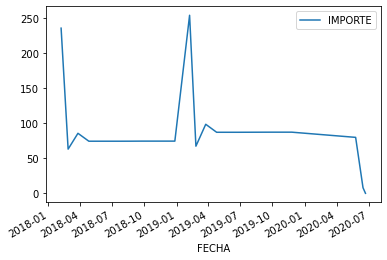

In [26]:
transacciones_219_df.plot()
pyplot.show()

In [27]:
"""
una serie temporal muy establey creo que será facilmente modelizable
"""

'\nuna serie temporal muy establey creo que será facilmente modelizable\n'

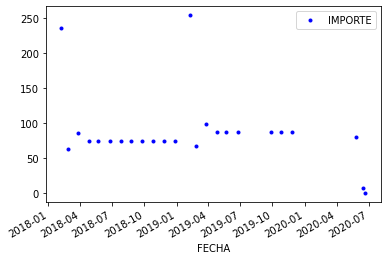

In [29]:
transacciones_219_df.plot(style='b.')
pyplot.show()

In [30]:
# 2. Time Series Histogram and Density Plots

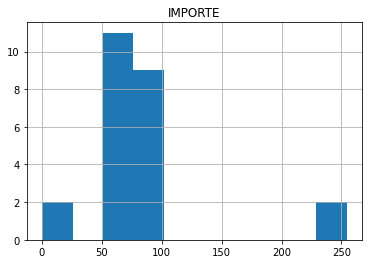

In [31]:
transacciones_219_df.hist()
pyplot.show()

In [35]:
"""
Una serie temporal que practicamente solo toma valores entre 74 y 87 eur salvo 2 valores cercanos a 0 euros y 2 valores cercanos
a 250 eur.

mean = 87.07 eur
std = 53.73 eur

q1 = 74.56 eur
stat_mode = 74.56 eur
q2 = 74.68 eur
q3 = 87.34 eur

min = 0.22 eur
max = 254.82 eur
"""

'\nUna serie temporal que practicamente solo toma valores entre 74 y 87 eur salvo 2 valores cercanos a 0 euros y 2 valores cercanos\na 250 eur.\n\nmean = 87.07 eur\nstd = 53.73 eur\n\nq1 = 74.56 eur\nstat_mode = 74.56 eur\nq2 = 74.68 eur\nq3 = 87.34 eur\n\nmin = 0.22 eur\nmax = 254.82 eur\n'

In [32]:
transacciones_219_df.describe()

IMPORTE
count   24.000000
mean    87.071667
std     53.730459
min      0.220000
25%     74.560000
50%     74.680000
75%     87.345000
max    254.280000

In [34]:
# calculamos la moda
stat_mode = statistics.mode(transacciones_219_df['IMPORTE'])
stat_mode

74.56

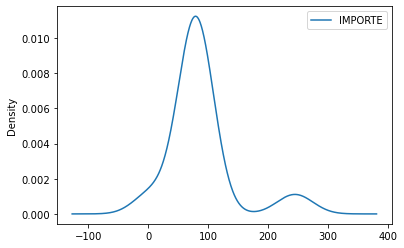

In [38]:
transacciones_219_df.plot(kind='kde')
pyplot.show()

In [39]:
"""
Una vez más. Es diagrama de densidad nos muestra de forma más suavizada las conclusiones del histograma.
"""

'\nUna vez más. Es diagrama de densidad nos muestra de forma más suavizada las conclusiones del histograma.\n'

In [40]:
# 3. Time Series Box and Whisker Plots by Interval

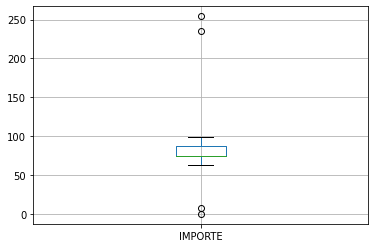

In [41]:
transacciones_219_df.boxplot()
pyplot.show()

In [47]:
"""
El boxplot nos confirma que está distribución es tremendamente poco dispersa con al menos el 50% de sus valores entre 74 y 
87 euros.
Y con 2 outliers en torno a los 250 euros y otros dos outliers cercanos a los 0 eur

A continuación mostramos el intervalo de observaciones dentro del cual éstas no se consideran outliers
q1 - 1.5*iqr = 74.56 - 1.5*(87.34 - 74.56) = 55.39 eur
q3 + 1.5*iqr = 87.34 + 1.5*(87.34 - 74.56) = 106.51 eur
"""

'\nEl boxplot nos confirma que está distribución es tremendamente poco dispersa con al menos el 50% de sus valores entre 74 y \n87 euros.\nY con 2 outliers en torno a los 250 euros y otros dos outliers cercanos a los 0 eur\n\nA continuación mostramos el intervalo de observaciones dentro del cual éstas no se consideran outliers\nq1 - 1.5*iqr = 74.56 - 1.5*(87.34 - 74.56) = 55.39 eur\nq3 + 1.5*iqr = 87.34 + 1.5*(87.34 - 74.56) = 106.51 eur\n'

In [48]:
# 4. Time Series Heat Maps

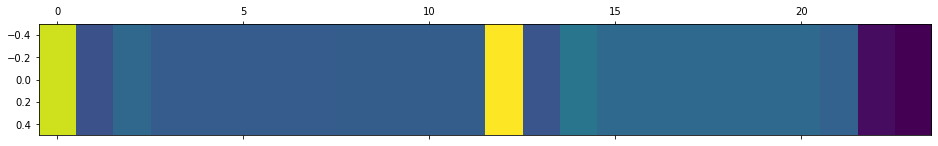

In [49]:
pyplot.matshow(transacciones_219_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [51]:
"""
El mapa de color muestra las mismas conclusiones que la serie temporal. Un valor muy estable con dos valores positivos y uno
negativo.
"""

'\nEl mapa de color muestra las mismas conclusiones que la serie temporal. Un valor muy estable con dos valores positivos y uno\nnegativo.\n'

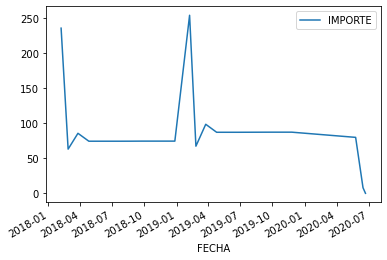

In [52]:
transacciones_219_df.plot()
pyplot.show()

In [53]:
# 5. Time Series Lag Scatter Plots

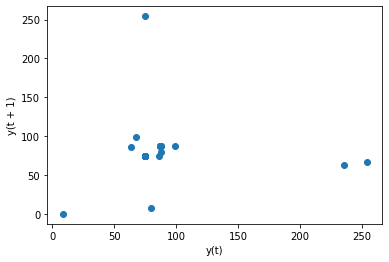

In [55]:
lag_plot(transacciones_219_df)
pyplot.show()

In [57]:
"""
No podemos observar una diagonal clara en la que podamos concluir que observaciones pasadas nos permitan predecir observaciones
futuras, es decir correlacion entre y(t+1) e y(t).
Quiza esto sea debido a la poca cantidad de valores que tiene la serie.
"""

'\nNo podemos observar una diagonal clara en la que podamos concluir que observaciones pasadas nos permitan predecir observaciones\nfuturas, es decir correlacion entre y(t+1) e y(t).\nQuiza esto sea debido a la poca cantidad de valores que tiene la serie.\n'

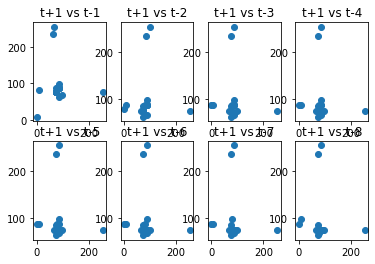

In [58]:
values = DataFrame(transacciones_219_df.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

In [59]:
"""
Tampoco podemos observar una clara correlacion entre y(t+1) y sus 8 lags anteriores.
Sobre todo por la poca cantidad de observaciones que tenemos.
"""

'\nTampoco podemos observar una clara correlacion entre y(t+1) y sus 8 lags anteriores.\nSobre todo por la poca cantidad de observaciones que tenemos.\n'

t+1 vs t-1


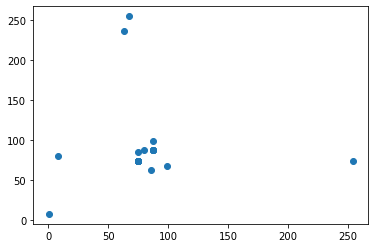

t+1 vs t-2


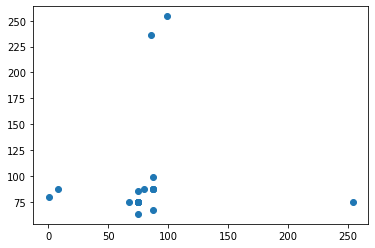

t+1 vs t-3


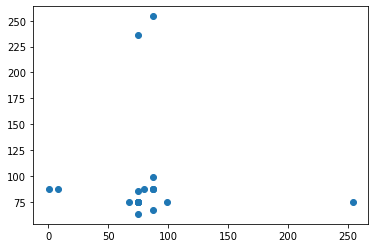

t+1 vs t-4


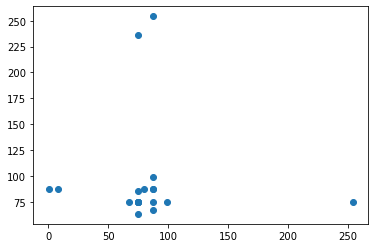

t+1 vs t-5


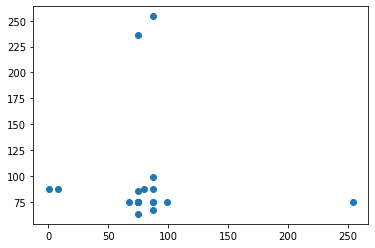

t+1 vs t-6


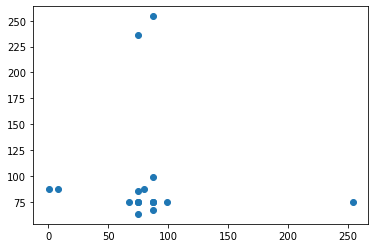

t+1 vs t-7


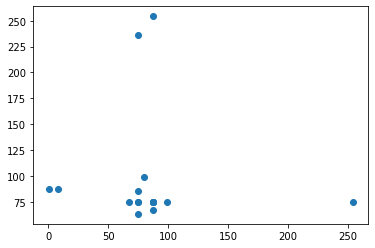

t+1 vs t-8


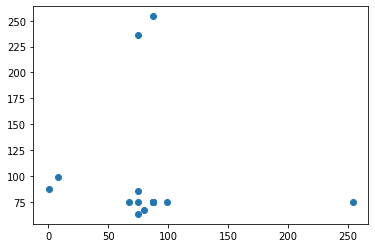

t+1 vs t-9


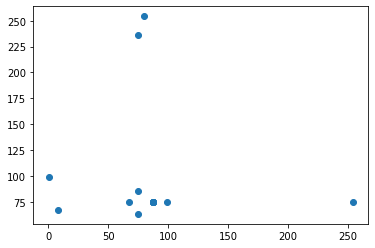

t+1 vs t-10


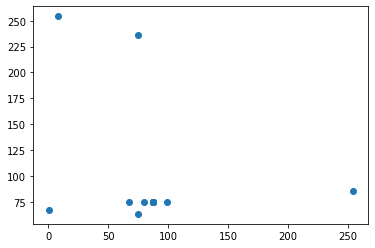

t+1 vs t-11


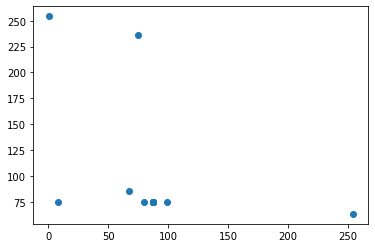

t+1 vs t-12


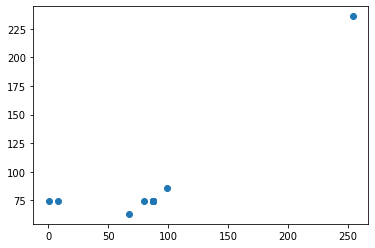

t+1 vs t-13


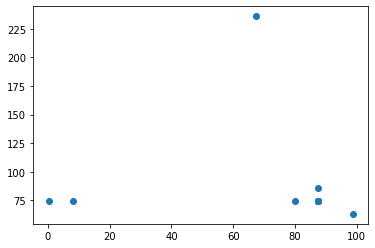

t+1 vs t-14


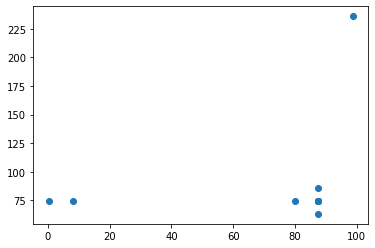

t+1 vs t-15


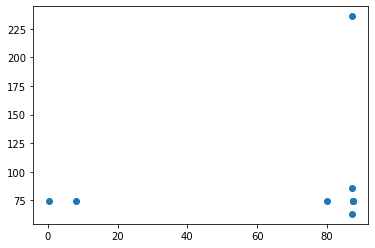

t+1 vs t-16


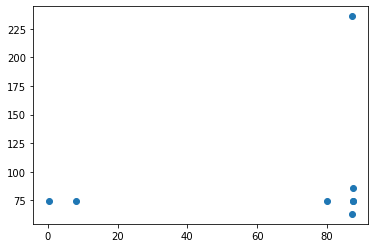

t+1 vs t-17


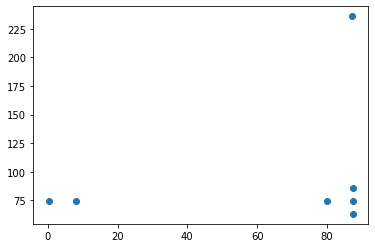

t+1 vs t-18


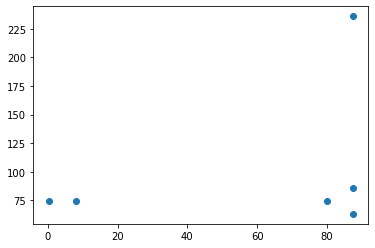

t+1 vs t-19


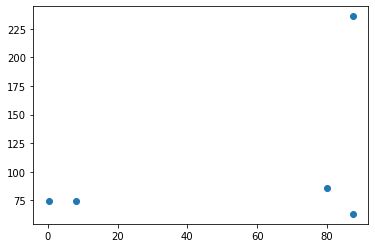

t+1 vs t-20


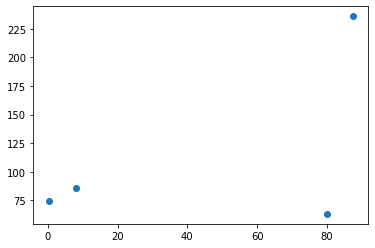

t+1 vs t-21


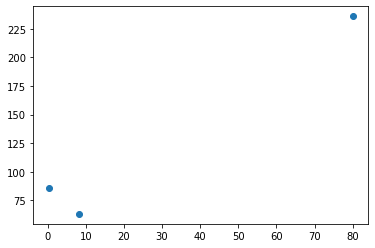

t+1 vs t-22


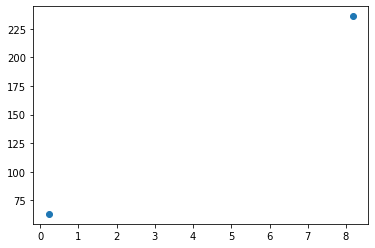

t+1 vs t-23


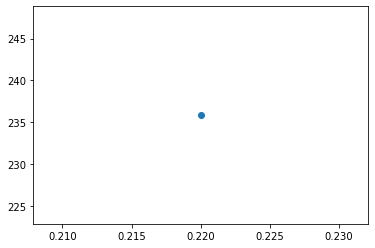

t+1 vs t-24


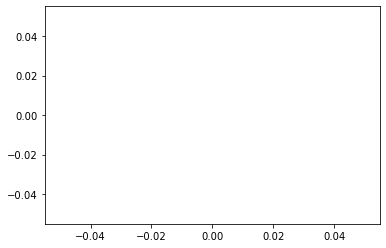

In [60]:
values = DataFrame(transacciones_219_df.values)
lags = transacciones_219_df.size
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [62]:
"""
Obtenemos la misma conclusion entre y(t+1) y sus 24 lags anteriores.
No se puede apreciar correlacion sobre todo por falta de observaciones.
"""

'\nObtenemos la misma conclusion entre y(t+1) y sus 24 lags anteriores.\nNo se puede apreciar correlacion sobre todo por falta de observaciones.\n'

In [63]:
# 6. Time Series Autocorrelation Plots

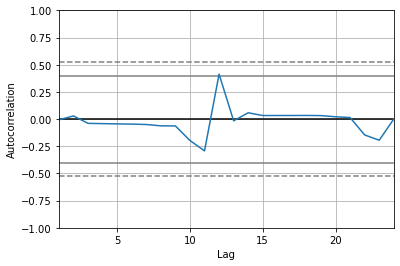

In [64]:
autocorrelation_plot(transacciones_219_df)
pyplot.show()

In [65]:
"""
El grafico de autocorrelacion nos vuelve a mostrar que no hay correlacion significativa entre y(t+1) y ninguno de sus lags
anteriores (Todos ellos estan dentro de las líneas de puntos).
"""

'\nEl grafico de autocorrelacion nos vuelve a mostrar que no hay correlacion significativa entre y(t+1) y ninguno de sus lags\nanteriores (Todos ellos estan dentro de las líneas de puntos).\n'

In [66]:
# Al igual que hicimos en el caso de la serie temporal del seguro medico y de la liquidacion de la tarjeta, 
# vamos a rellenar las missing dates con el ultimo valor válido y comprobar si esa serie temporal es modelable y
# predecible

In [67]:
# Load data using read_excel
transacciones_df = read_excel('20210513 mmelero (249236).xlsx', sheet_name='Hoja1')
transacciones_df

Fecha transacción  Importe  ID Categoría           Nombre categoría  \
0           2020-07-24    -1.20          84.0                 parking_84   
1           2020-07-23    -4.50         117.0  regalos_celebraciones_117   
2           2020-07-23   -13.53          70.0           supermercados_70   
3           2020-07-22   -51.40         222.0                   adsl_222   
4           2020-07-22   -11.00          70.0           supermercados_70   
...                ...      ...           ...                        ...   
1482        2016-09-05  1533.02          18.0     retribucion_liquida_18   
1483        2016-09-05  -617.47         126.0    liquidacion_tarjeta_126   
1484        2016-09-05  -138.08         125.0                 cuotas_125   
1485        2016-09-01   -32.22          90.0            seguro_salud_90   
1486        2016-09-01   -33.00         434.0                 cuotas_434   

      Nivel categoría  iD categoría padre Nombre categoría padre  \
0                 2.0                 5.0            vehiculos_5   
1                 2.0                 8.0    gastos_personales_8   
2                 2.0                 4.0         alimentacion_4   
3                 3.0               521.0    Comunicaciones y TV   
4                 2.0                 4.0         alimentacion_4   
...               ...                 ...                    ...   
1482              3.0               576.0                 Nómina   
1483              3.0               478.0   tarjetas_credito_478   
1484              3.0               127.0      otros_pasivos_127   
1485              2.0                 6.0                salud_6   
1486              3.0               115.0           deportes_115   

                    Proveedor               Marca  \
0                         NaN                 NaN   
1                         NaN                 NaN   
2                        SPAR                SPAR   
3                Jazz Telecom             Jazztel   
4                   Mercadona           Mercadona   
...                       ...                 ...   
1482                      NaN                 NaN   
1483                      NaN                 NaN   
1484                      NaN                 NaN   
1485  Sanitas S.A. de Seguros             Sanitas   
1486       Royal Sport Center  Royal Sport Center   

                            Sector  Financiero  Transferencia  Unnamed: 12  \
0                              NaN       False          False          NaN   
1                              NaN       False          False          NaN   
2                    Supermercados       False          False          NaN   
3     Compañías telecomunicaciones       False          False          NaN   
4                    Supermercados       False          False          NaN   
...                            ...         ...            ...          ...   
1482                           NaN       False          False          NaN   
1483                           NaN        True           True          NaN   
1484                           NaN        True          False          NaN   
1485              Seguros de salud        True          False          NaN   
1486              Clubs deportivos       False          False          NaN   

      Unnamed: 13        ID  BALANCE BALANCE_DATE  
0             NaN  249236.0  1478.98   2020-07-26  
1             NaN       NaN      NaN          NaT  
2             NaN       NaN      NaN          NaT  
3             NaN       NaN      NaN          NaT  
4             NaN       NaN      NaN          NaT  
...           ...       ...      ...          ...  
1482          NaN       NaN      NaN          NaT  
1483          NaN       NaN      NaN          NaT  
1484          NaN       NaN      NaN          NaT  
1485          NaN       NaN      NaN          NaT  
1486          NaN       NaN      NaN          NaT  

[1487 rows x 17 columns]

In [68]:
# nos quedamos con categoria desde 'Fecha transacción' hasta 'Nombre Categoría'
transacciones_df = transacciones_df.iloc[:,0:4]
transacciones_df

Fecha transacción  Importe  ID Categoría           Nombre categoría
0           2020-07-24    -1.20          84.0                 parking_84
1           2020-07-23    -4.50         117.0  regalos_celebraciones_117
2           2020-07-23   -13.53          70.0           supermercados_70
3           2020-07-22   -51.40         222.0                   adsl_222
4           2020-07-22   -11.00          70.0           supermercados_70
...                ...      ...           ...                        ...
1482        2016-09-05  1533.02          18.0     retribucion_liquida_18
1483        2016-09-05  -617.47         126.0    liquidacion_tarjeta_126
1484        2016-09-05  -138.08         125.0                 cuotas_125
1485        2016-09-01   -32.22          90.0            seguro_salud_90
1486        2016-09-01   -33.00         434.0                 cuotas_434

[1487 rows x 4 columns]

In [69]:
# nos quedamos con las transacciones de la categoria 'gas_natural_129'
transacciones_219_df = transacciones_df[transacciones_df['ID Categoría'] == 219.0]
del transacciones_df
transacciones_219_df

Fecha transacción  Importe  ID Categoría Nombre categoría
52         2020-06-22    -0.22         219.0  gas_natural_219
63         2020-06-15    -8.18         219.0  gas_natural_219
100        2020-05-25   -80.04         219.0  gas_natural_219
152        2019-11-25   -87.45         219.0  gas_natural_219
167        2019-10-24   -87.45         219.0  gas_natural_219
..                ...      ...           ...              ...
710        2018-05-23   -74.56         219.0  gas_natural_219
764        2018-04-26   -74.56         219.0  gas_natural_219
811        2018-03-26   -85.84         219.0  gas_natural_219
877        2018-02-26   -63.28         219.0  gas_natural_219
900        2018-02-06  -235.87         219.0  gas_natural_219

[24 rows x 4 columns]

In [70]:
# quitamos las columnas de 'ID Categoría' y 'Nombre Categoría' que ya no nos aportan nada
transacciones_219_df = transacciones_219_df.drop(columns=['ID Categoría', 'Nombre categoría'], inplace=False)
transacciones_219_df

Fecha transacción  Importe
52         2020-06-22    -0.22
63         2020-06-15    -8.18
100        2020-05-25   -80.04
152        2019-11-25   -87.45
167        2019-10-24   -87.45
..                ...      ...
710        2018-05-23   -74.56
764        2018-04-26   -74.56
811        2018-03-26   -85.84
877        2018-02-26   -63.28
900        2018-02-06  -235.87

[24 rows x 2 columns]

In [71]:
# renombramos columnas
transacciones_219_df = transacciones_219_df.rename(columns={'Fecha transacción': 'FECHA', 'Importe': 'IMPORTE'}, inplace=False)
transacciones_219_df

FECHA  IMPORTE
52  2020-06-22    -0.22
63  2020-06-15    -8.18
100 2020-05-25   -80.04
152 2019-11-25   -87.45
167 2019-10-24   -87.45
..         ...      ...
710 2018-05-23   -74.56
764 2018-04-26   -74.56
811 2018-03-26   -85.84
877 2018-02-26   -63.28
900 2018-02-06  -235.87

[24 rows x 2 columns]

In [72]:
# ordenamos las fechas por orden ascendente
transacciones_219_df = transacciones_219_df.sort_values(by=['FECHA'], ascending=True, inplace=False, ignore_index=True)
transacciones_219_df

FECHA  IMPORTE
0  2018-02-06  -235.87
1  2018-02-26   -63.28
2  2018-03-26   -85.84
3  2018-04-26   -74.56
4  2018-05-23   -74.56
..        ...      ...
19 2019-10-24   -87.45
20 2019-11-25   -87.45
21 2020-05-25   -80.04
22 2020-06-15    -8.18
23 2020-06-22    -0.22

[24 rows x 2 columns]

In [73]:
# vamos a agrupar los valores y sumarlos por fecha para agrupar cargos distintos realizados el mismo dia
transacciones_219_df = transacciones_219_df.groupby(['FECHA']).sum()
transacciones_219_df

IMPORTE
FECHA              
2018-02-06  -235.87
2018-02-26   -63.28
2018-03-26   -85.84
2018-04-26   -74.56
2018-05-23   -74.56
...             ...
2019-10-24   -87.45
2019-11-25   -87.45
2020-05-25   -80.04
2020-06-15    -8.18
2020-06-22    -0.22

[24 rows x 1 columns]

In [76]:
transacciones_219_importe_df = transacciones_219_df.copy()
transacciones_219_importe_df

IMPORTE
FECHA              
2018-02-06  -235.87
2018-02-26   -63.28
2018-03-26   -85.84
2018-04-26   -74.56
2018-05-23   -74.56
...             ...
2019-10-24   -87.45
2019-11-25   -87.45
2020-05-25   -80.04
2020-06-15    -8.18
2020-06-22    -0.22

[24 rows x 1 columns]

In [77]:
transacciones_219_importe_df['FECHA'] = transacciones_219_importe_df.index
transacciones_219_importe_df

IMPORTE      FECHA
FECHA                         
2018-02-06  -235.87 2018-02-06
2018-02-26   -63.28 2018-02-26
2018-03-26   -85.84 2018-03-26
2018-04-26   -74.56 2018-04-26
2018-05-23   -74.56 2018-05-23
...             ...        ...
2019-10-24   -87.45 2019-10-24
2019-11-25   -87.45 2019-11-25
2020-05-25   -80.04 2020-05-25
2020-06-15    -8.18 2020-06-15
2020-06-22    -0.22 2020-06-22

[24 rows x 2 columns]

In [78]:
idx = date_range(start=transacciones_219_importe_df.FECHA.min(), end=transacciones_219_importe_df.FECHA.max())
idx

DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15',
               ...
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22'],
              dtype='datetime64[ns]', length=868, freq='D')

In [79]:
transacciones_219_importe_df.index = DatetimeIndex(transacciones_219_importe_df.index)
transacciones_219_importe_df

IMPORTE      FECHA
FECHA                         
2018-02-06  -235.87 2018-02-06
2018-02-26   -63.28 2018-02-26
2018-03-26   -85.84 2018-03-26
2018-04-26   -74.56 2018-04-26
2018-05-23   -74.56 2018-05-23
...             ...        ...
2019-10-24   -87.45 2019-10-24
2019-11-25   -87.45 2019-11-25
2020-05-25   -80.04 2020-05-25
2020-06-15    -8.18 2020-06-15
2020-06-22    -0.22 2020-06-22

[24 rows x 2 columns]

In [80]:
transacciones_219_importe_df = transacciones_219_importe_df.reindex(idx, fill_value='NaN')
transacciones_219_importe_df

IMPORTE      FECHA
2018-02-06 -235.87 2018-02-06
2018-02-07     NaN        NaT
2018-02-08     NaN        NaT
2018-02-09     NaN        NaT
2018-02-10     NaN        NaT
...            ...        ...
2020-06-18     NaN        NaT
2020-06-19     NaN        NaT
2020-06-20     NaN        NaT
2020-06-21     NaN        NaT
2020-06-22   -0.22 2020-06-22

[868 rows x 2 columns]

In [82]:
transacciones_219_importe_df.drop(columns='FECHA', inplace=True)
transacciones_219_importe_df

IMPORTE
2018-02-06 -235.87
2018-02-07     NaN
2018-02-08     NaN
2018-02-09     NaN
2018-02-10     NaN
...            ...
2020-06-18     NaN
2020-06-19     NaN
2020-06-20     NaN
2020-06-21     NaN
2020-06-22   -0.22

[868 rows x 1 columns]

In [84]:
# esta linea no ira en producción
transacciones_219_importe_df.dtypes

IMPORTE    object
dtype: object

In [86]:
transacciones_219_importe_ser = transacciones_219_importe_df.T.squeeze()
transacciones_219_importe_ser

2018-02-06   -235.87
2018-02-07       NaN
2018-02-08       NaN
2018-02-09       NaN
2018-02-10       NaN
               ...  
2020-06-18       NaN
2020-06-19       NaN
2020-06-20       NaN
2020-06-21       NaN
2020-06-22     -0.22
Freq: D, Name: IMPORTE, Length: 868, dtype: object

In [87]:
transacciones_219_importe_ser = to_numeric(transacciones_219_importe_ser, errors='coerce')
transacciones_219_importe_ser

2018-02-06   -235.87
2018-02-07       NaN
2018-02-08       NaN
2018-02-09       NaN
2018-02-10       NaN
               ...  
2020-06-18       NaN
2020-06-19       NaN
2020-06-20       NaN
2020-06-21       NaN
2020-06-22     -0.22
Freq: D, Name: IMPORTE, Length: 868, dtype: float64

In [88]:
transacciones_219_importe_df = DataFrame(transacciones_219_importe_ser)
del transacciones_219_importe_ser
transacciones_219_importe_df

IMPORTE
2018-02-06  -235.87
2018-02-07      NaN
2018-02-08      NaN
2018-02-09      NaN
2018-02-10      NaN
...             ...
2020-06-18      NaN
2020-06-19      NaN
2020-06-20      NaN
2020-06-21      NaN
2020-06-22    -0.22

[868 rows x 1 columns]

In [89]:
# esta linea no ira en producción
transacciones_219_importe_df.dtypes

IMPORTE    float64
dtype: object

In [90]:
# rellenamos los NaN con el ultimo valor numérico anterior
transacciones_219_importe_df['IMPORTE'].fillna(method='ffill', inplace=True)
transacciones_219_importe_df

IMPORTE
2018-02-06  -235.87
2018-02-07  -235.87
2018-02-08  -235.87
2018-02-09  -235.87
2018-02-10  -235.87
...             ...
2020-06-18    -8.18
2020-06-19    -8.18
2020-06-20    -8.18
2020-06-21    -8.18
2020-06-22    -0.22

[868 rows x 1 columns]

In [92]:
# para que los datos sean más fáciles de interpretar vamos a hacerlos todos positivos multiplicandolos por '-1'
transacciones_219_importe_df['IMPORTE'] = -transacciones_219_importe_df['IMPORTE']
transacciones_219_importe_df

IMPORTE
2018-02-06   235.87
2018-02-07   235.87
2018-02-08   235.87
2018-02-09   235.87
2018-02-10   235.87
...             ...
2020-06-18     8.18
2020-06-19     8.18
2020-06-20     8.18
2020-06-21     8.18
2020-06-22     0.22

[868 rows x 1 columns]

In [93]:
# antes de hacer una prediccion con prophet vamos a comprobar si este serie 'transacciones_126_importe_df' es modelizable

In [94]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [95]:
# 1. Time Series Line Plot

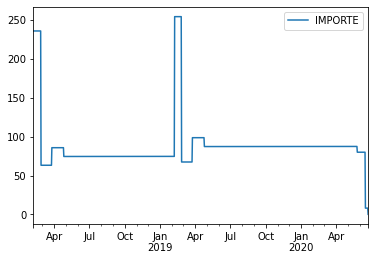

In [96]:
transacciones_219_importe_df.plot()
pyplot.show()

In [97]:
"""
una serie con pocos altibajos repentinos que probablemente sea facil de modelizar
"""

'\nuna serie con pocos altibajos repentinos que probablemente sea facil de modelizar\n'

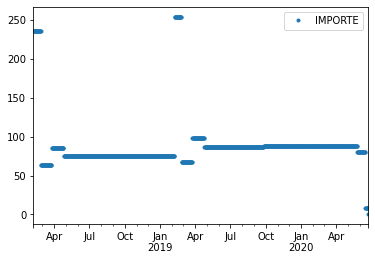

In [98]:
transacciones_219_importe_df.plot(style='.')
pyplot.show()

In [99]:
# 2. Time Series Histogram and Density Plots

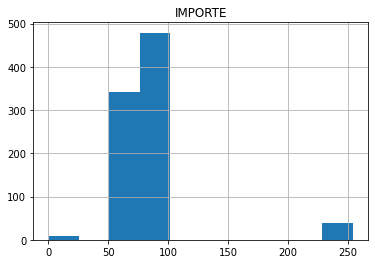

In [100]:
transacciones_219_importe_df.hist()
pyplot.show()

In [105]:
"""
El histograma de datos sale tremendamente agrupado salvo por los pequeños outliers de 250 eur y los de 0 eur.
Nos sale igual que el histograma donde no rellenabamos los huecos.

mean = 88.06 eur
std = 35.17 eur

q1 = 74.68 eur
stat_mode = 87.45 eur
q2 = 87.31 eur
q3 = 87.45 eur

min = 0.22 eur
max = 254.82 eur
"""

'\nEl histograma de datos sale tremendamente agrupado salvo por los pequeños outliers de 250 eur y los de 0 eur.\nNos sale igual que el histograma donde no rellenabamos los huecos.\n\nmean = 88.06 eur\nstd = 35.17 eur\n\nq1 = 74.68 eur\nstat_mode = 87.45 eur\nq2 = 87.31 eur\nq3 = 87.45 eur\n\nmin = 0.22 eur\nmax = 254.82 eur\n'

In [106]:
transacciones_219_importe_df.describe()

IMPORTE
count  868.000000
mean    88.063779
std     35.175697
min      0.220000
25%     74.680000
50%     87.310000
75%     87.450000
max    254.280000

In [107]:
# calculamos la moda
stat_mode = statistics.mode(transacciones_219_importe_df['IMPORTE'])
stat_mode

87.45

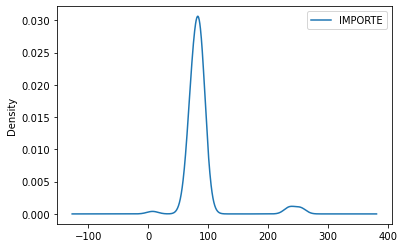

In [108]:
transacciones_219_importe_df.plot(kind='kde')
pyplot.show()

In [109]:
"""
El diagrama de densidad nos confirma las conclusiones del histograma y además la distribución nos sale aún más agrupada que
cuando estudiabamos la serie sin rellenar los huecos entre fechas con el ultimo valor válido.
"""

'\nEl diagrama de densidad nos confirma las conclusiones del histograma y además la distribución nos sale aún más agrupada que\ncuando estudiabamos la serie sin rellenar los huecos entre fechas con el ultimo valor válido.\n'

In [110]:
# 3. Time Series Box and Whisker Plots by Interval

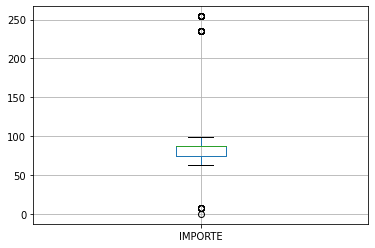

In [111]:
transacciones_219_importe_df.boxplot()
pyplot.show()

In [112]:
"""
Se repiten las mismas conclusiones que cuando 

El boxplot nos confirma que está distribución es tremendamente poco dispersa con al menos el 50% de sus valores entre 74.68 y 
87.45 euros.
Y con outliers en torno a los 250 euros y otros outliers cercanos a los 0 eur

A continuación mostramos el intervalo de observaciones dentro del cual éstas no se consideran outliers
q1 - 1.5*iqr = 74.68 - 1.5*(87.45 - 74.68) = 55.25 eur
q3 + 1.5*iqr = 87.45 + 1.5*(87.45 - 74.68) = 106.60 eur
"""

'\nSe repiten las mismas conclusiones que cuando \n\nEl boxplot nos confirma que está distribución es tremendamente poco dispersa con al menos el 50% de sus valores entre 74.68 y \n87.45 euros.\nY con outliers en torno a los 250 euros y otros outliers cercanos a los 0 eur\n\nA continuación mostramos el intervalo de observaciones dentro del cual éstas no se consideran outliers\nq1 - 1.5*iqr = 74.68 - 1.5*(87.45 - 74.68) = 55.39 eur\nq3 + 1.5*iqr = 87.45 + 1.5*(87.45 - 74.68) = 106.51 eur\n'

In [115]:
# 4. Time Series Heat Maps

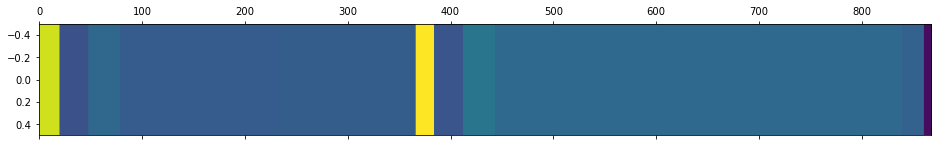

In [116]:
pyplot.matshow(transacciones_219_importe_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [118]:
"""
El mapa de color reproduce fielmente la representacion de las observaciones en funcion del tiempo.
Casi siempre constantes en valor salvo por los picos puntuales de 250 eur y 0 eur.
A priori parece una serie temporal modelizable.
"""

'\nEl mapa de color reproduce fielmente la representacion de las observaciones en funcion del tiempo.\nCasi siempre constantes en valor salvo por los picos puntuales de 250 eur y 0 eur.\nA priori parece una serie temporal modelizable.\n'

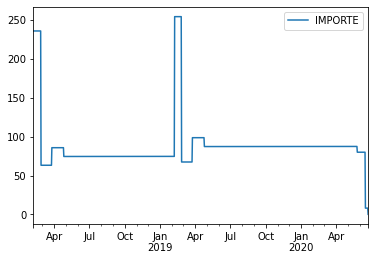

In [119]:
transacciones_219_importe_df.plot()
pyplot.show()

In [120]:
# 5. Time Series Lag Scatter Plots

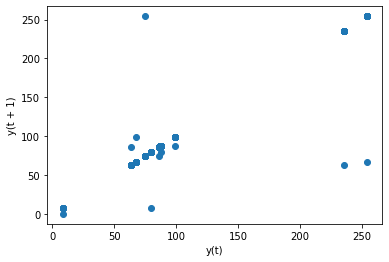

In [121]:
lag_plot(transacciones_219_importe_df)
pyplot.show()

In [124]:
"""
Se ve una cierta diagonal de pequeño tamaño en lo valores debido a que toman un rango de valores muy pequeño.
Por tanto podemos afirmar que hay correlacion entre y(t+1) e y(t)
A priori parece una serie temporal modelizable.
"""

'\nSe ve una cierta diagonal de pequeño tamaño en lo valores debido a que toman un rango de valores muy pequeño.\nPor tanto podemos afirmar que hay correlacion entre y(t+1) e y(t)\nA priori parece una serie temporal modelizable.\n'

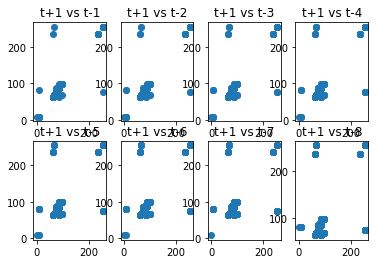

In [125]:
values = DataFrame(transacciones_219_importe_df.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

In [126]:
"""
Como antes, podemos afirmar que hay correlacion (aproximadamente el mismo grado) entre y(t+1) y sus 8 1os lags.
"""

'\nComo antes, podemos afirmar que hay correlacion (aproximadamente el mismo grado) entre y(t+1) y sus 8 1os lags.\n'

t+1 vs t-1


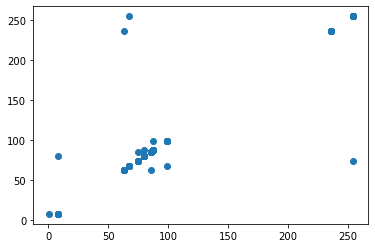

t+1 vs t-2


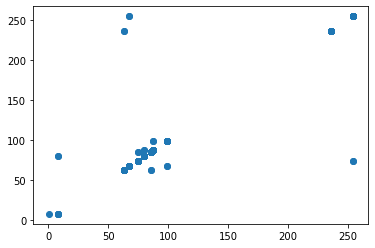

t+1 vs t-3


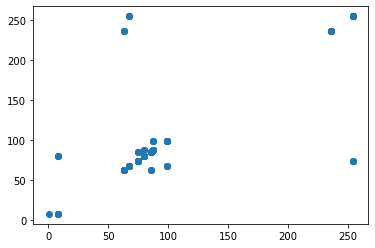

t+1 vs t-4


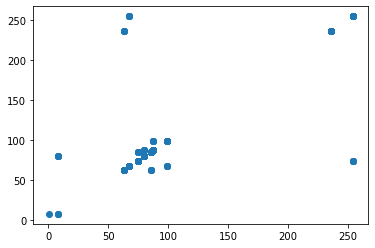

t+1 vs t-5


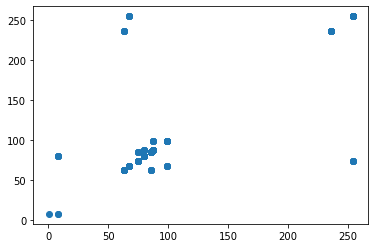

t+1 vs t-6


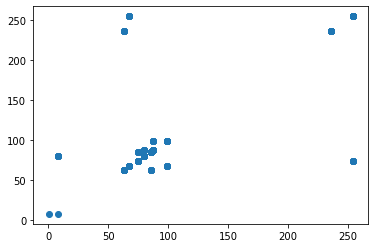

t+1 vs t-7


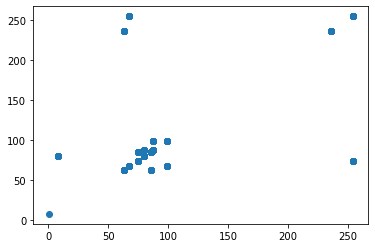

t+1 vs t-8


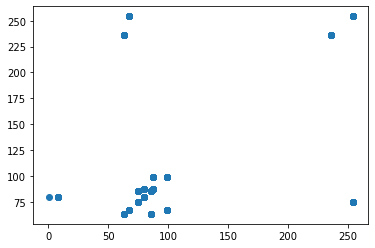

t+1 vs t-9


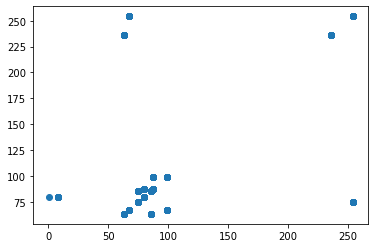

t+1 vs t-10


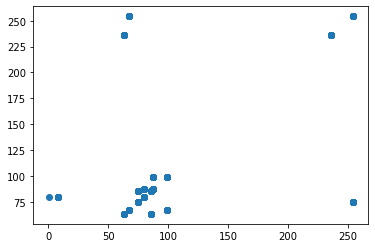

t+1 vs t-11


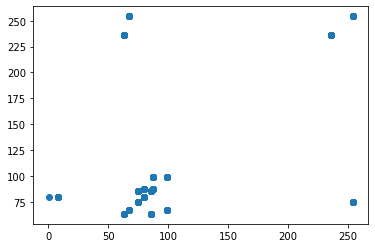

t+1 vs t-12


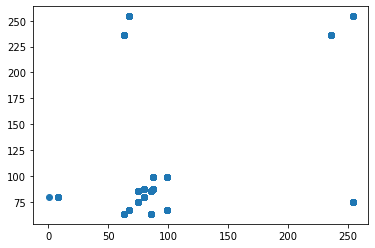

t+1 vs t-13


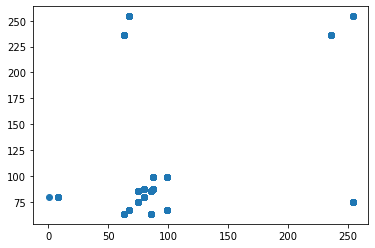

t+1 vs t-14


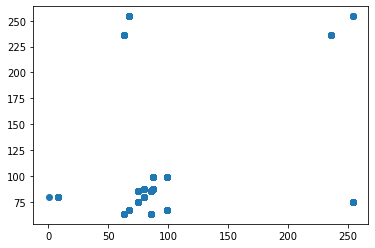

t+1 vs t-15


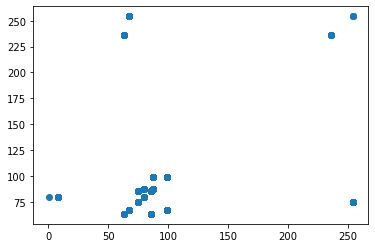

t+1 vs t-16


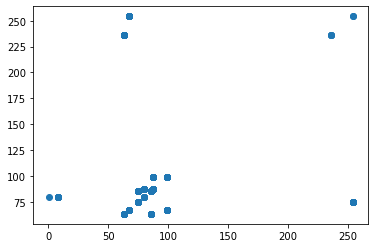

t+1 vs t-17


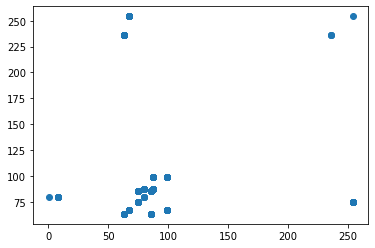

t+1 vs t-18


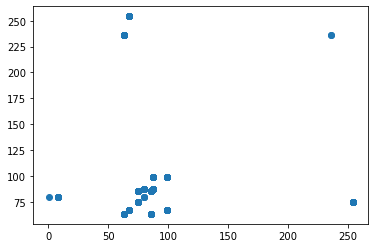

t+1 vs t-19


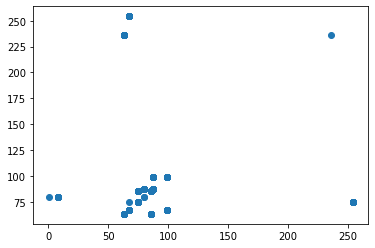

t+1 vs t-20


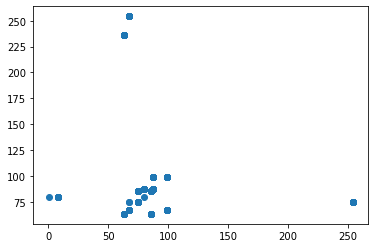

t+1 vs t-21


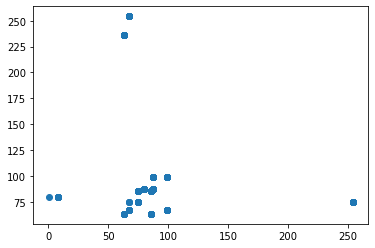

t+1 vs t-22


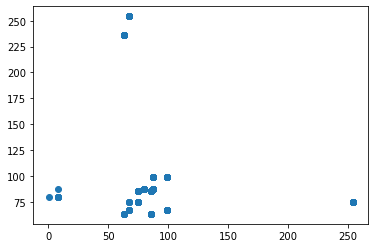

t+1 vs t-23


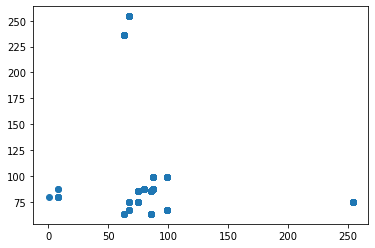

t+1 vs t-24


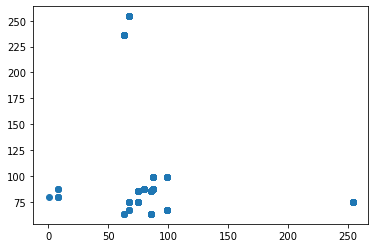

t+1 vs t-25


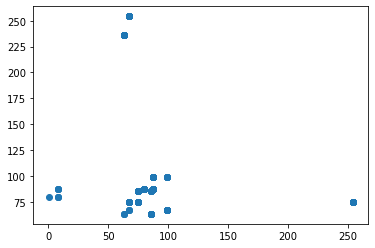

t+1 vs t-26


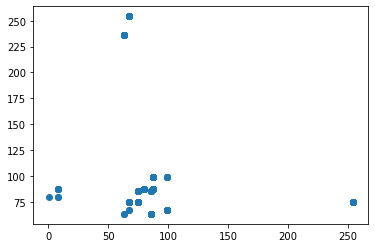

t+1 vs t-27


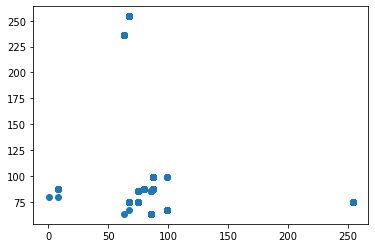

t+1 vs t-28


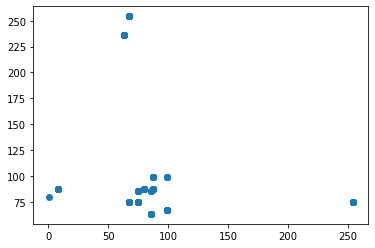

t+1 vs t-29


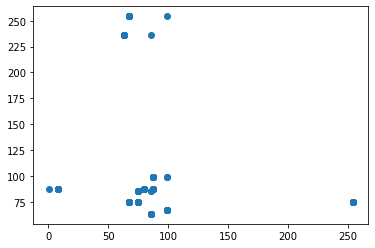

t+1 vs t-30


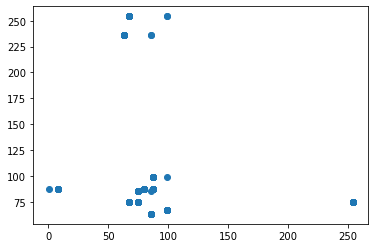

t+1 vs t-31


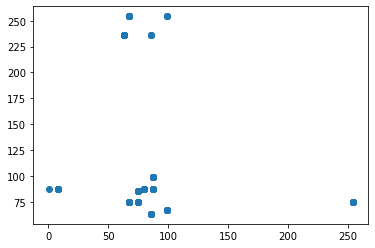

t+1 vs t-32


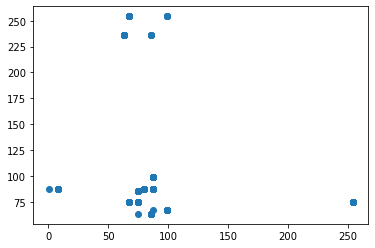

t+1 vs t-33


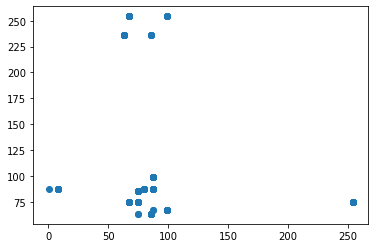

t+1 vs t-34


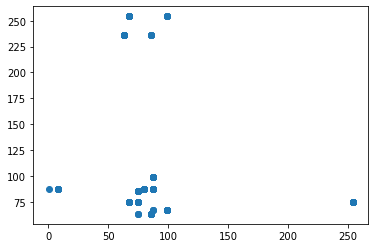

t+1 vs t-35


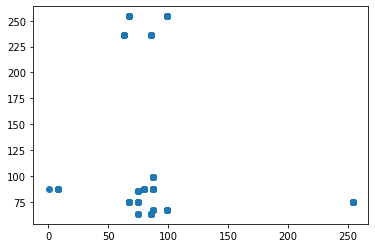

t+1 vs t-36


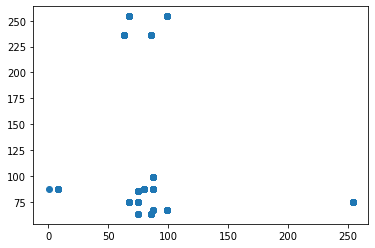

t+1 vs t-37


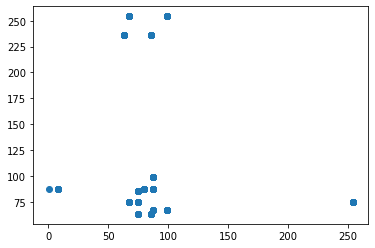

t+1 vs t-38


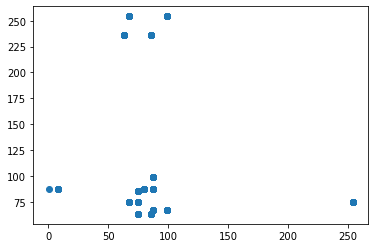

t+1 vs t-39


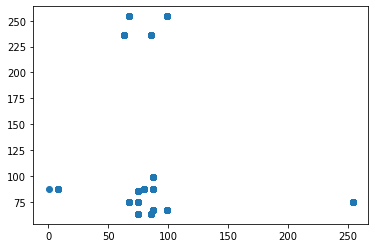

t+1 vs t-40


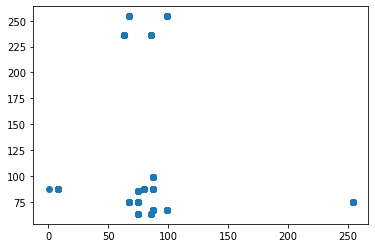

t+1 vs t-41


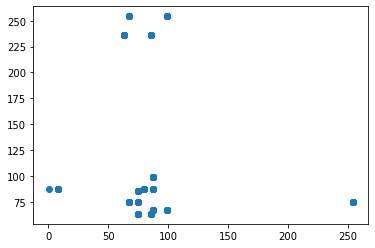

t+1 vs t-42


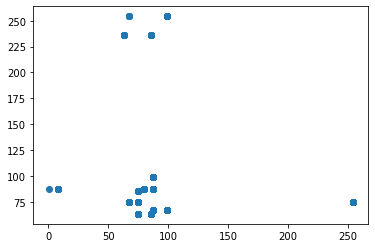

t+1 vs t-43


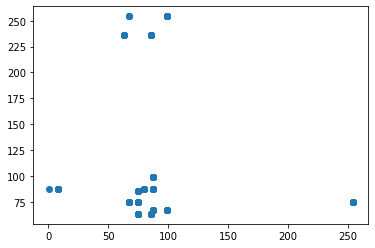

t+1 vs t-44


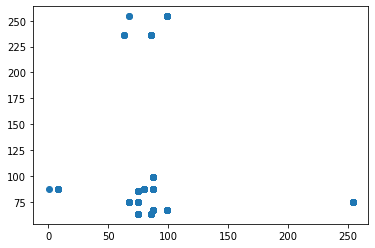

t+1 vs t-45


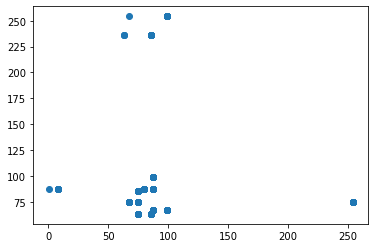

t+1 vs t-46


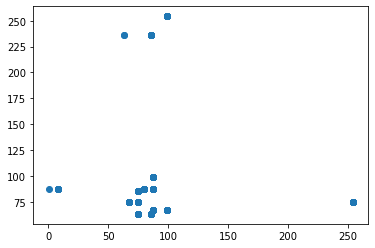

t+1 vs t-47


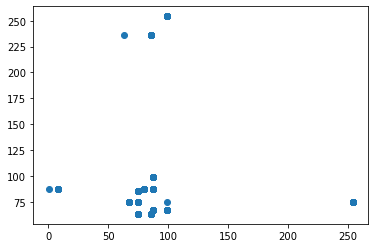

t+1 vs t-48


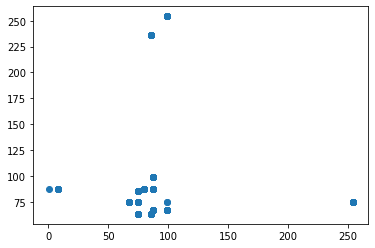

t+1 vs t-49


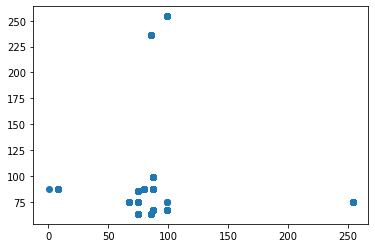

t+1 vs t-50


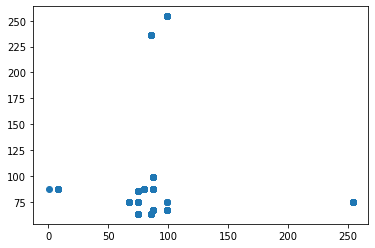

t+1 vs t-51


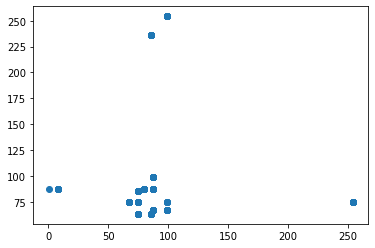

t+1 vs t-52


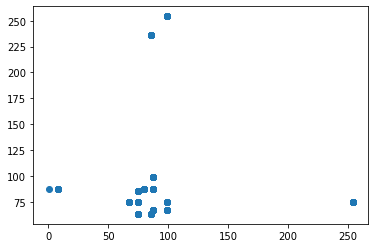

t+1 vs t-53


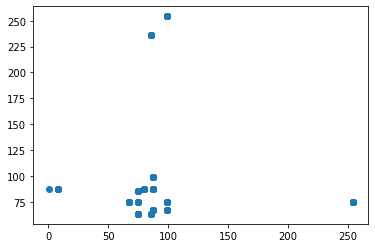

t+1 vs t-54


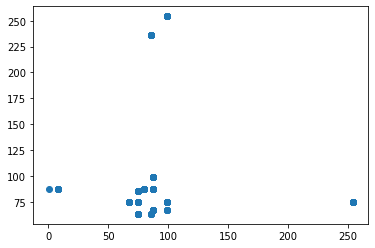

t+1 vs t-55


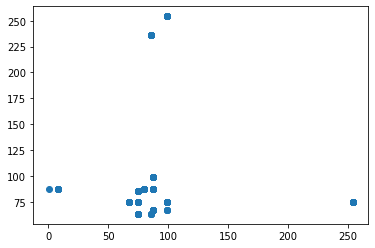

t+1 vs t-56


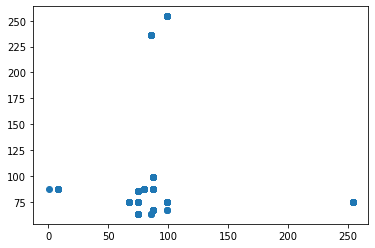

t+1 vs t-57


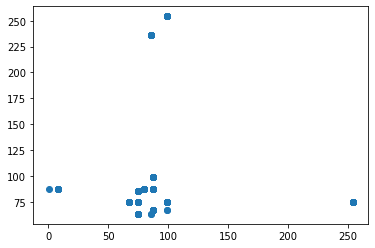

t+1 vs t-58


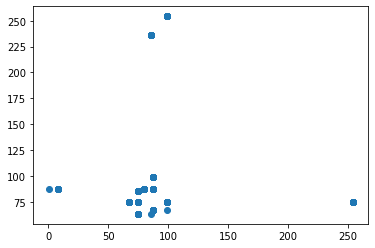

t+1 vs t-59


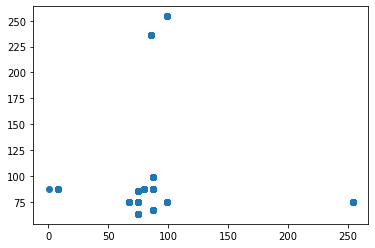

t+1 vs t-60


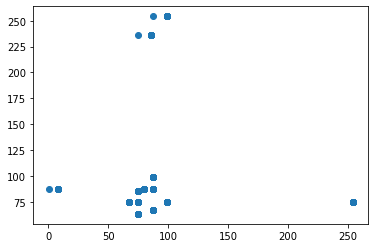

t+1 vs t-61


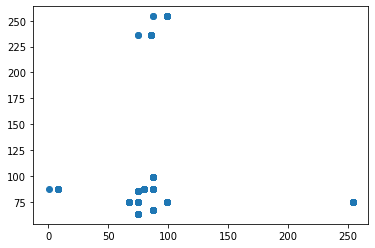

t+1 vs t-62


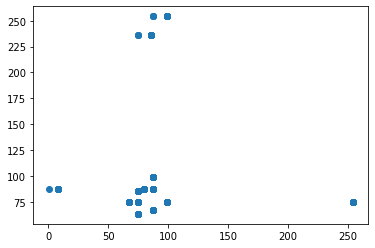

t+1 vs t-63


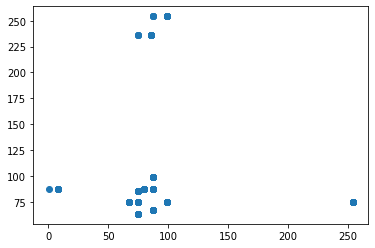

t+1 vs t-64


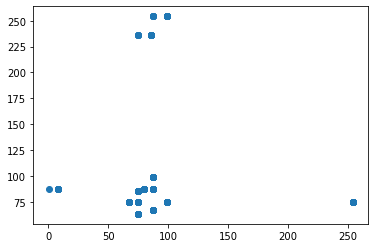

t+1 vs t-65


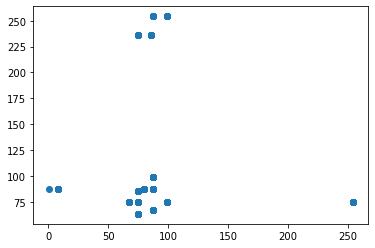

t+1 vs t-66


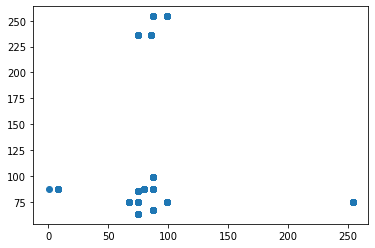

t+1 vs t-67


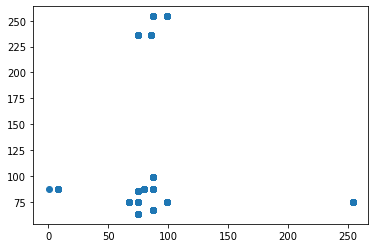

t+1 vs t-68


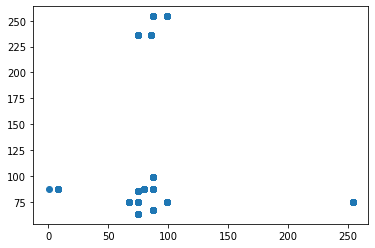

t+1 vs t-69


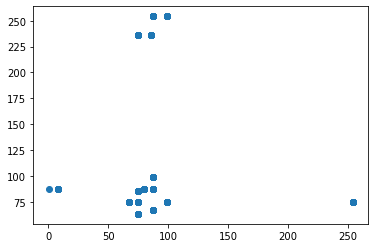

t+1 vs t-70


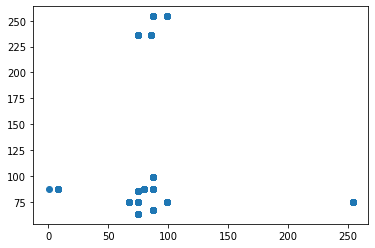

t+1 vs t-71


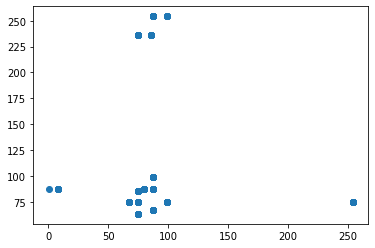

t+1 vs t-72


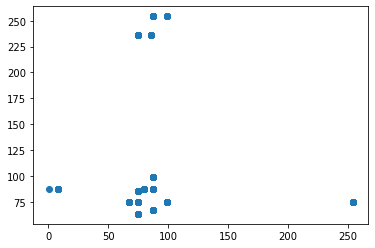

t+1 vs t-73


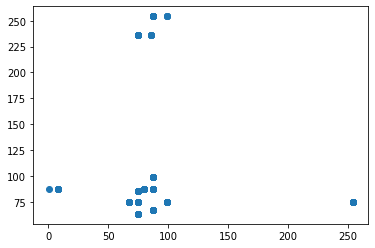

t+1 vs t-74


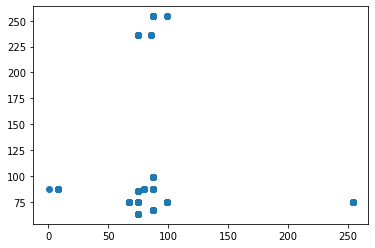

t+1 vs t-75


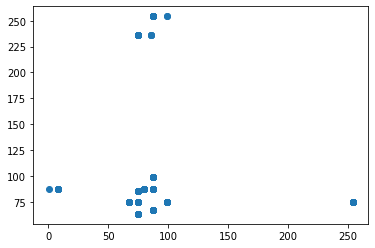

t+1 vs t-76


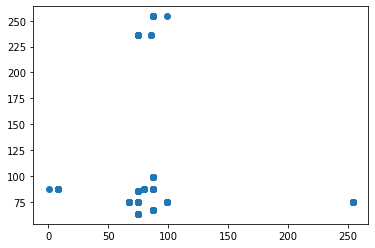

t+1 vs t-77


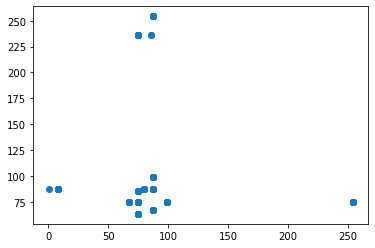

t+1 vs t-78


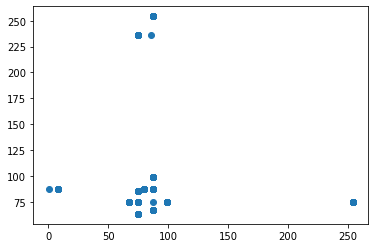

t+1 vs t-79


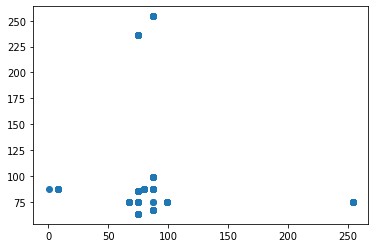

t+1 vs t-80


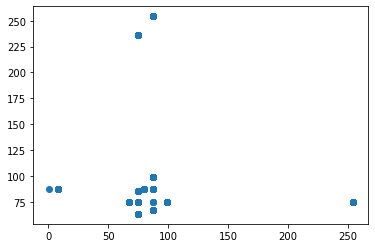

t+1 vs t-81


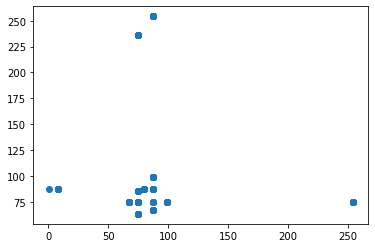

t+1 vs t-82


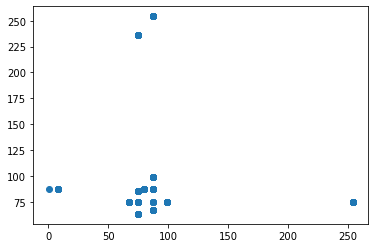

t+1 vs t-83


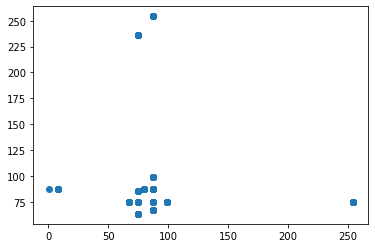

t+1 vs t-84


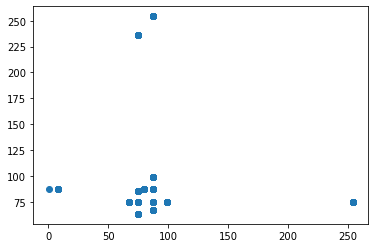

t+1 vs t-85


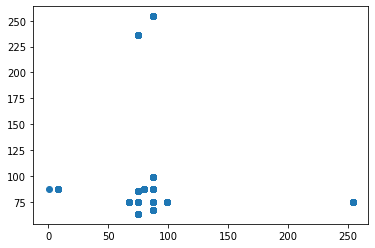

t+1 vs t-86


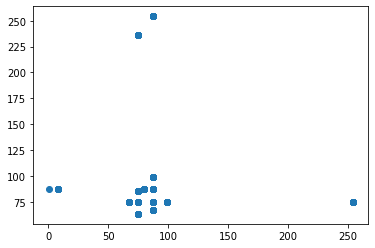

t+1 vs t-87


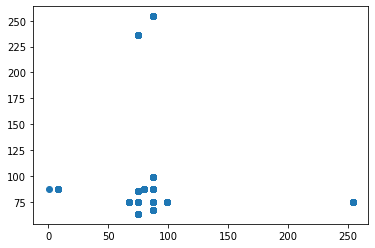

t+1 vs t-88


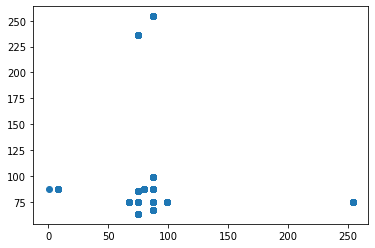

t+1 vs t-89


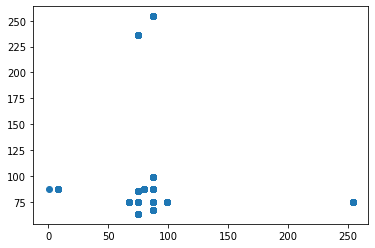

t+1 vs t-90


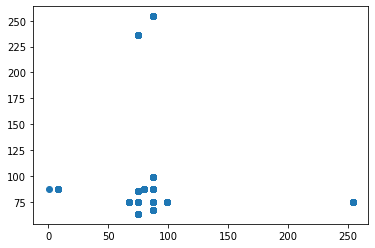

t+1 vs t-91


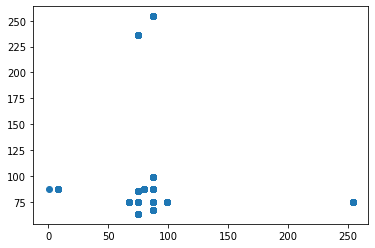

t+1 vs t-92


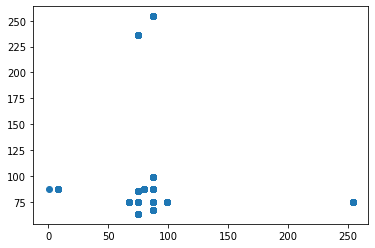

t+1 vs t-93


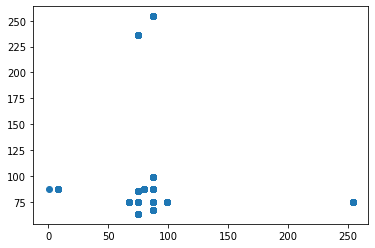

t+1 vs t-94


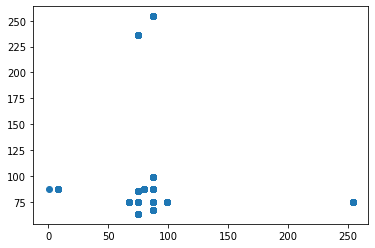

t+1 vs t-95


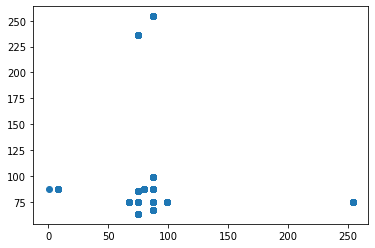

t+1 vs t-96


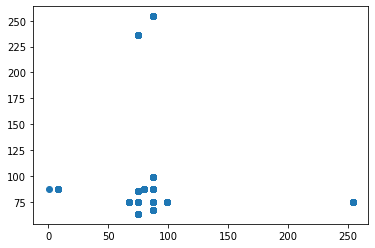

t+1 vs t-97


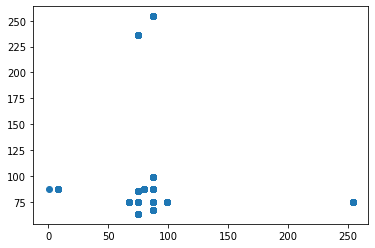

t+1 vs t-98


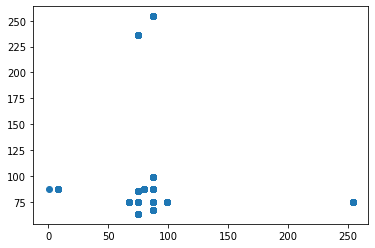

t+1 vs t-99


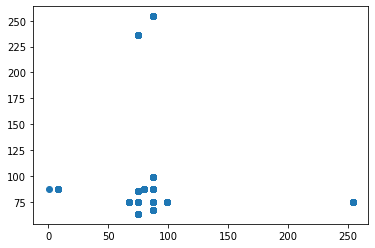

t+1 vs t-100


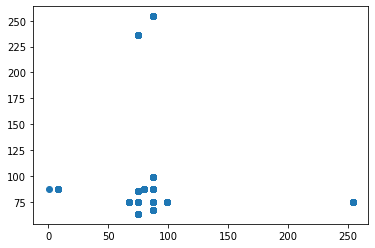

t+1 vs t-101


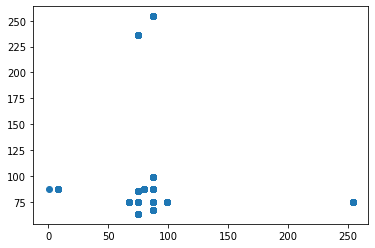

t+1 vs t-102


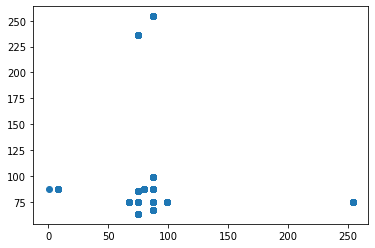

t+1 vs t-103


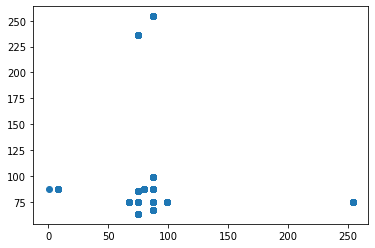

t+1 vs t-104


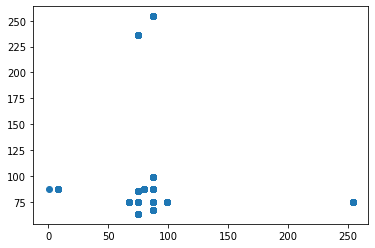

t+1 vs t-105


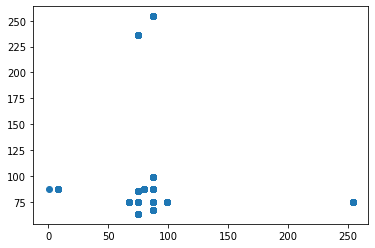

t+1 vs t-106


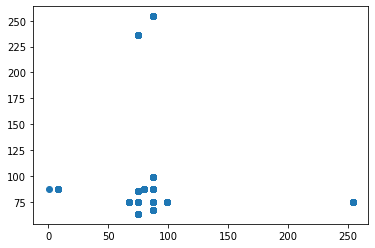

t+1 vs t-107


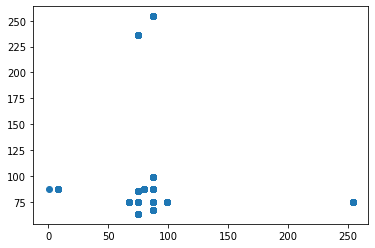

t+1 vs t-108


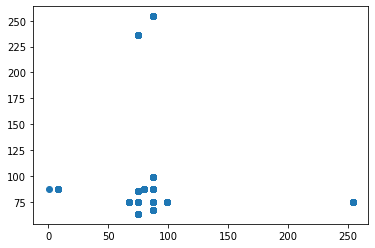

t+1 vs t-109


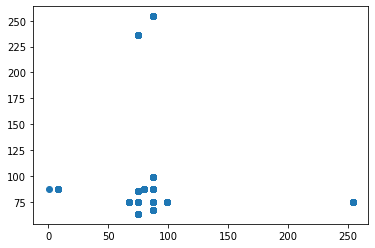

t+1 vs t-110


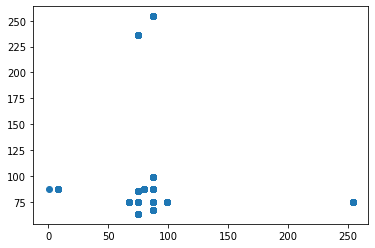

t+1 vs t-111


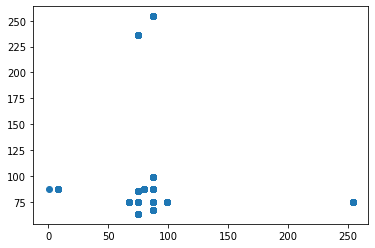

t+1 vs t-112


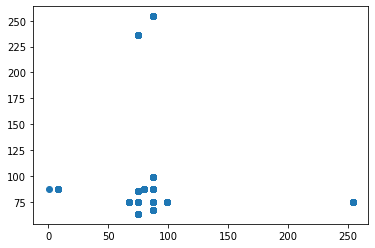

t+1 vs t-113


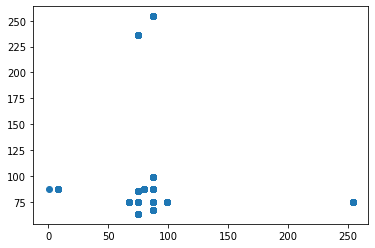

t+1 vs t-114


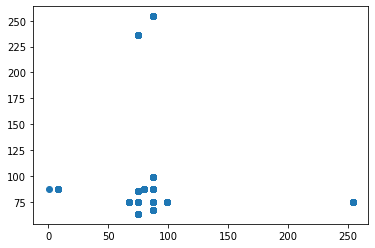

t+1 vs t-115


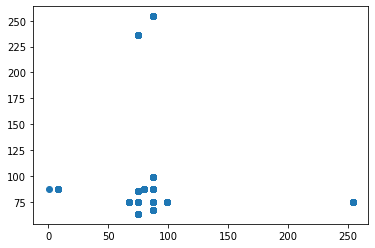

t+1 vs t-116


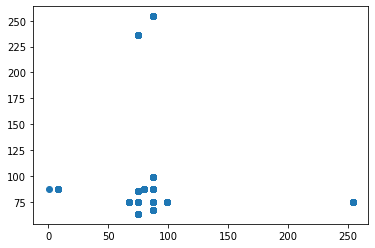

t+1 vs t-117


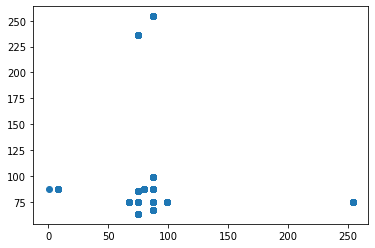

t+1 vs t-118


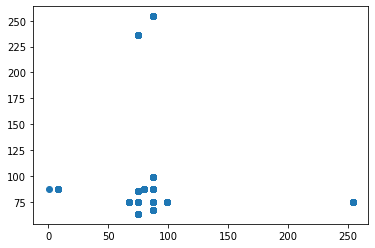

t+1 vs t-119


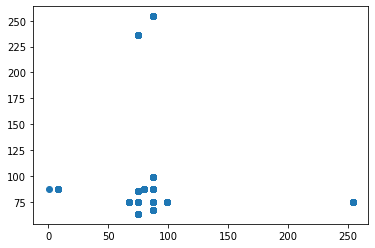

t+1 vs t-120


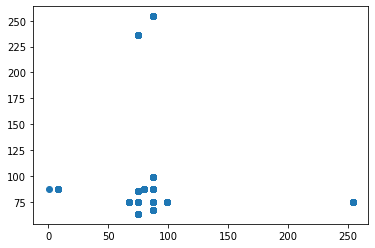

t+1 vs t-121


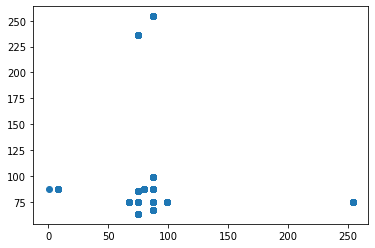

t+1 vs t-122


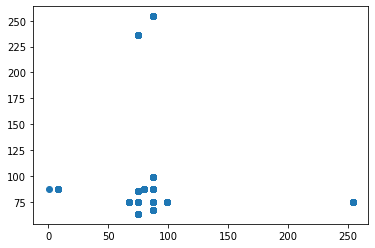

t+1 vs t-123


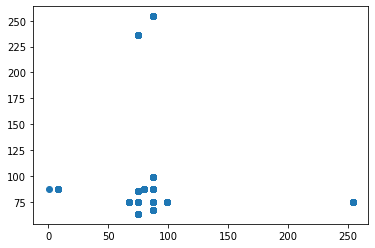

t+1 vs t-124


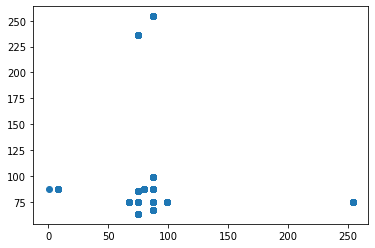

t+1 vs t-125


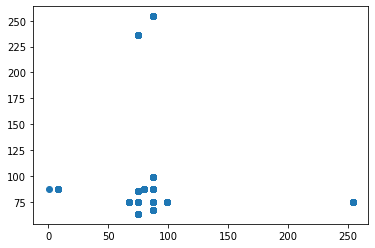

t+1 vs t-126


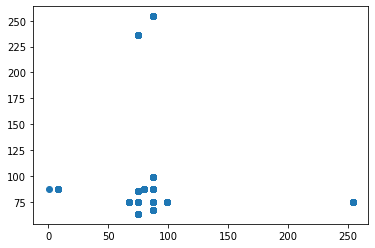

t+1 vs t-127


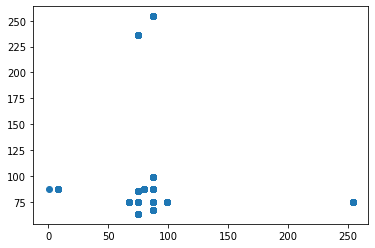

t+1 vs t-128


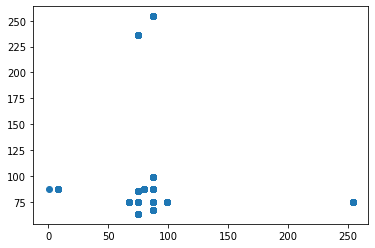

t+1 vs t-129


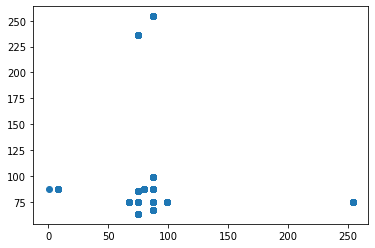

t+1 vs t-130


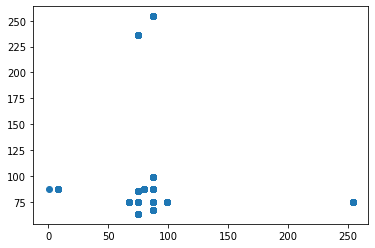

t+1 vs t-131


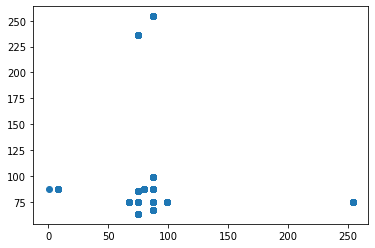

t+1 vs t-132


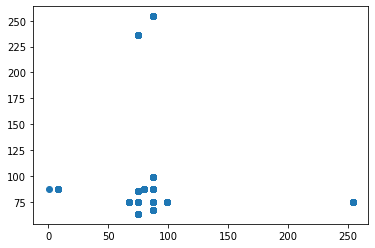

t+1 vs t-133


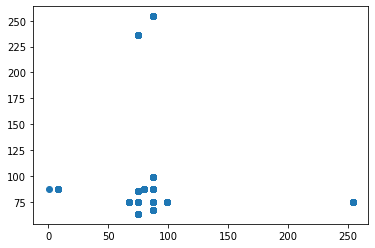

t+1 vs t-134


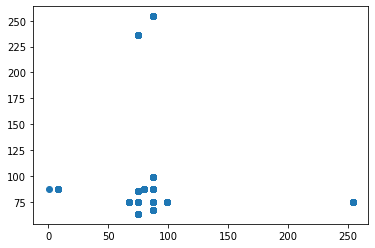

t+1 vs t-135


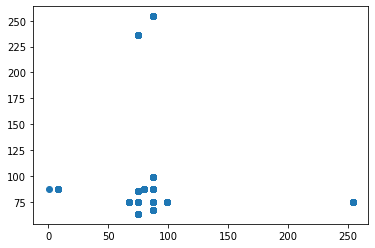

t+1 vs t-136


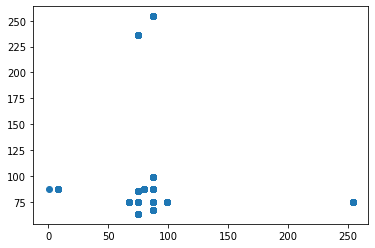

t+1 vs t-137


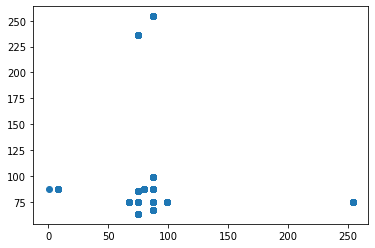

t+1 vs t-138


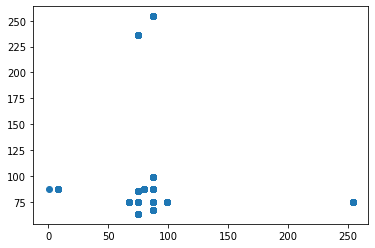

t+1 vs t-139


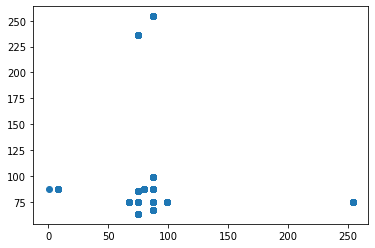

t+1 vs t-140


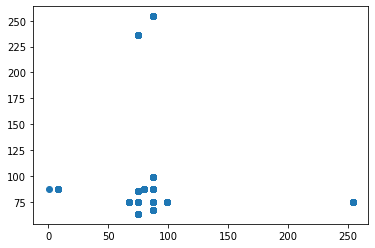

t+1 vs t-141


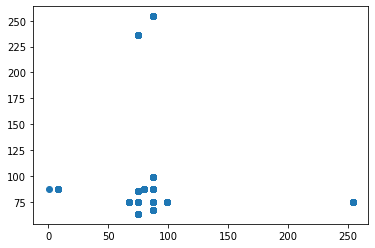

t+1 vs t-142


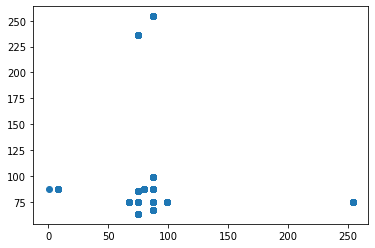

t+1 vs t-143


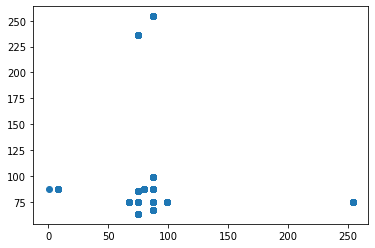

t+1 vs t-144


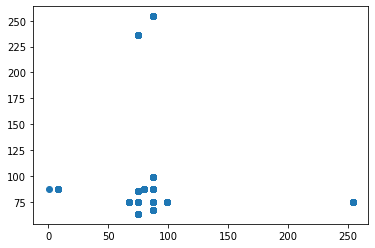

t+1 vs t-145


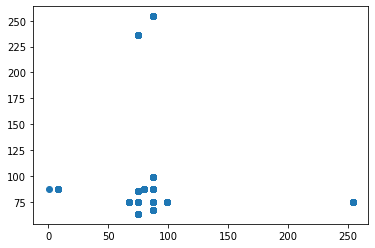

t+1 vs t-146


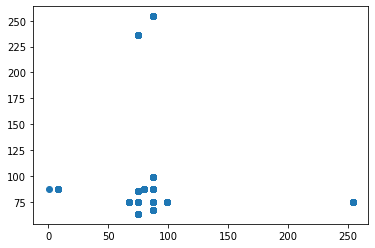

t+1 vs t-147


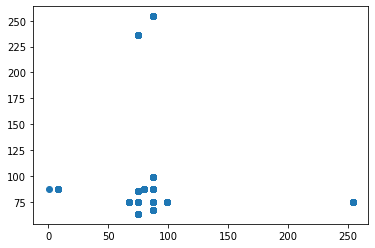

t+1 vs t-148


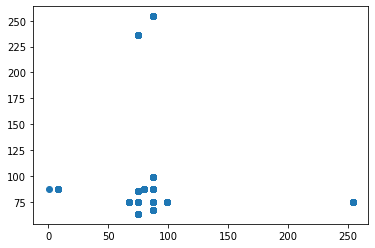

t+1 vs t-149


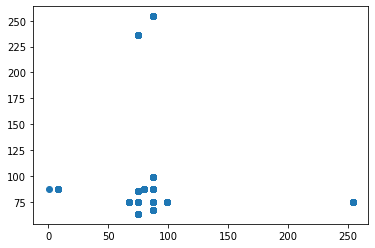

t+1 vs t-150


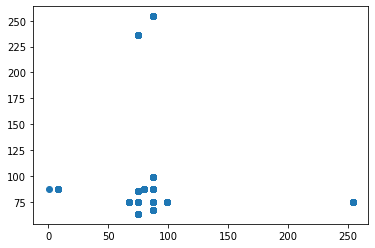

t+1 vs t-151


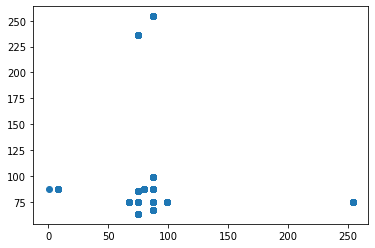

t+1 vs t-152


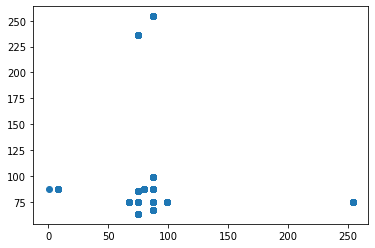

t+1 vs t-153


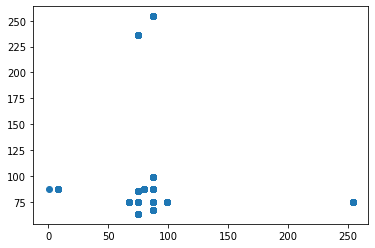

t+1 vs t-154


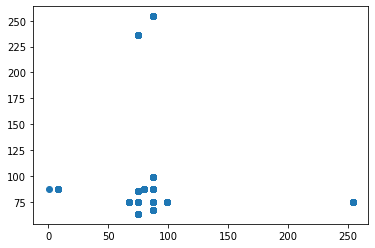

t+1 vs t-155


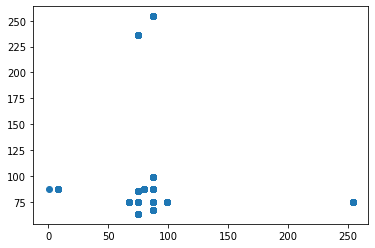

t+1 vs t-156


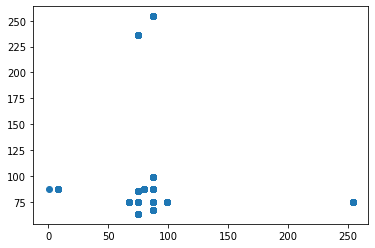

t+1 vs t-157


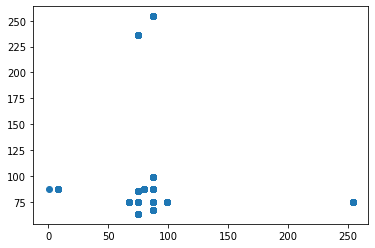

t+1 vs t-158


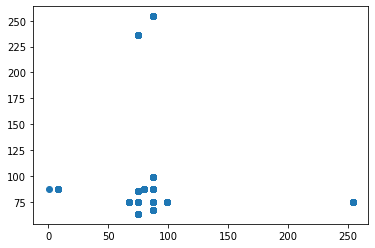

t+1 vs t-159


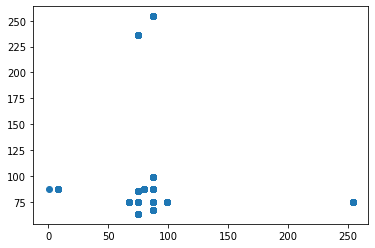

t+1 vs t-160


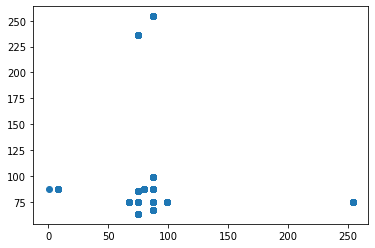

t+1 vs t-161


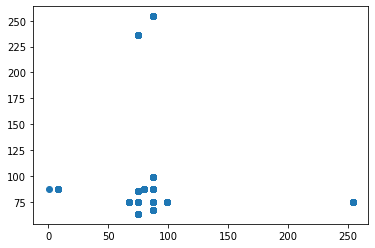

t+1 vs t-162


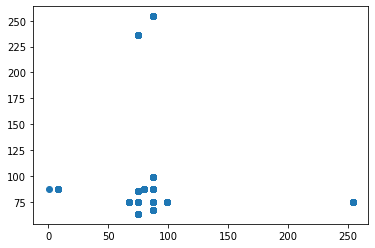

t+1 vs t-163


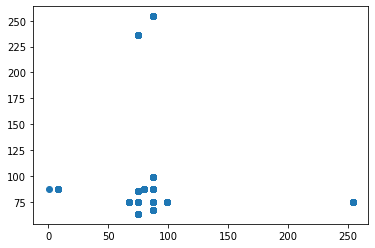

t+1 vs t-164


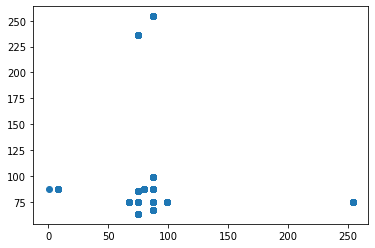

t+1 vs t-165


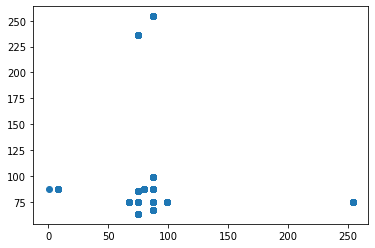

t+1 vs t-166


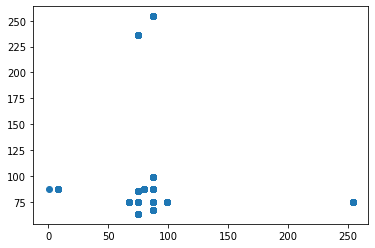

t+1 vs t-167


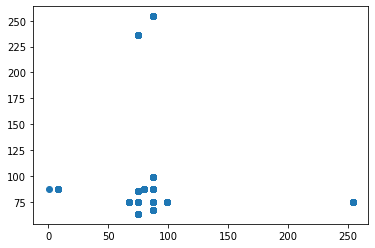

t+1 vs t-168


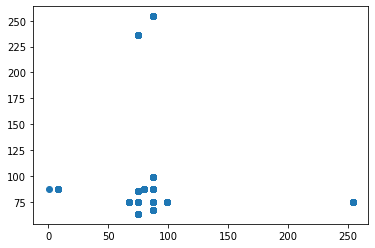

t+1 vs t-169


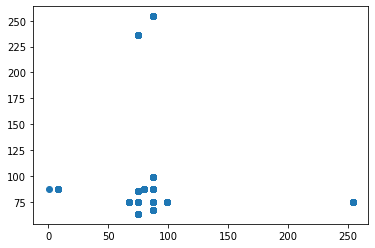

t+1 vs t-170


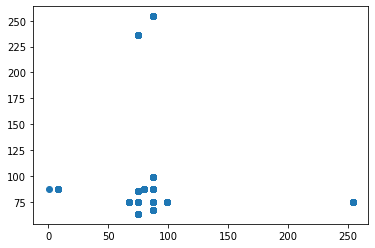

t+1 vs t-171


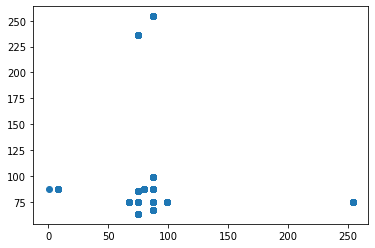

t+1 vs t-172


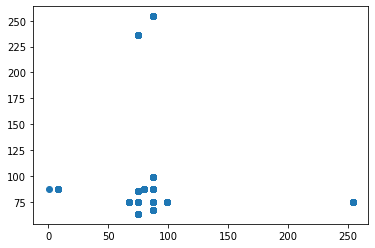

t+1 vs t-173


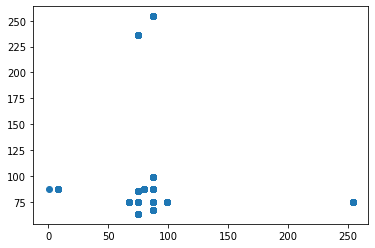

t+1 vs t-174


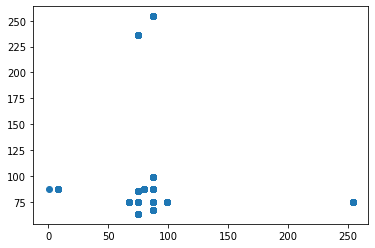

t+1 vs t-175


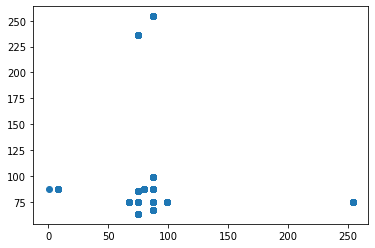

t+1 vs t-176


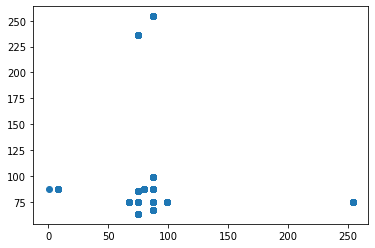

t+1 vs t-177


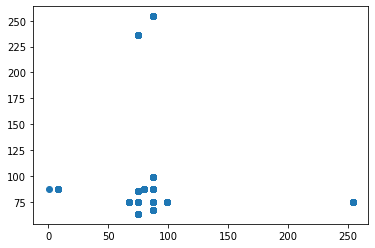

t+1 vs t-178


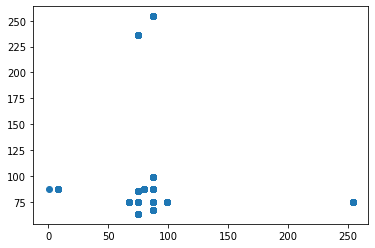

t+1 vs t-179


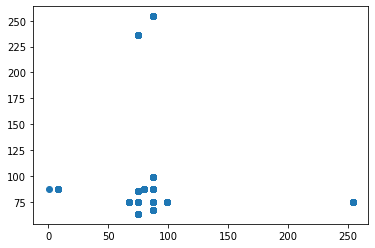

t+1 vs t-180


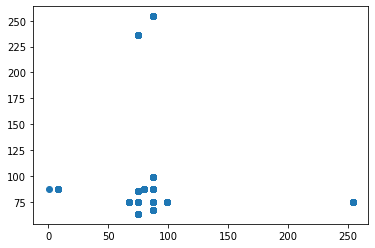

t+1 vs t-181


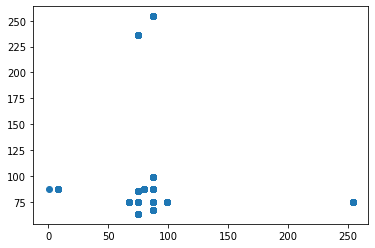

t+1 vs t-182


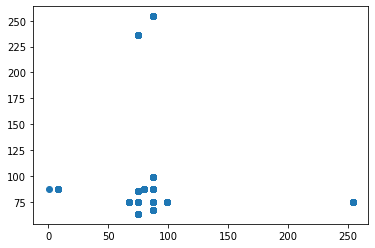

t+1 vs t-183


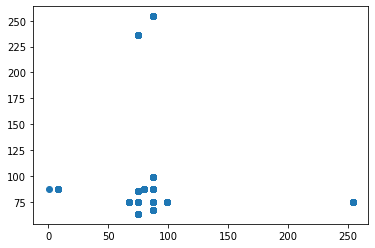

t+1 vs t-184


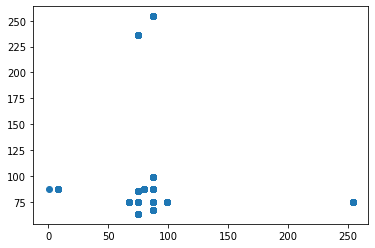

t+1 vs t-185


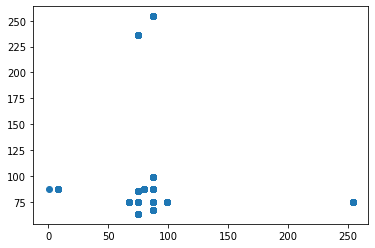

t+1 vs t-186


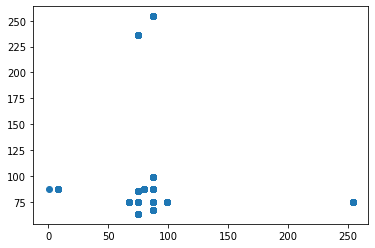

t+1 vs t-187


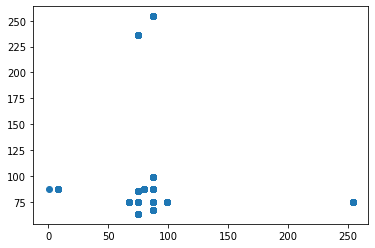

t+1 vs t-188


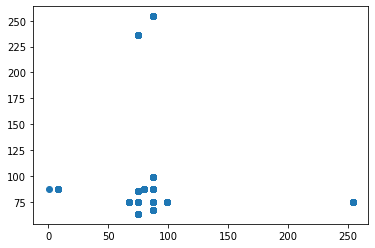

t+1 vs t-189


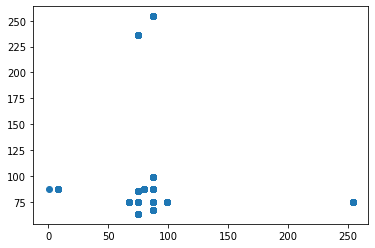

t+1 vs t-190


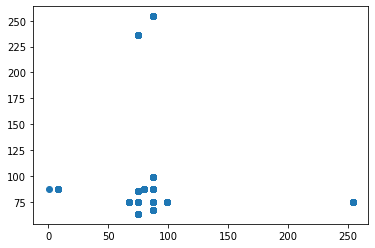

t+1 vs t-191


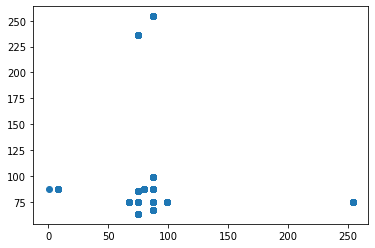

t+1 vs t-192


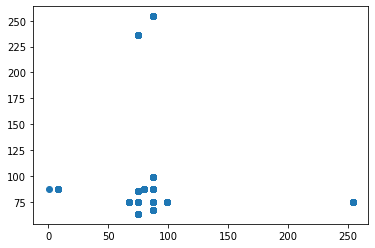

t+1 vs t-193


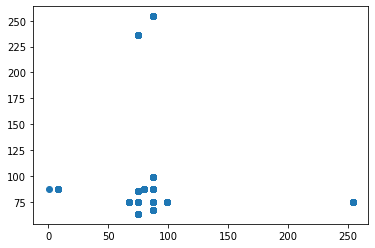

t+1 vs t-194


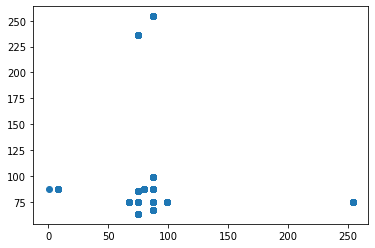

t+1 vs t-195


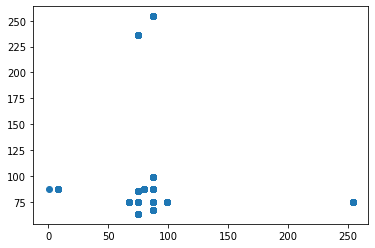

t+1 vs t-196


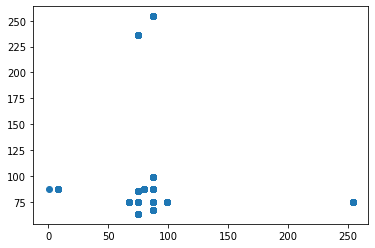

t+1 vs t-197


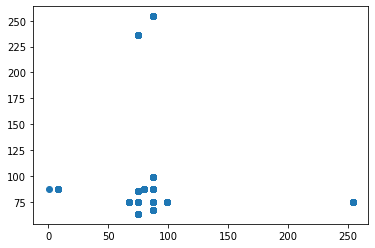

t+1 vs t-198


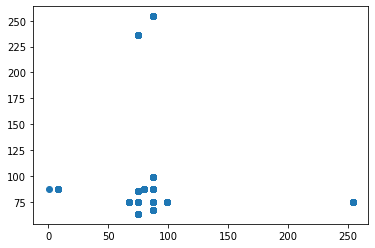

t+1 vs t-199


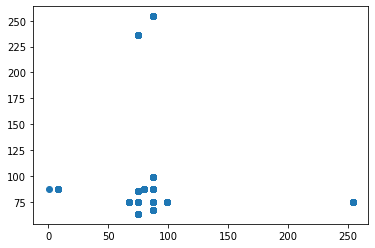

t+1 vs t-200


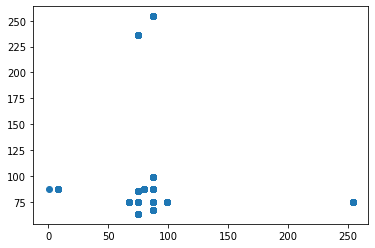

t+1 vs t-201


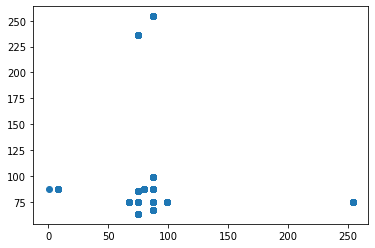

t+1 vs t-202


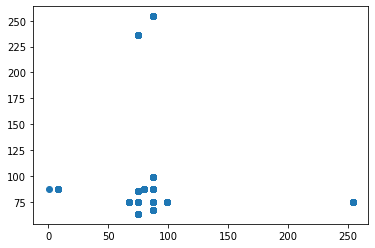

t+1 vs t-203


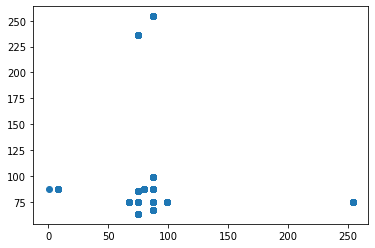

t+1 vs t-204


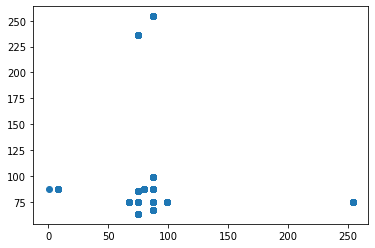

t+1 vs t-205


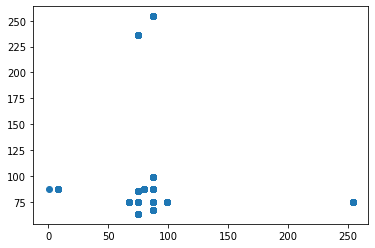

t+1 vs t-206


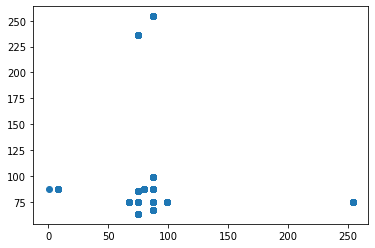

t+1 vs t-207


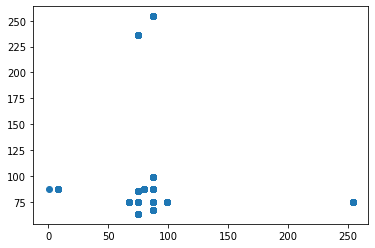

t+1 vs t-208


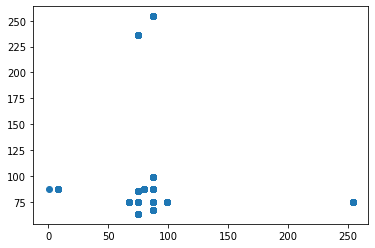

t+1 vs t-209


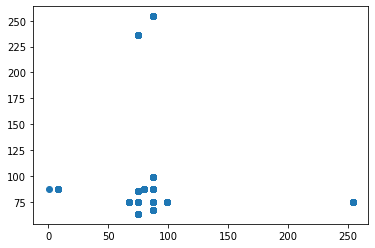

t+1 vs t-210


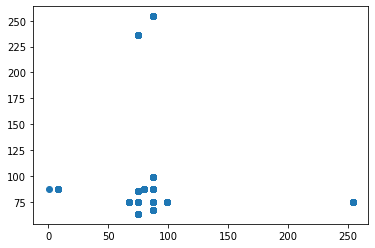

t+1 vs t-211


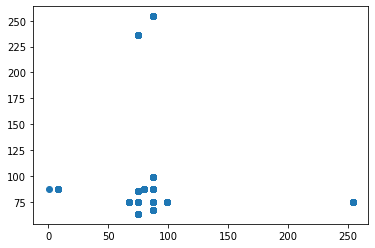

t+1 vs t-212


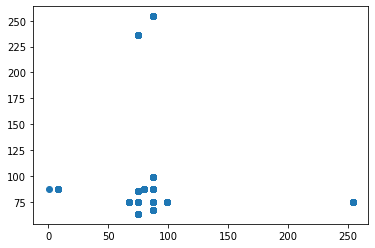

t+1 vs t-213


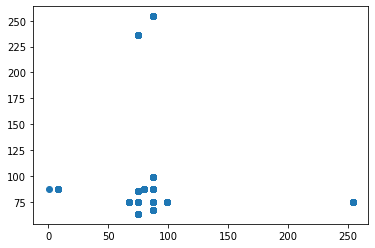

t+1 vs t-214


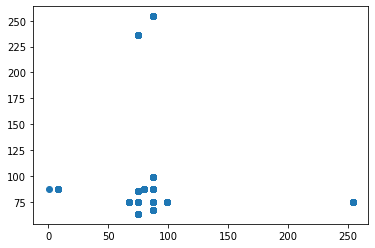

t+1 vs t-215


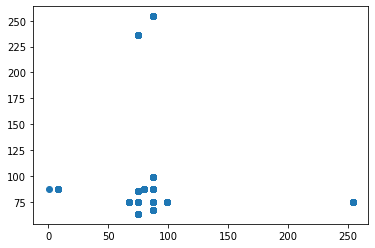

t+1 vs t-216


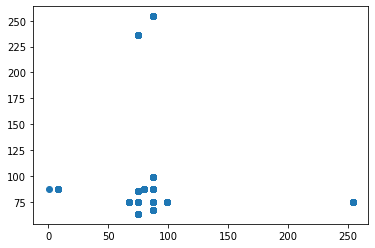

t+1 vs t-217


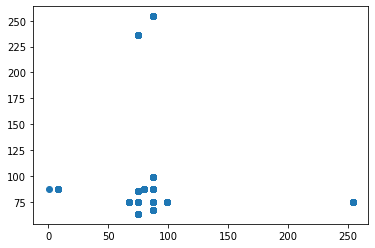

t+1 vs t-218


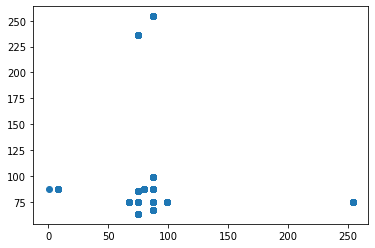

t+1 vs t-219


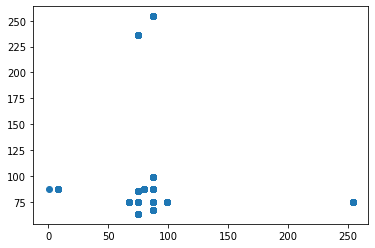

t+1 vs t-220


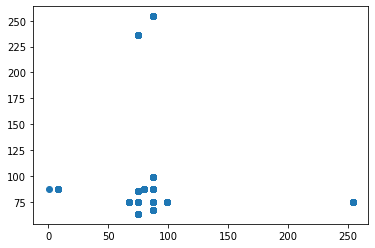

t+1 vs t-221


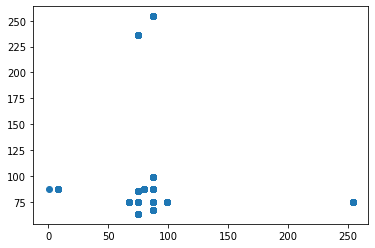

t+1 vs t-222


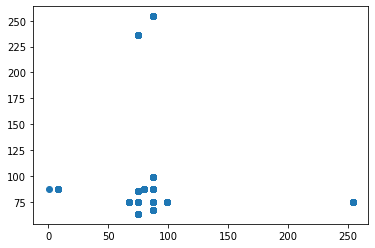

t+1 vs t-223


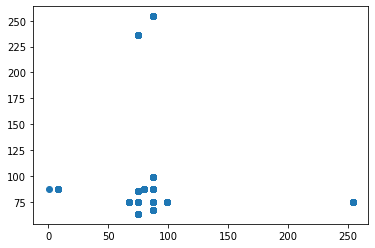

t+1 vs t-224


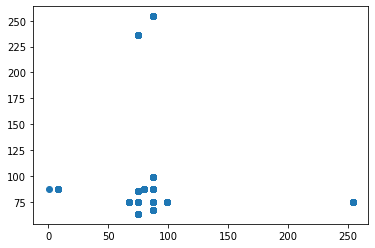

t+1 vs t-225


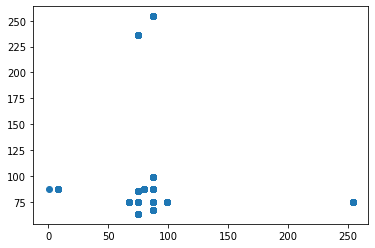

t+1 vs t-226


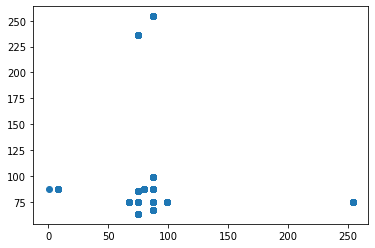

t+1 vs t-227


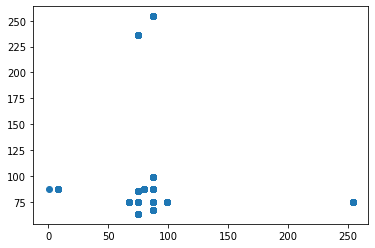

t+1 vs t-228


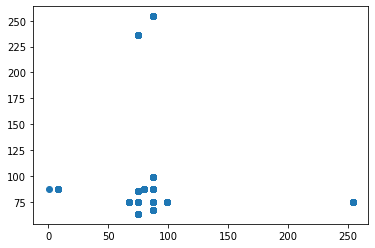

t+1 vs t-229


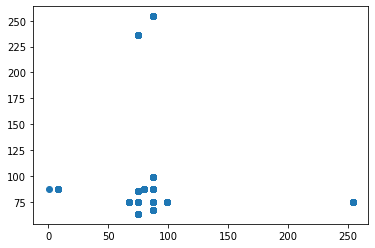

t+1 vs t-230


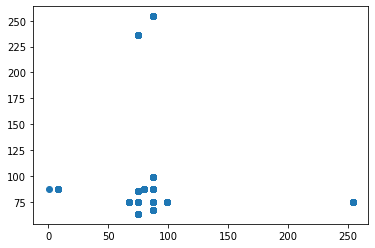

t+1 vs t-231


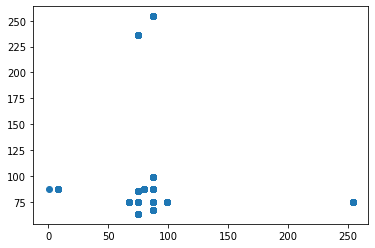

t+1 vs t-232


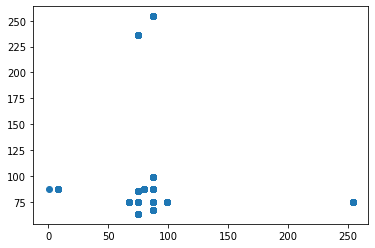

t+1 vs t-233


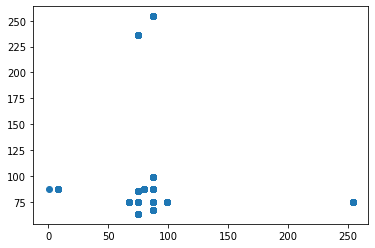

t+1 vs t-234


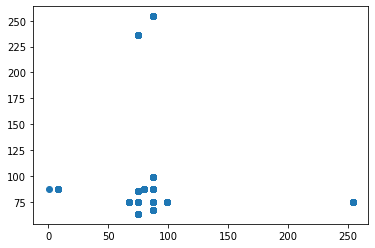

t+1 vs t-235


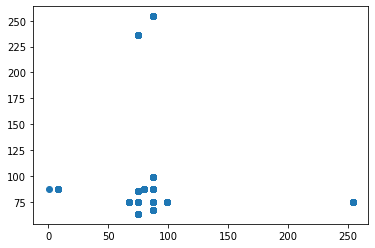

t+1 vs t-236


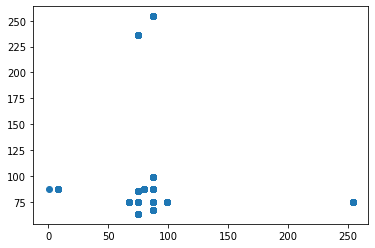

t+1 vs t-237


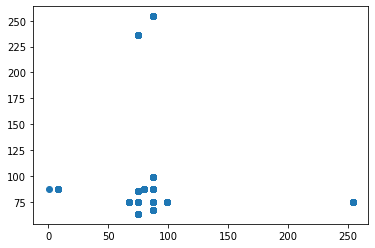

t+1 vs t-238


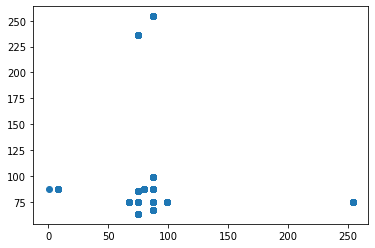

t+1 vs t-239


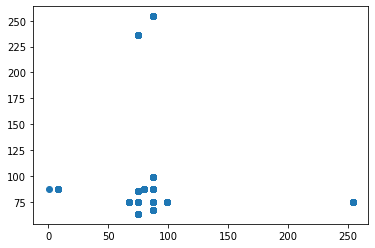

t+1 vs t-240


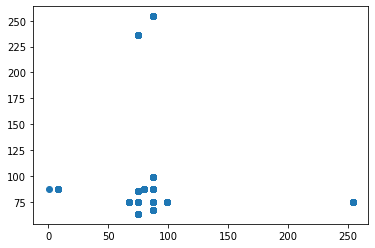

t+1 vs t-241


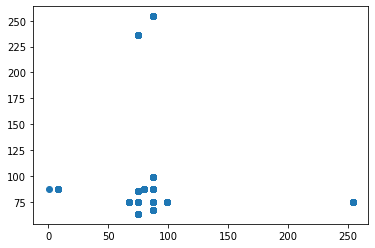

t+1 vs t-242


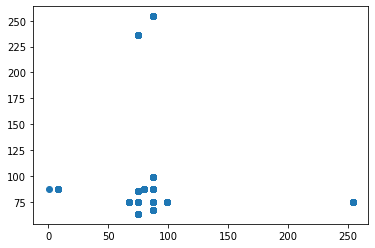

t+1 vs t-243


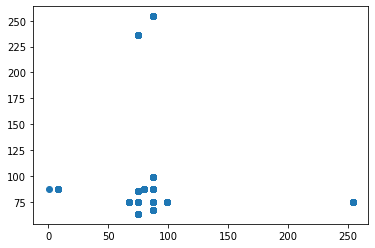

t+1 vs t-244


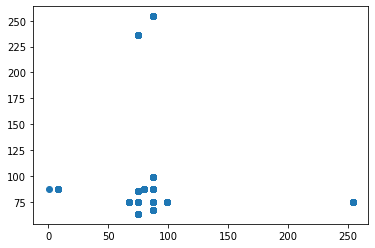

t+1 vs t-245


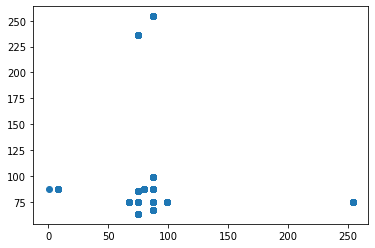

t+1 vs t-246


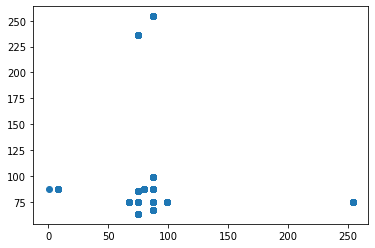

t+1 vs t-247


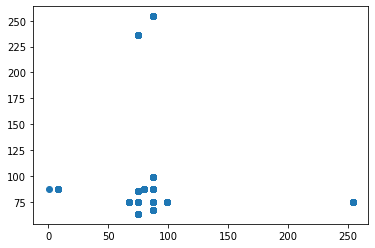

t+1 vs t-248


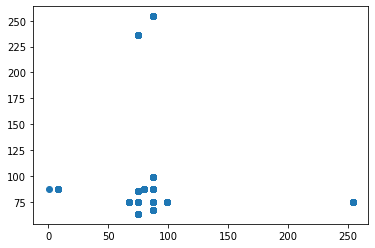

t+1 vs t-249


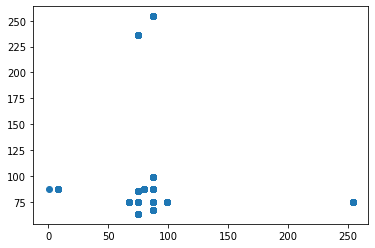

t+1 vs t-250


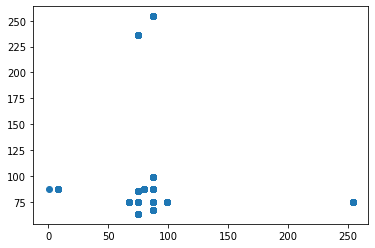

t+1 vs t-251


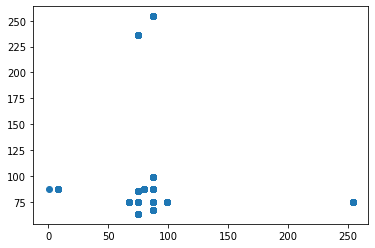

t+1 vs t-252


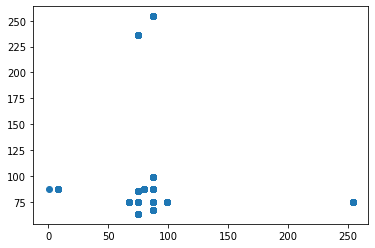

t+1 vs t-253


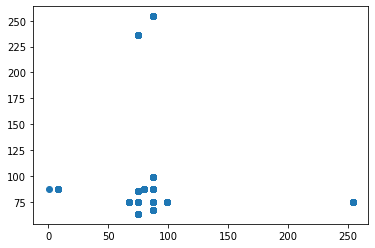

t+1 vs t-254


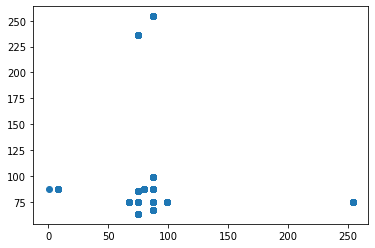

t+1 vs t-255


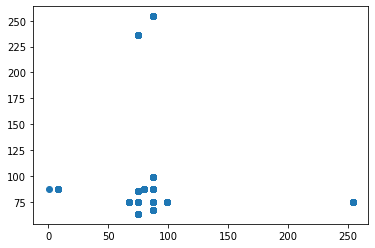

t+1 vs t-256


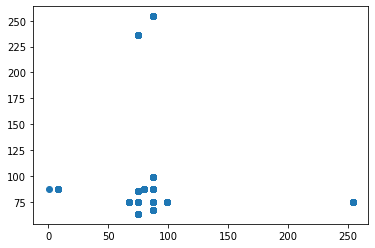

t+1 vs t-257


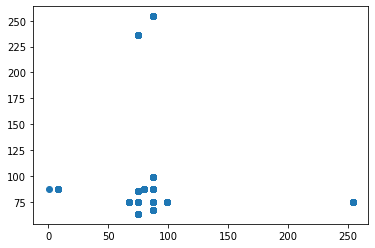

t+1 vs t-258


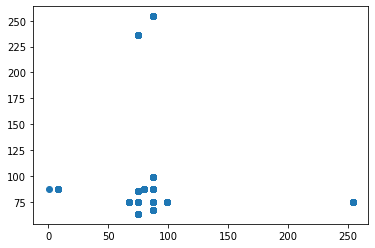

t+1 vs t-259


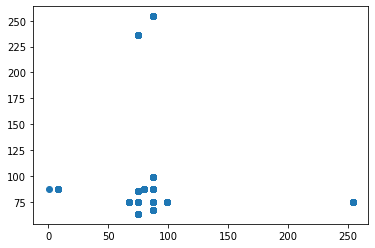

t+1 vs t-260


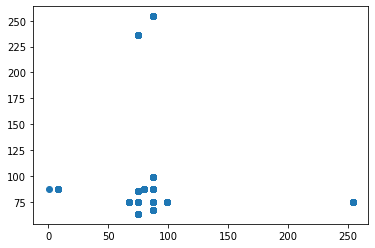

t+1 vs t-261


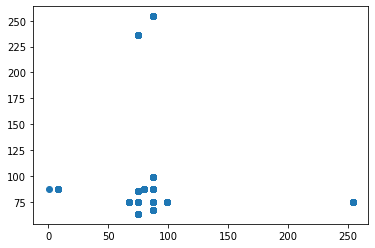

t+1 vs t-262


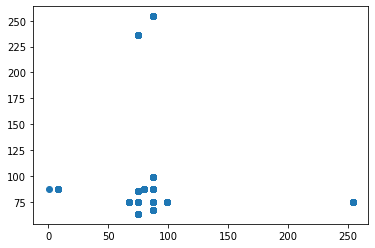

t+1 vs t-263


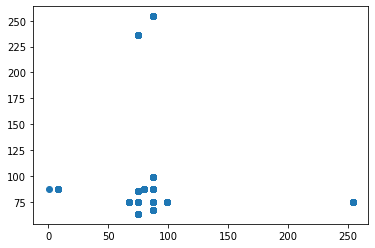

t+1 vs t-264


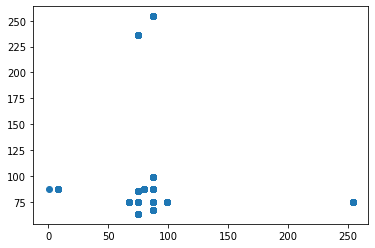

t+1 vs t-265


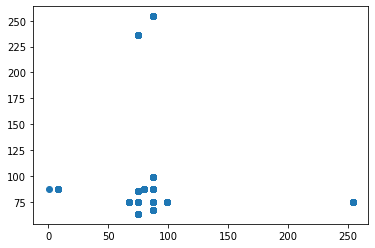

t+1 vs t-266


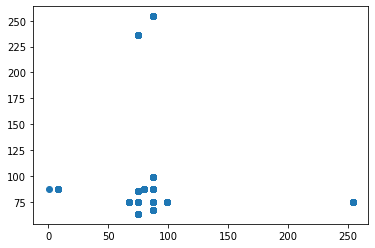

t+1 vs t-267


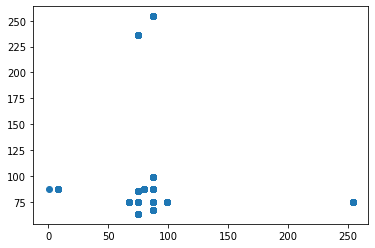

t+1 vs t-268


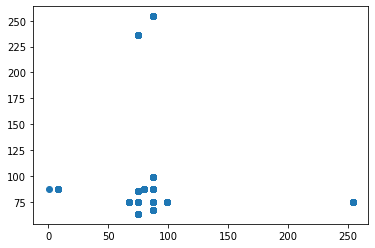

t+1 vs t-269


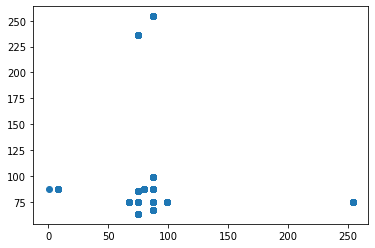

t+1 vs t-270


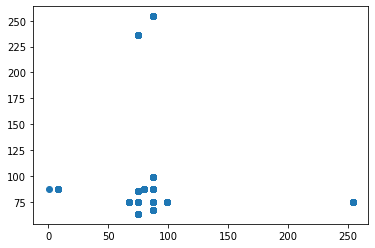

t+1 vs t-271


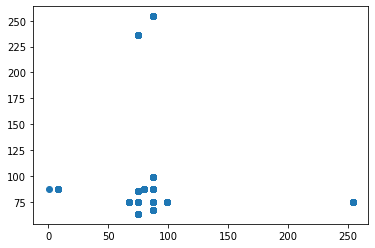

t+1 vs t-272


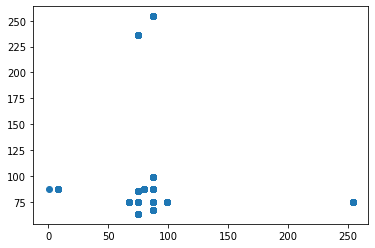

t+1 vs t-273


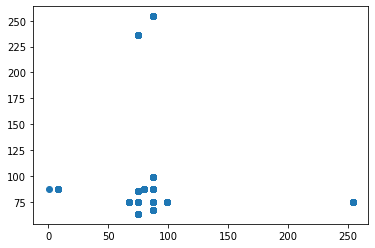

t+1 vs t-274


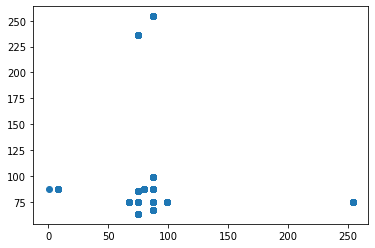

t+1 vs t-275


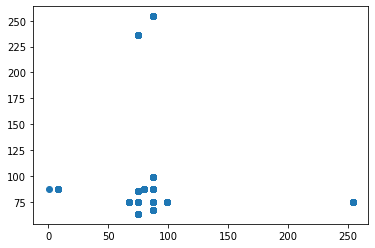

t+1 vs t-276


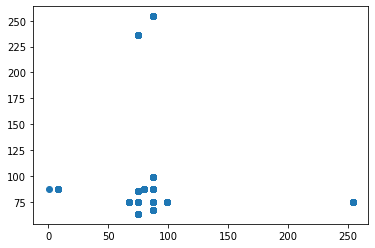

t+1 vs t-277


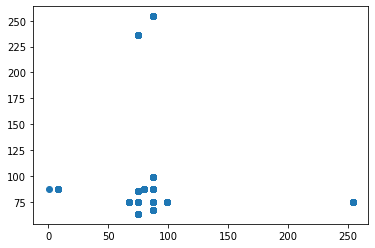

t+1 vs t-278


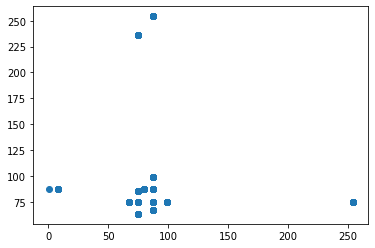

t+1 vs t-279


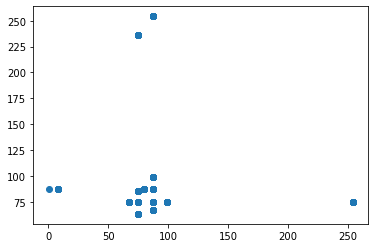

t+1 vs t-280


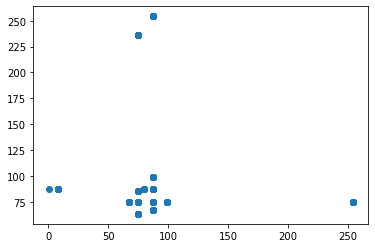

t+1 vs t-281


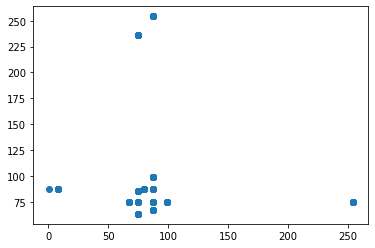

t+1 vs t-282


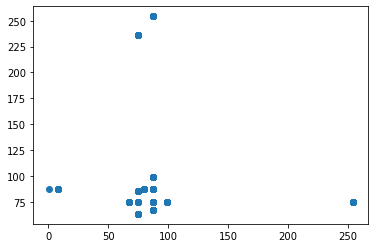

t+1 vs t-283


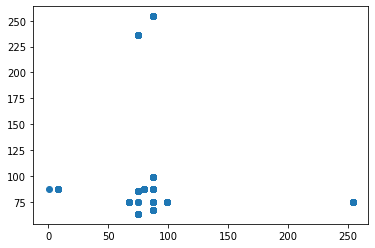

t+1 vs t-284


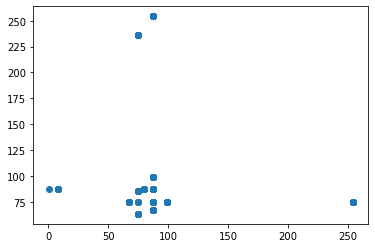

t+1 vs t-285


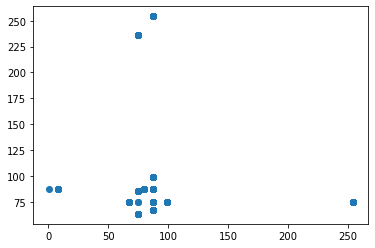

t+1 vs t-286


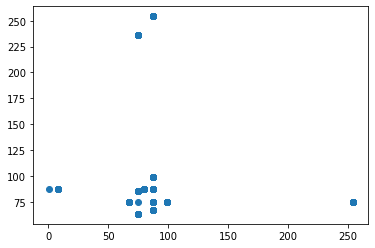

t+1 vs t-287


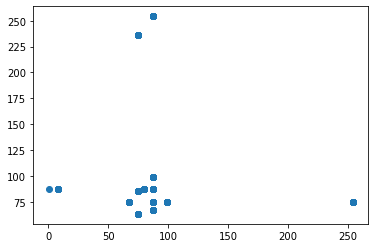

t+1 vs t-288


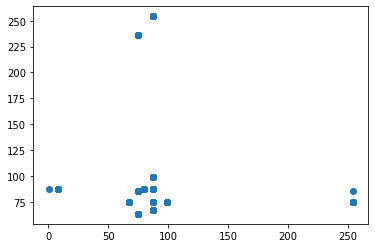

t+1 vs t-289


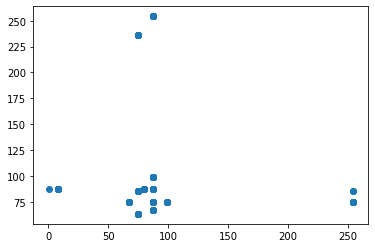

t+1 vs t-290


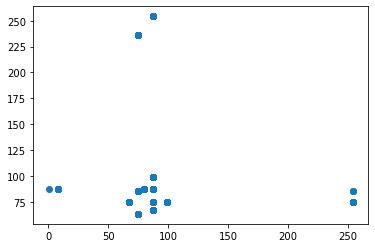

t+1 vs t-291


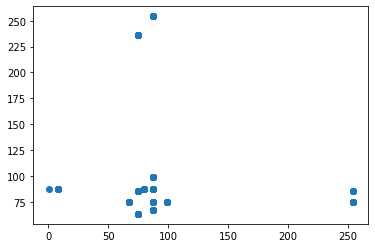

t+1 vs t-292


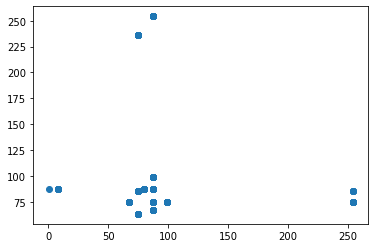

t+1 vs t-293


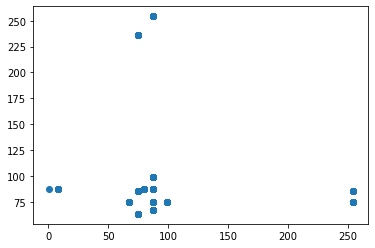

t+1 vs t-294


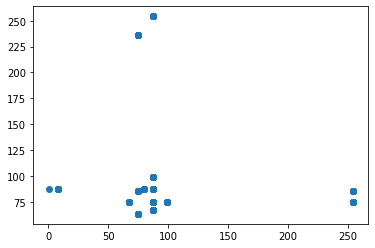

t+1 vs t-295


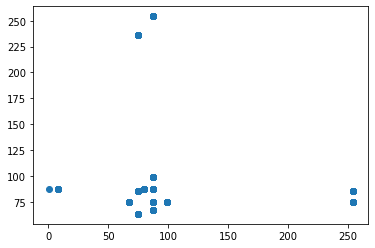

t+1 vs t-296


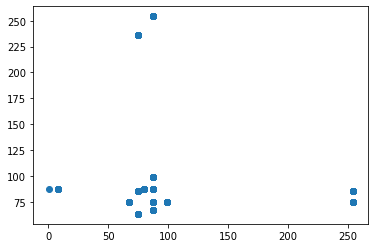

t+1 vs t-297


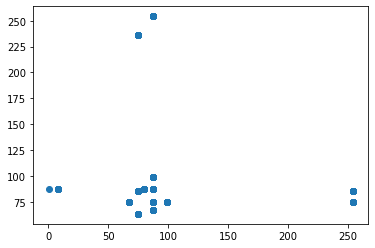

t+1 vs t-298


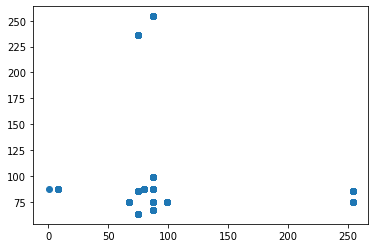

t+1 vs t-299


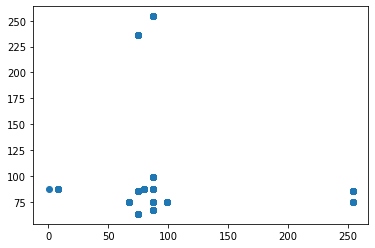

t+1 vs t-300


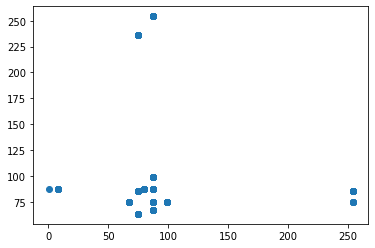

t+1 vs t-301


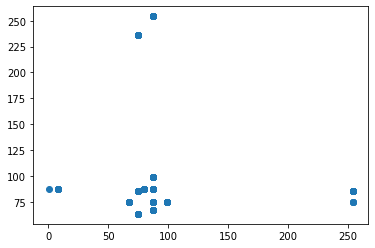

t+1 vs t-302


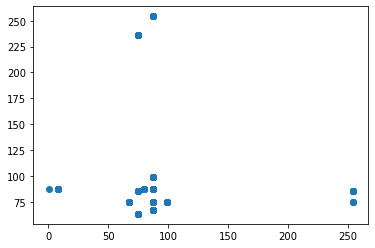

t+1 vs t-303


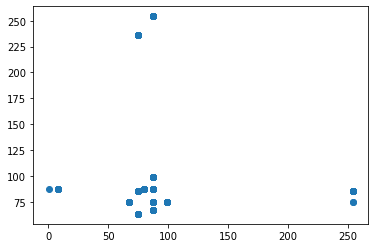

t+1 vs t-304


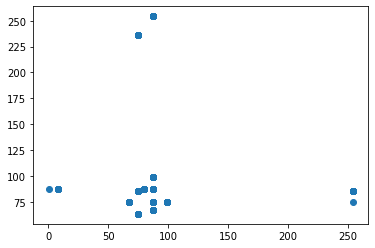

t+1 vs t-305


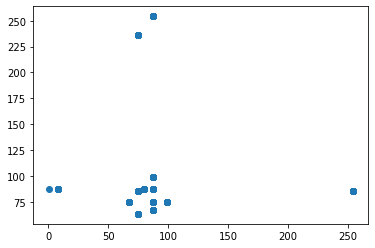

t+1 vs t-306


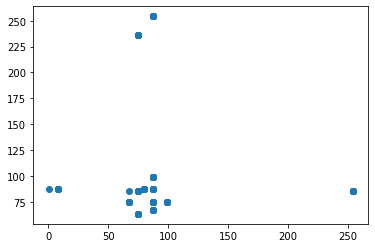

t+1 vs t-307


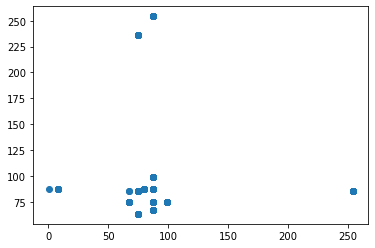

t+1 vs t-308


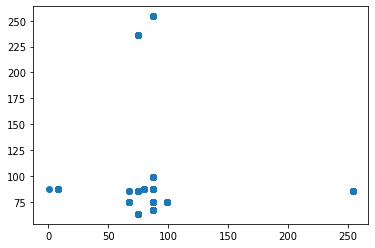

t+1 vs t-309


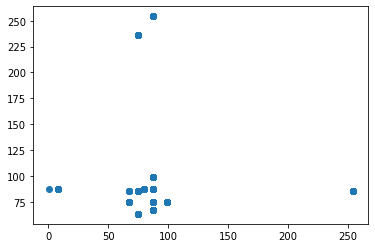

t+1 vs t-310


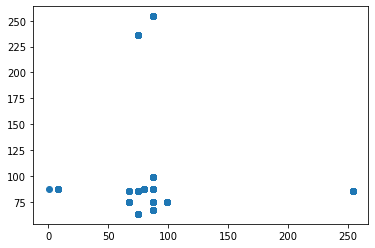

t+1 vs t-311


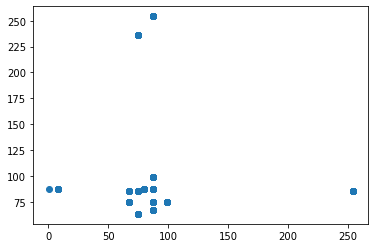

t+1 vs t-312


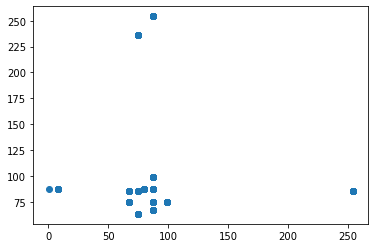

t+1 vs t-313


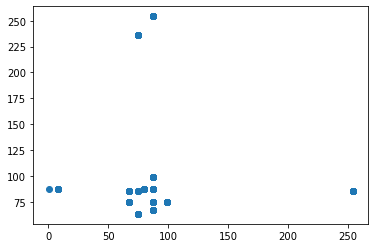

t+1 vs t-314


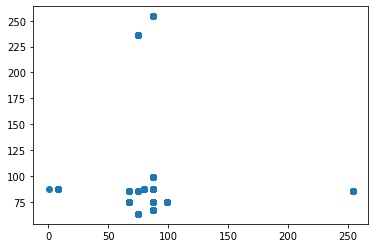

t+1 vs t-315


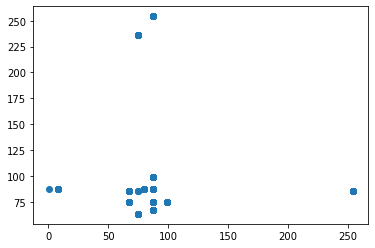

t+1 vs t-316


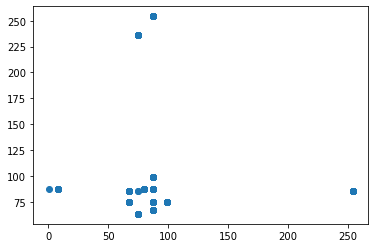

t+1 vs t-317


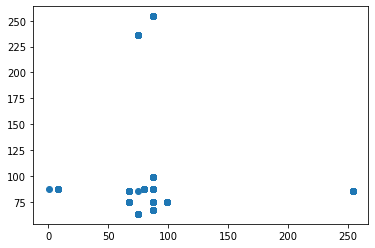

t+1 vs t-318


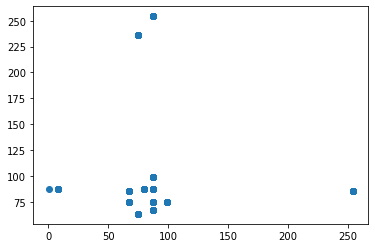

t+1 vs t-319


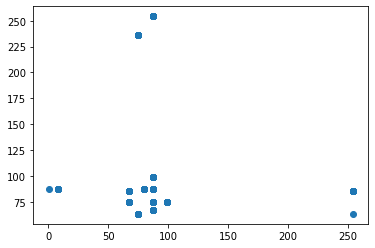

t+1 vs t-320


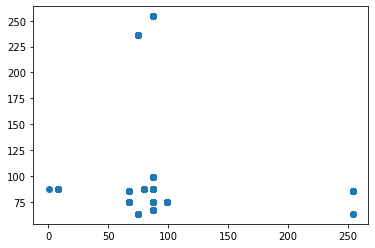

t+1 vs t-321


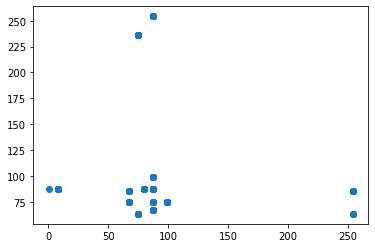

t+1 vs t-322


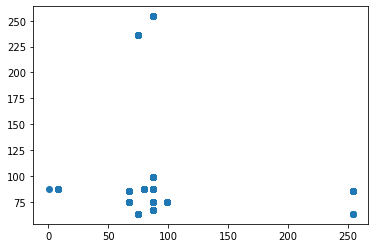

t+1 vs t-323


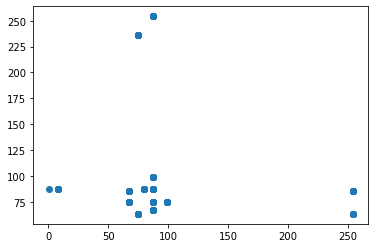

t+1 vs t-324


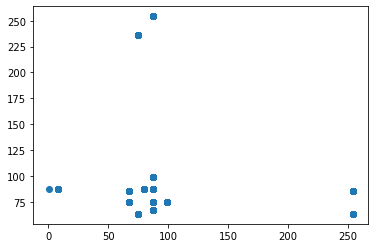

t+1 vs t-325


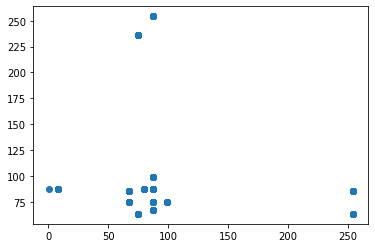

t+1 vs t-326


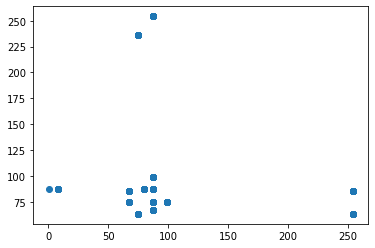

t+1 vs t-327


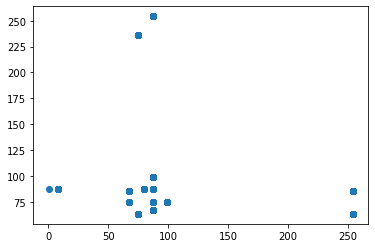

t+1 vs t-328


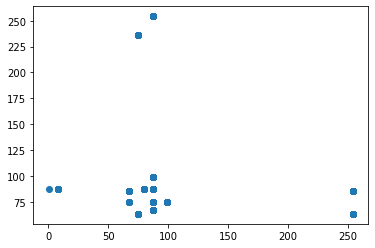

t+1 vs t-329


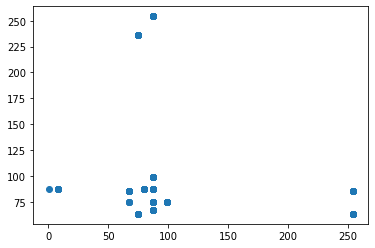

t+1 vs t-330


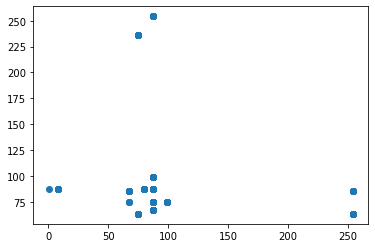

t+1 vs t-331


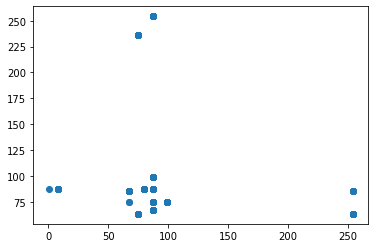

t+1 vs t-332


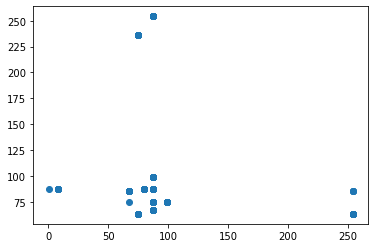

t+1 vs t-333


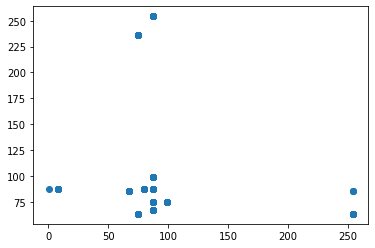

t+1 vs t-334


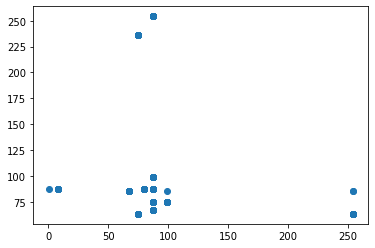

t+1 vs t-335


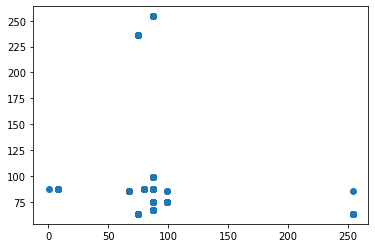

t+1 vs t-336


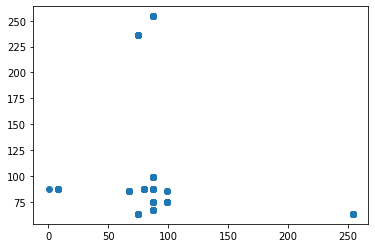

t+1 vs t-337


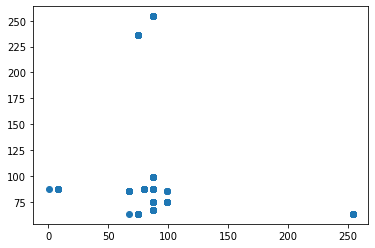

t+1 vs t-338


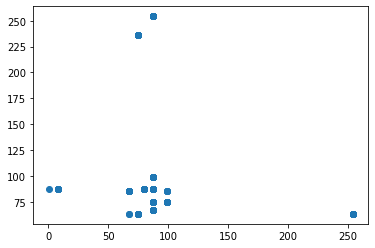

t+1 vs t-339


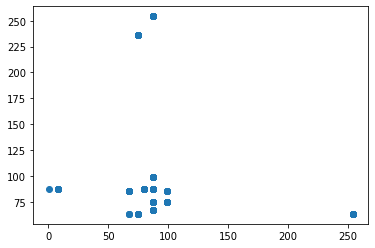

t+1 vs t-340


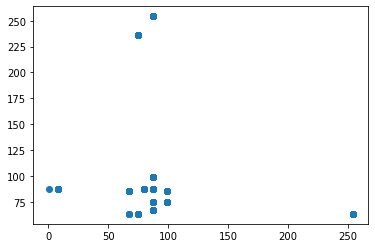

t+1 vs t-341


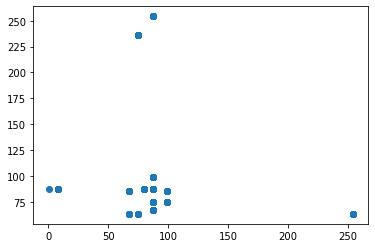

t+1 vs t-342


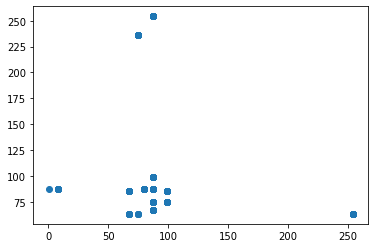

t+1 vs t-343


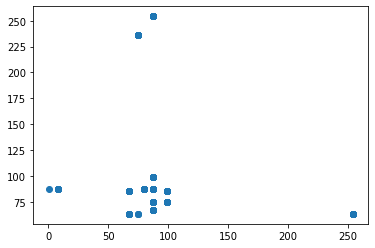

t+1 vs t-344


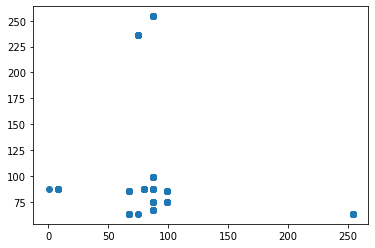

t+1 vs t-345


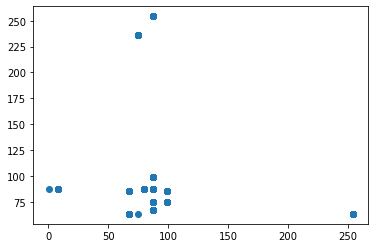

t+1 vs t-346


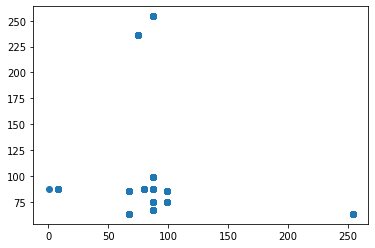

t+1 vs t-347


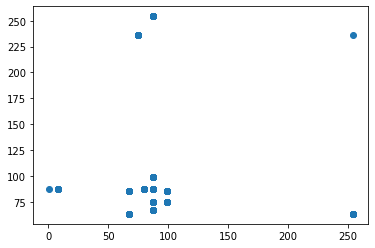

t+1 vs t-348


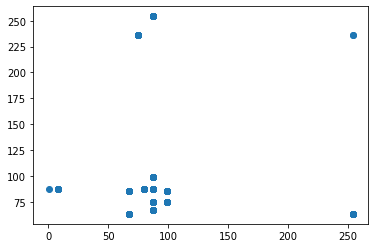

t+1 vs t-349


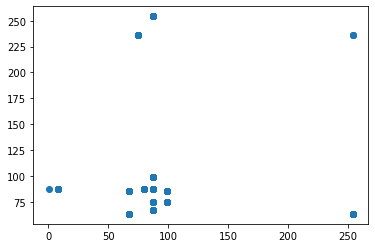

t+1 vs t-350


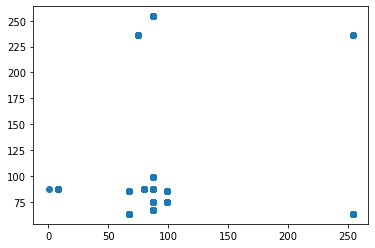

t+1 vs t-351


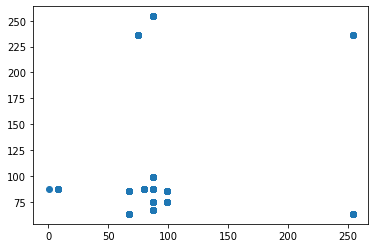

t+1 vs t-352


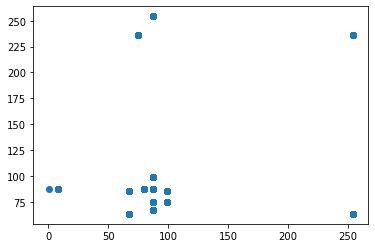

t+1 vs t-353


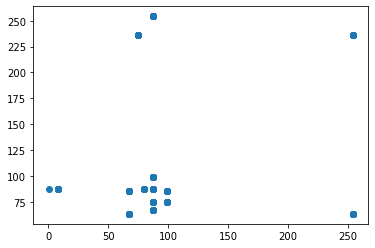

t+1 vs t-354


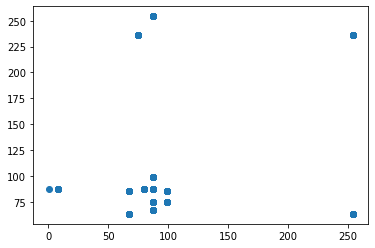

t+1 vs t-355


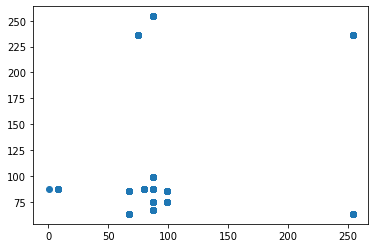

t+1 vs t-356


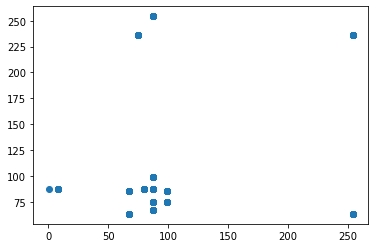

t+1 vs t-357


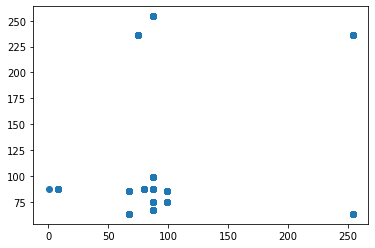

t+1 vs t-358


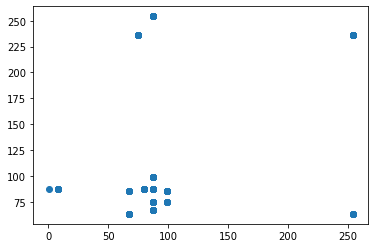

t+1 vs t-359


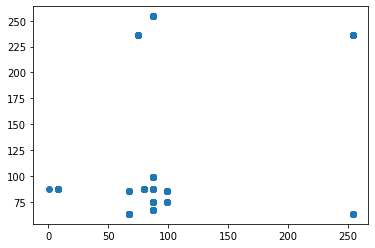

t+1 vs t-360


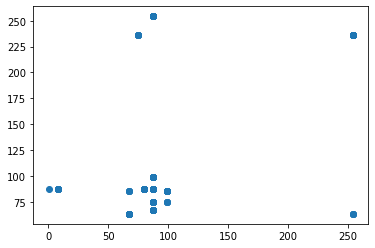

t+1 vs t-361


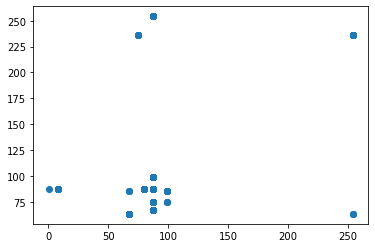

t+1 vs t-362


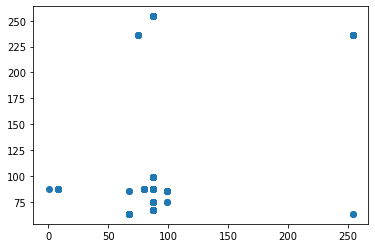

t+1 vs t-363


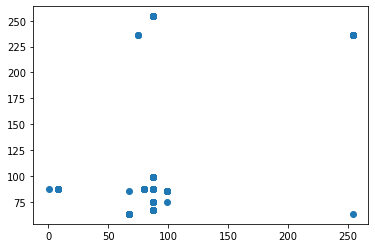

t+1 vs t-364


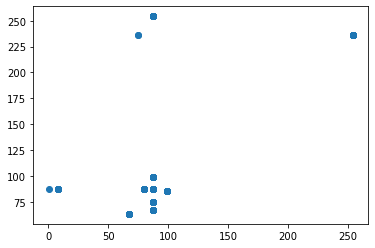

t+1 vs t-365


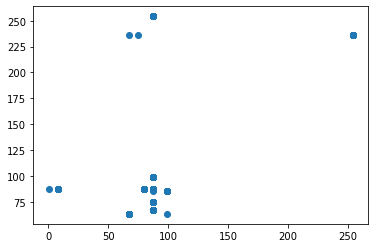

t+1 vs t-366


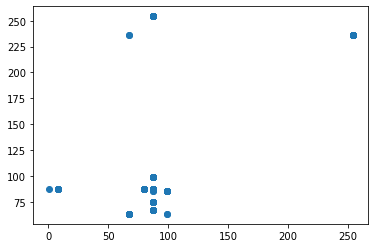

t+1 vs t-367


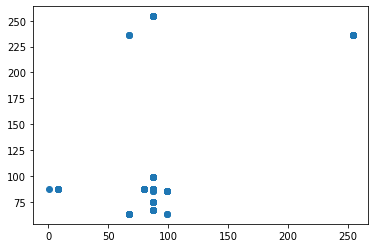

t+1 vs t-368


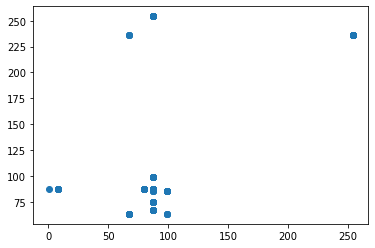

t+1 vs t-369


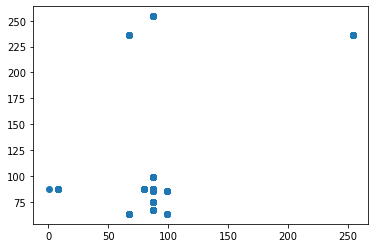

t+1 vs t-370


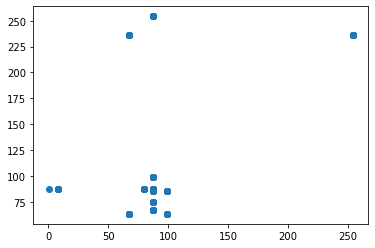

t+1 vs t-371


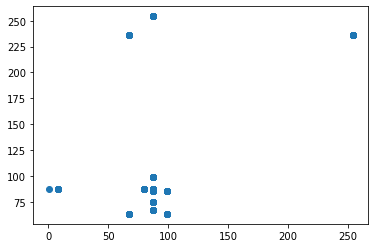

t+1 vs t-372


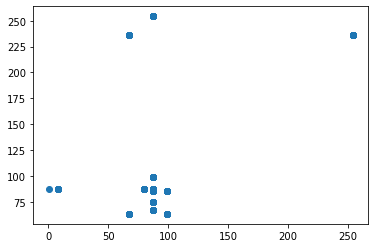

t+1 vs t-373


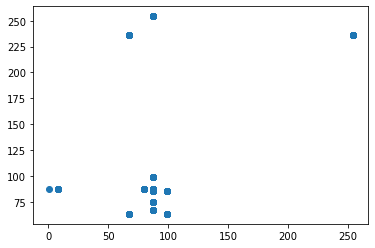

t+1 vs t-374


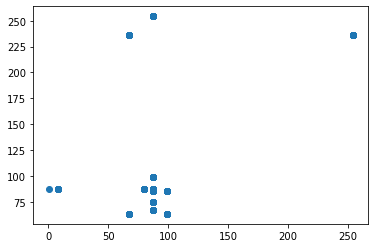

t+1 vs t-375


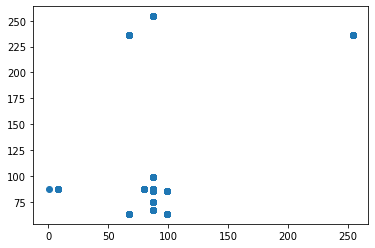

t+1 vs t-376


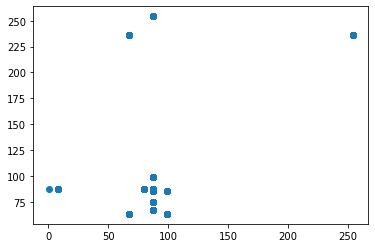

t+1 vs t-377


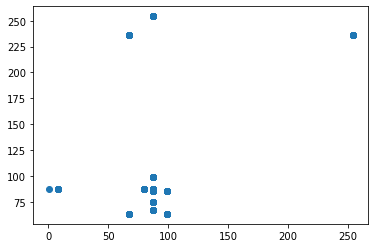

t+1 vs t-378


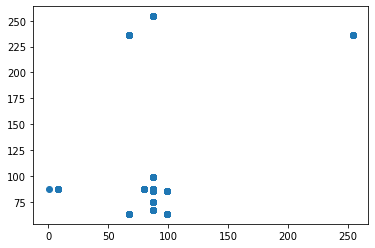

t+1 vs t-379


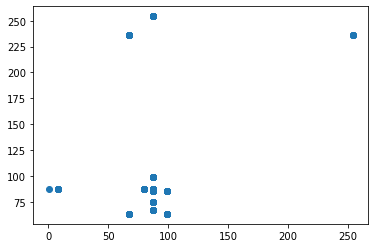

t+1 vs t-380


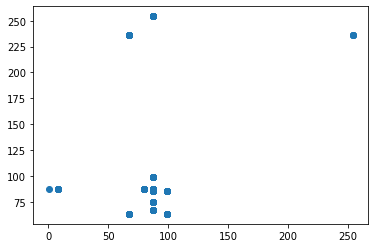

t+1 vs t-381


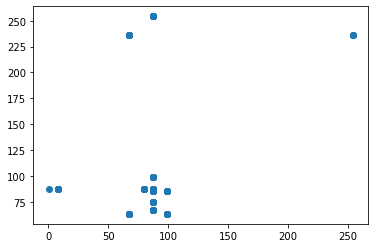

t+1 vs t-382


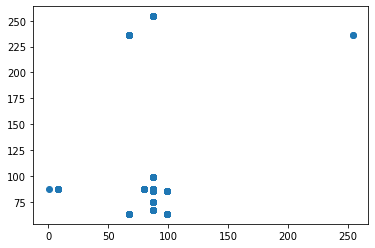

t+1 vs t-383


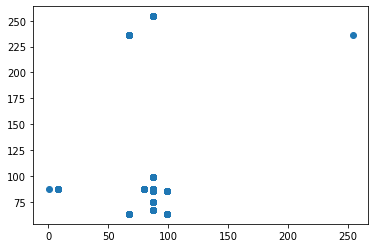

t+1 vs t-384


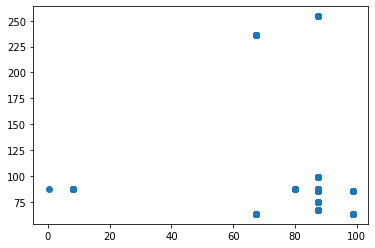

t+1 vs t-385


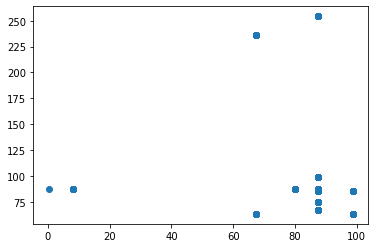

t+1 vs t-386


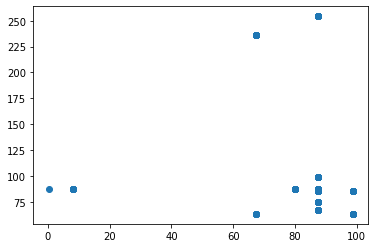

t+1 vs t-387


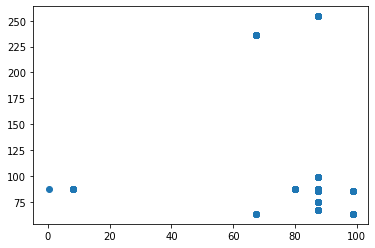

t+1 vs t-388


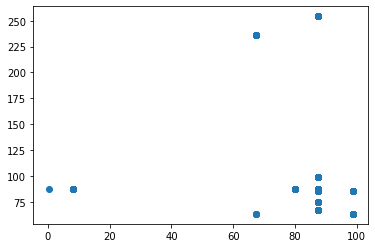

t+1 vs t-389


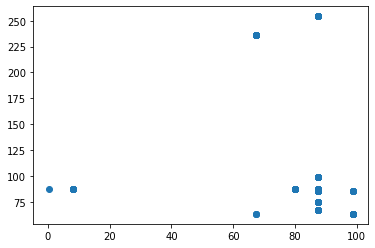

t+1 vs t-390


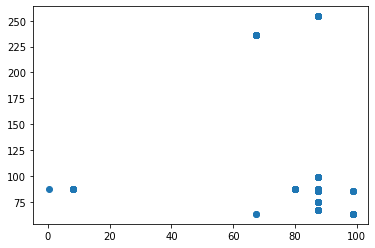

t+1 vs t-391


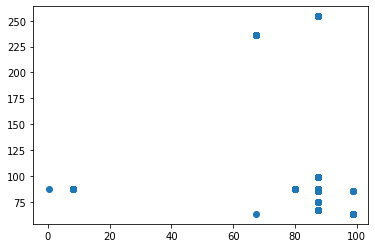

t+1 vs t-392


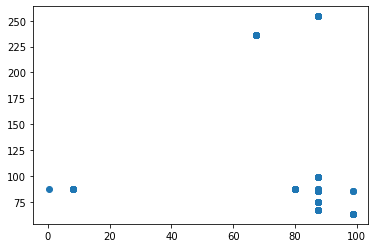

t+1 vs t-393


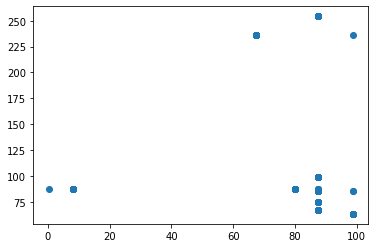

t+1 vs t-394


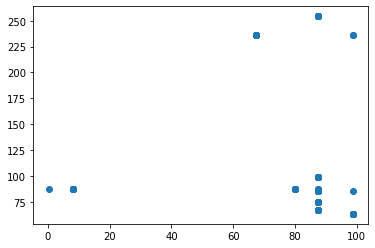

t+1 vs t-395


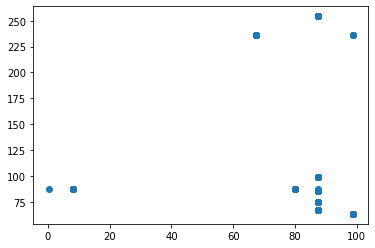

t+1 vs t-396


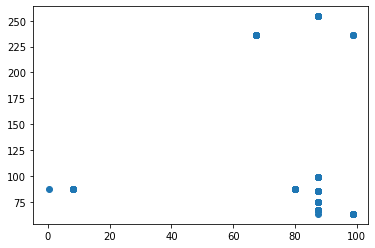

t+1 vs t-397


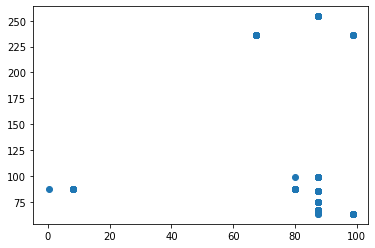

t+1 vs t-398


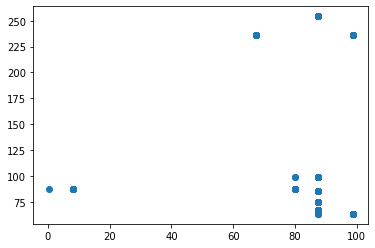

t+1 vs t-399


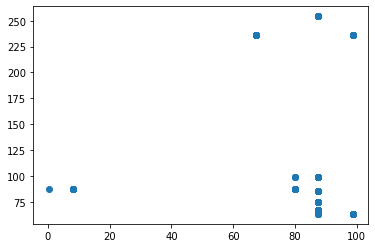

t+1 vs t-400


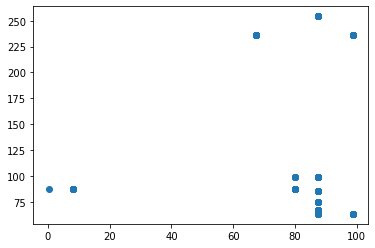

t+1 vs t-401


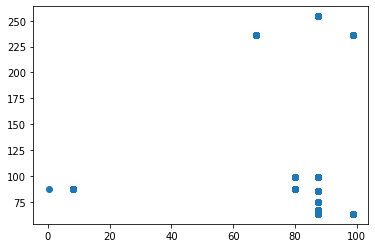

t+1 vs t-402


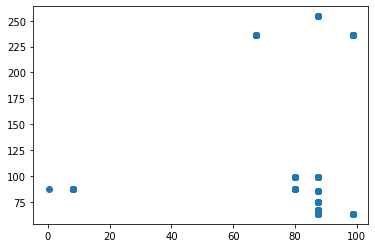

t+1 vs t-403


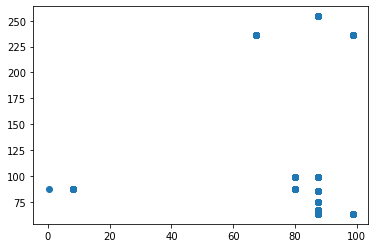

t+1 vs t-404


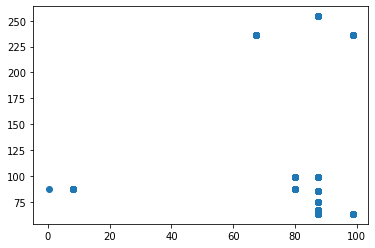

t+1 vs t-405


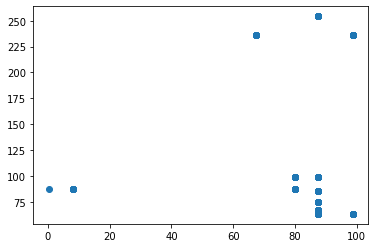

t+1 vs t-406


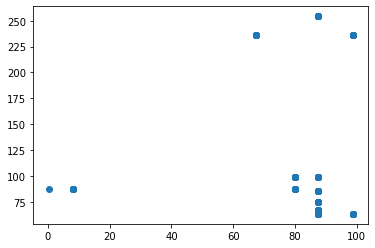

t+1 vs t-407


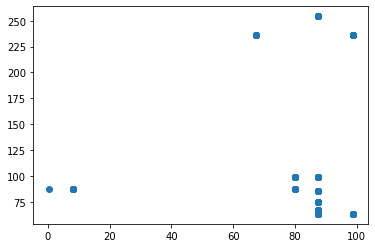

t+1 vs t-408


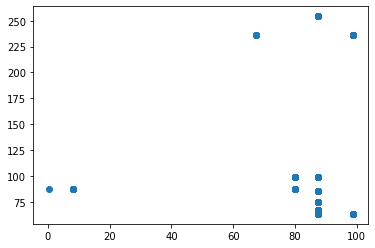

t+1 vs t-409


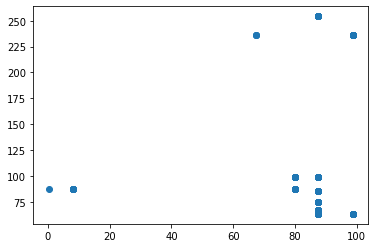

t+1 vs t-410


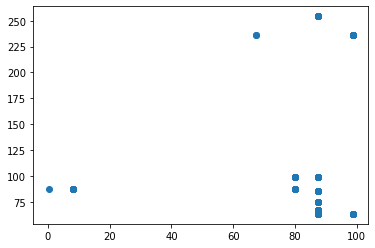

t+1 vs t-411


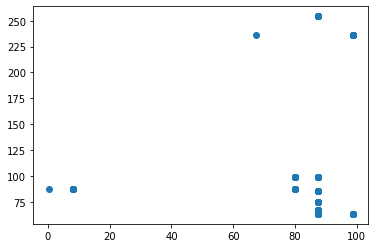

t+1 vs t-412


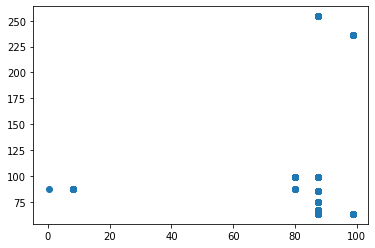

t+1 vs t-413


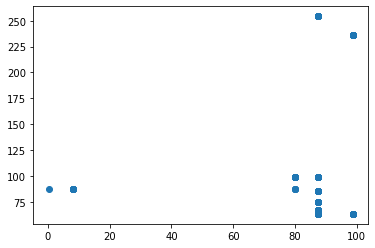

t+1 vs t-414


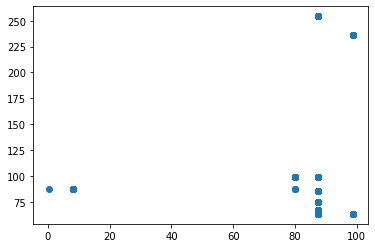

t+1 vs t-415


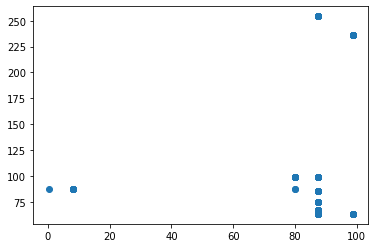

t+1 vs t-416


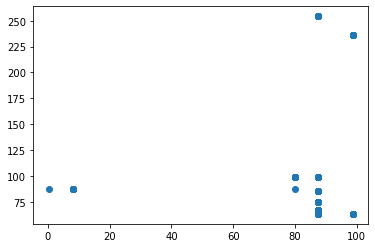

t+1 vs t-417


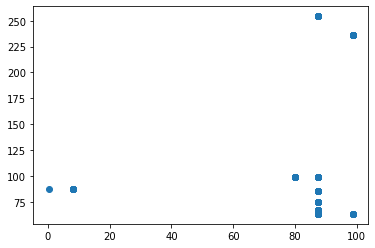

t+1 vs t-418


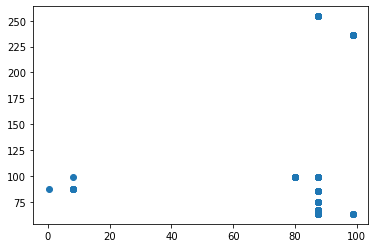

t+1 vs t-419


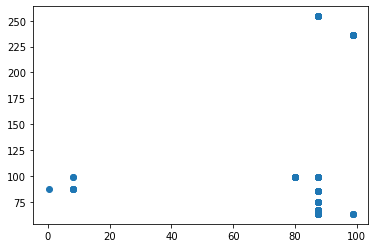

t+1 vs t-420


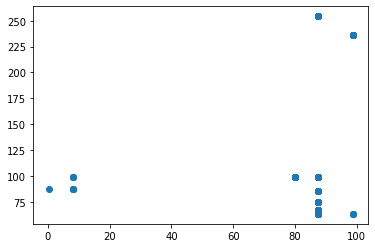

t+1 vs t-421


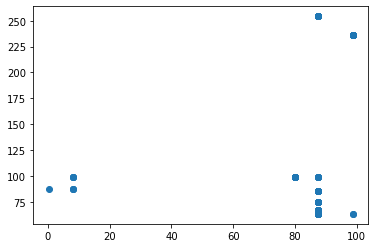

t+1 vs t-422


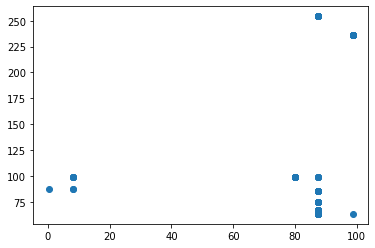

t+1 vs t-423


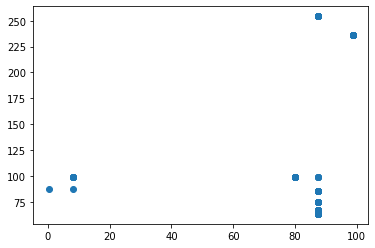

t+1 vs t-424


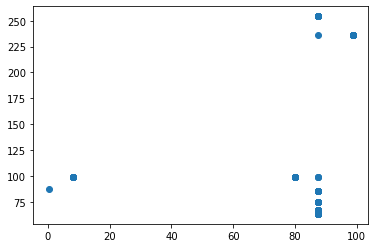

t+1 vs t-425


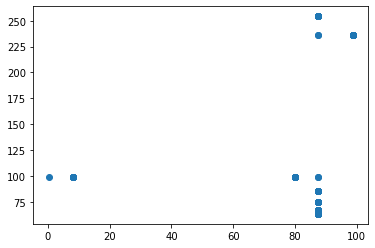

t+1 vs t-426


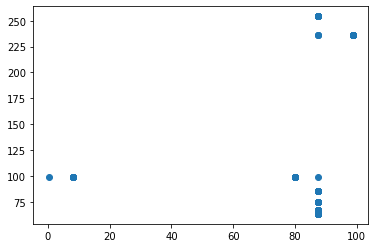

t+1 vs t-427


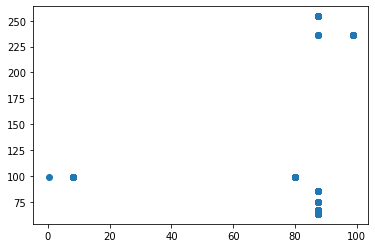

t+1 vs t-428


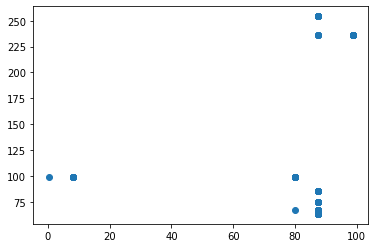

t+1 vs t-429


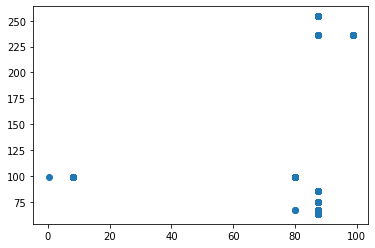

t+1 vs t-430


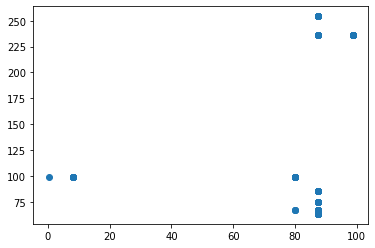

t+1 vs t-431


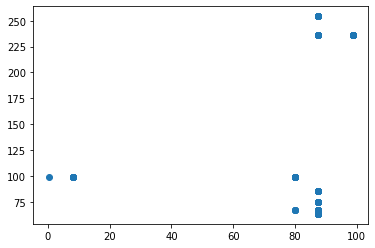

t+1 vs t-432


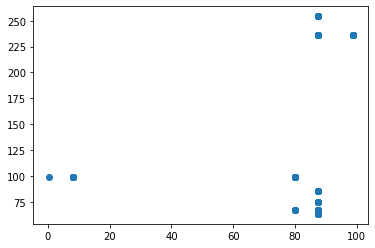

t+1 vs t-433


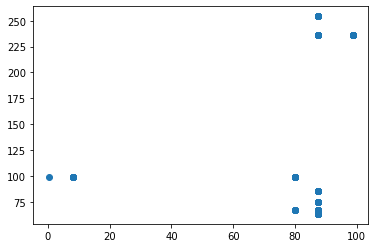

t+1 vs t-434


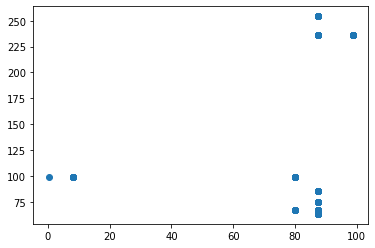

t+1 vs t-435


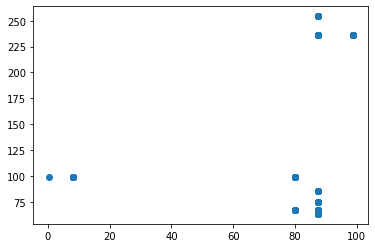

t+1 vs t-436


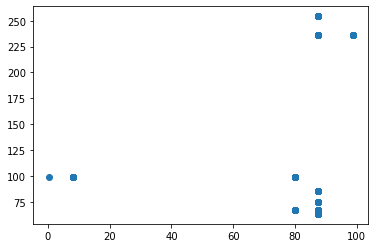

t+1 vs t-437


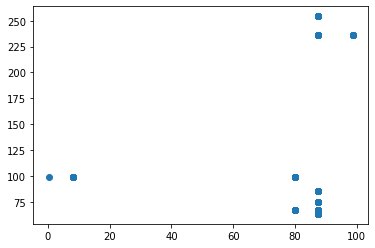

t+1 vs t-438


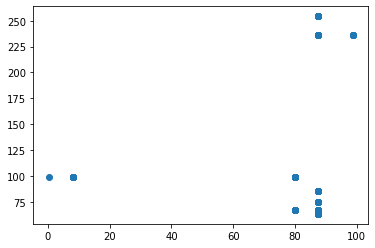

t+1 vs t-439


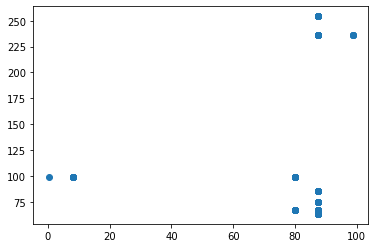

t+1 vs t-440


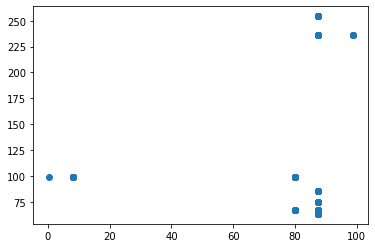

t+1 vs t-441


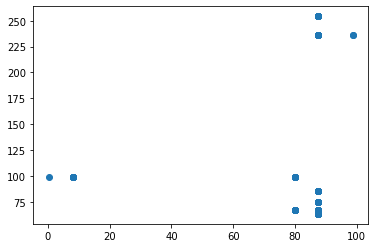

t+1 vs t-442


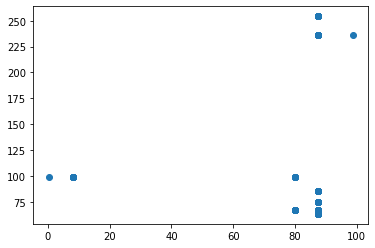

t+1 vs t-443


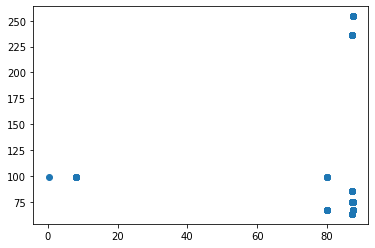

t+1 vs t-444


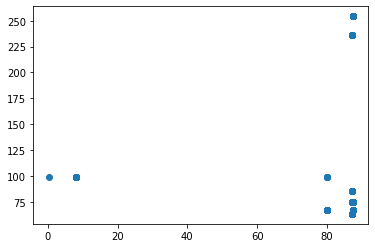

t+1 vs t-445


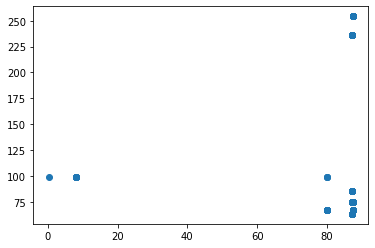

t+1 vs t-446


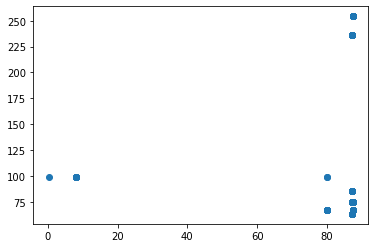

t+1 vs t-447


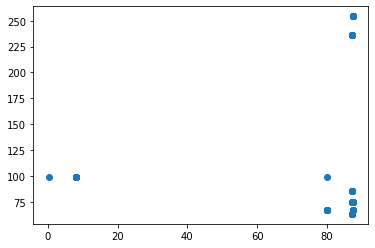

t+1 vs t-448


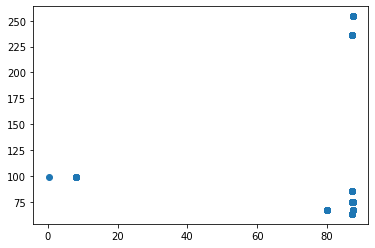

t+1 vs t-449


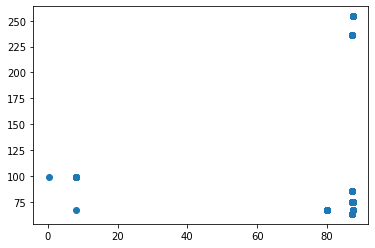

t+1 vs t-450


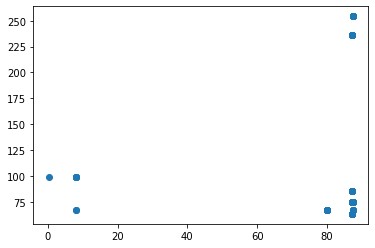

t+1 vs t-451


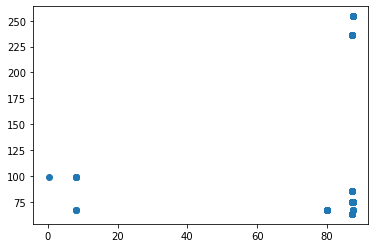

t+1 vs t-452


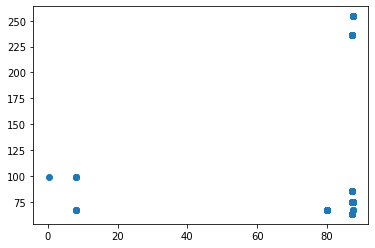

t+1 vs t-453


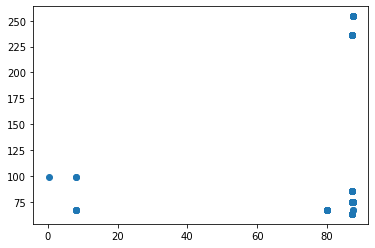

t+1 vs t-454


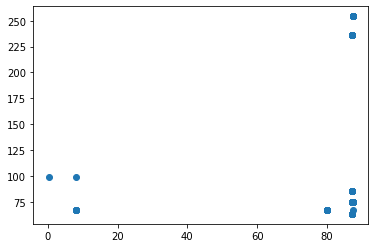

t+1 vs t-455


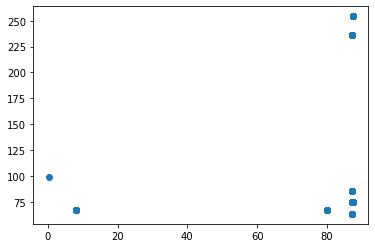

t+1 vs t-456


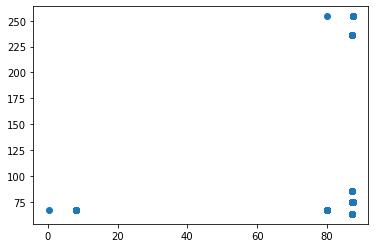

t+1 vs t-457


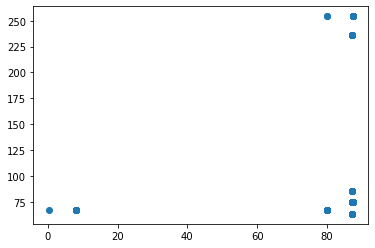

t+1 vs t-458


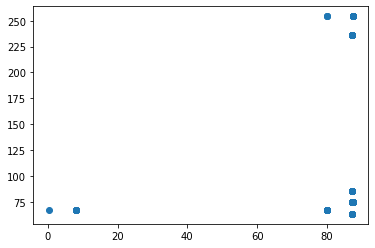

t+1 vs t-459


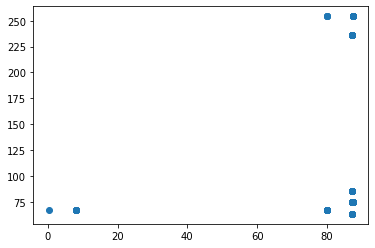

t+1 vs t-460


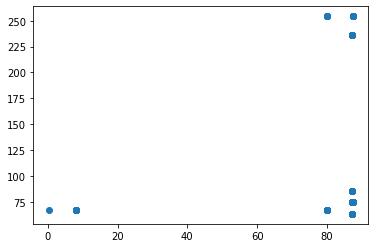

t+1 vs t-461


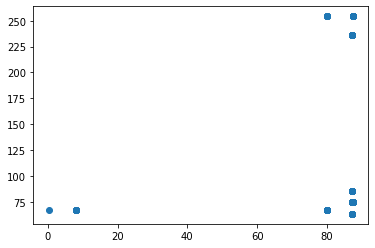

t+1 vs t-462


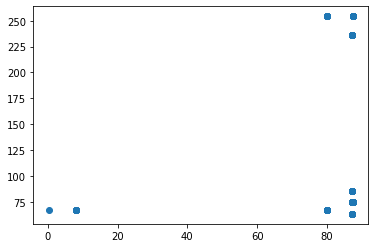

t+1 vs t-463


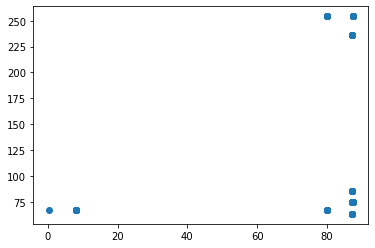

t+1 vs t-464


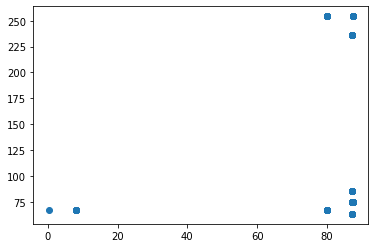

t+1 vs t-465


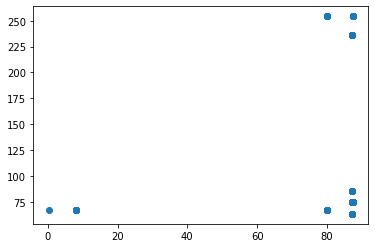

t+1 vs t-466


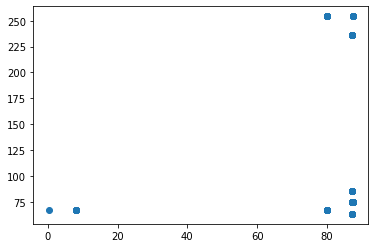

t+1 vs t-467


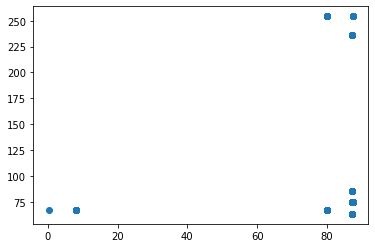

t+1 vs t-468


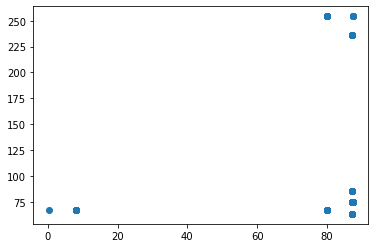

t+1 vs t-469


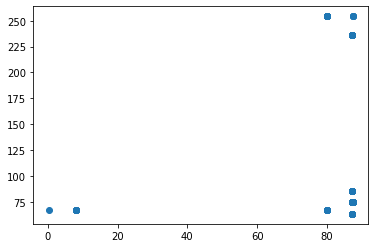

t+1 vs t-470


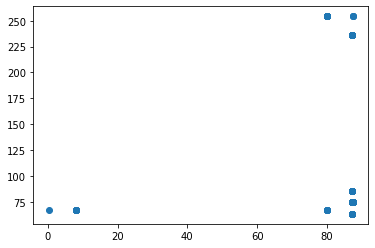

t+1 vs t-471


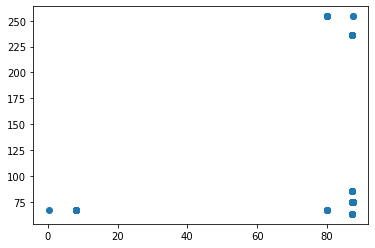

t+1 vs t-472


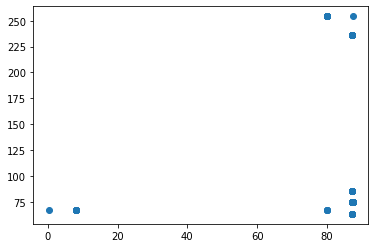

t+1 vs t-473


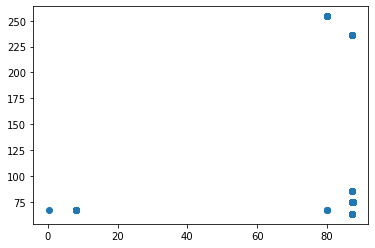

t+1 vs t-474


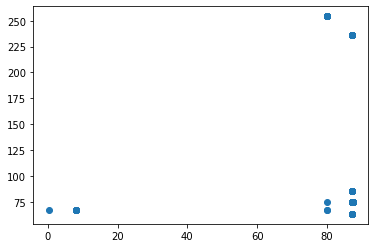

t+1 vs t-475


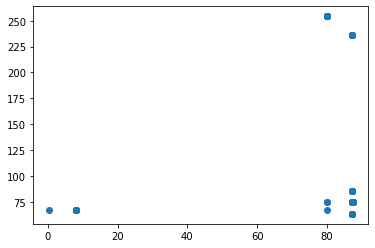

t+1 vs t-476


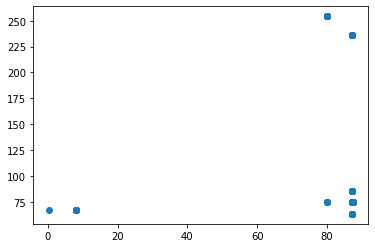

t+1 vs t-477


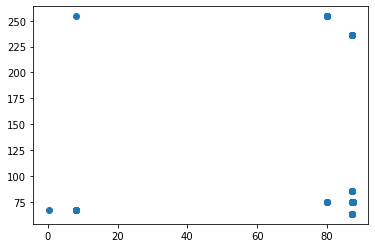

t+1 vs t-478


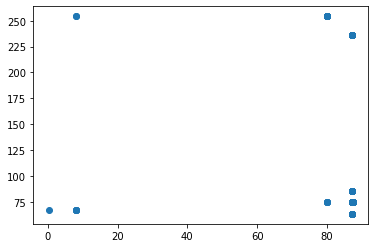

t+1 vs t-479


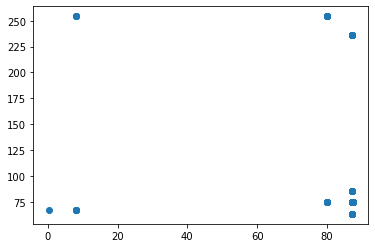

t+1 vs t-480


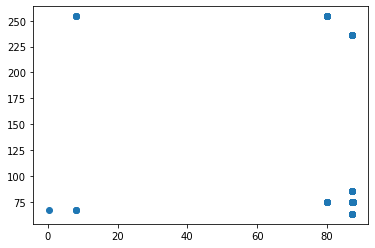

t+1 vs t-481


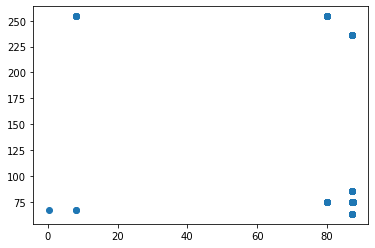

t+1 vs t-482


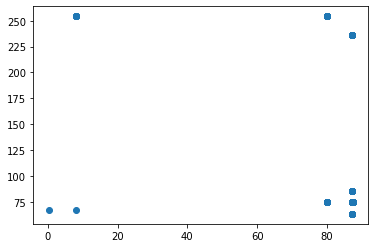

t+1 vs t-483


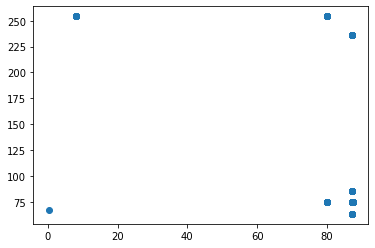

t+1 vs t-484


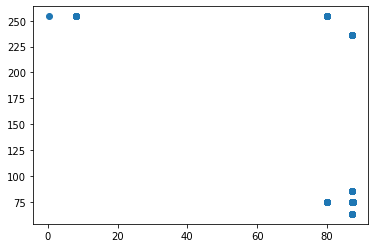

t+1 vs t-485


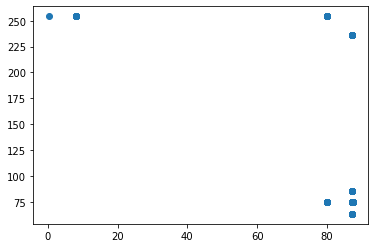

t+1 vs t-486


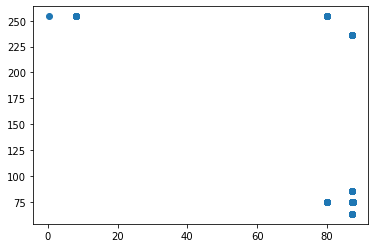

t+1 vs t-487


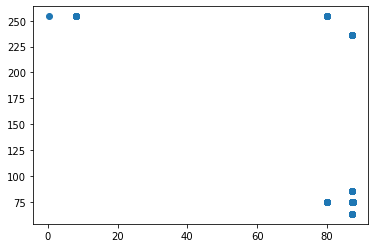

t+1 vs t-488


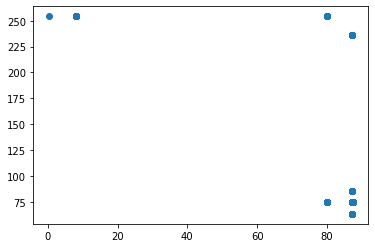

t+1 vs t-489


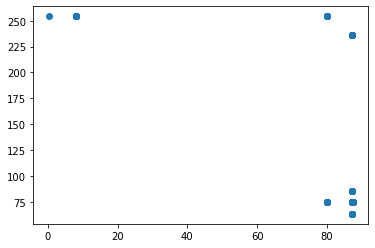

t+1 vs t-490


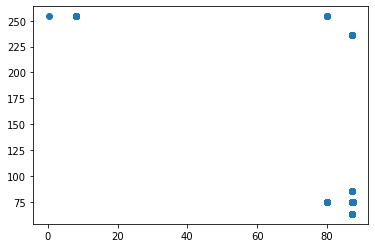

t+1 vs t-491


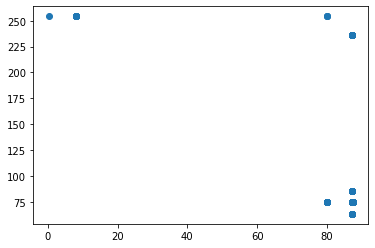

t+1 vs t-492


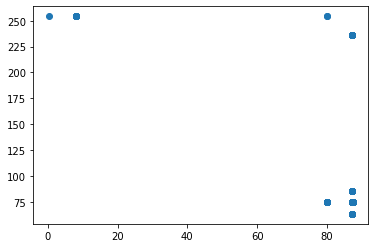

t+1 vs t-493


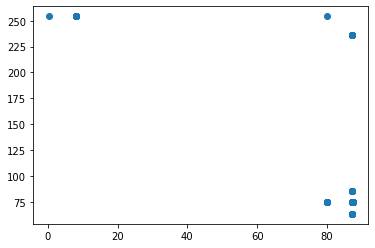

t+1 vs t-494


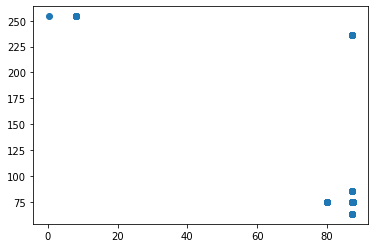

t+1 vs t-495


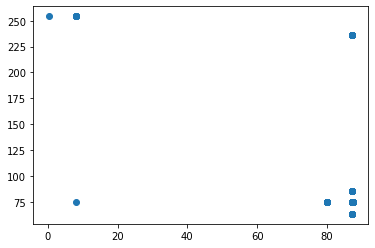

t+1 vs t-496


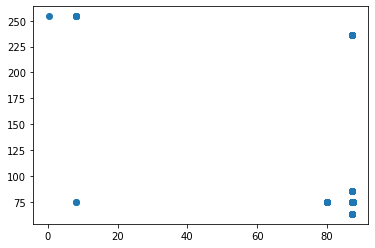

t+1 vs t-497


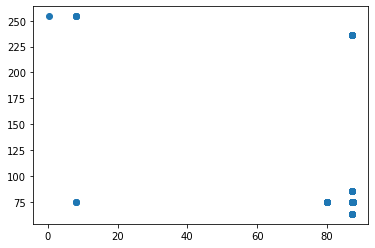

t+1 vs t-498


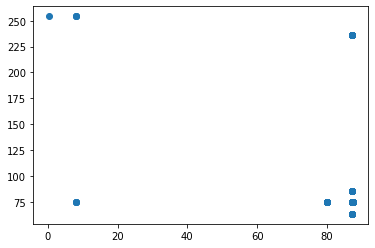

t+1 vs t-499


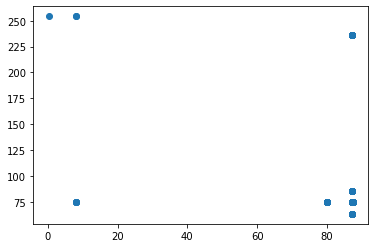

t+1 vs t-500


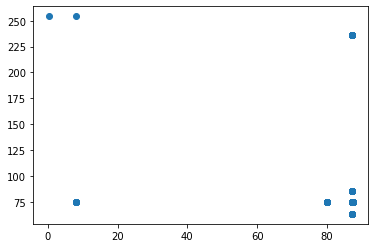

t+1 vs t-501


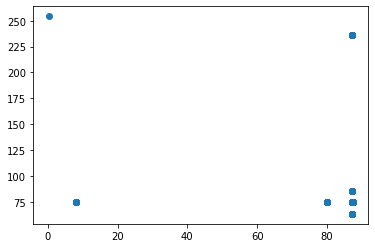

t+1 vs t-502


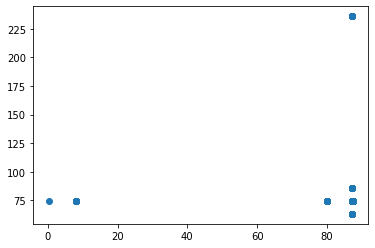

t+1 vs t-503


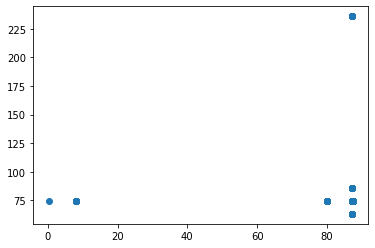

t+1 vs t-504


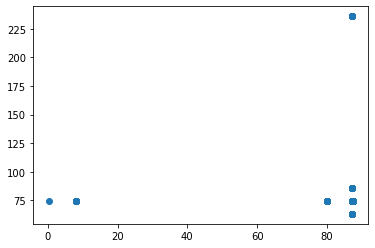

t+1 vs t-505


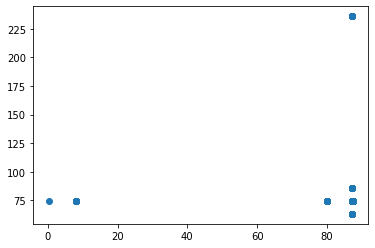

t+1 vs t-506


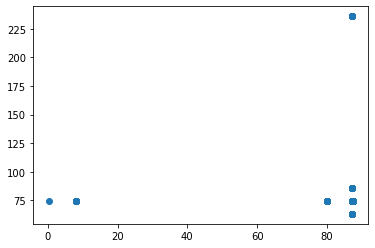

t+1 vs t-507


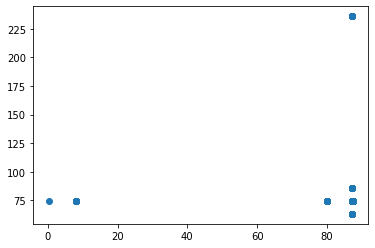

t+1 vs t-508


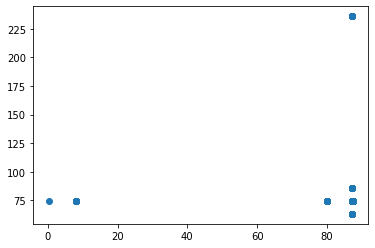

t+1 vs t-509


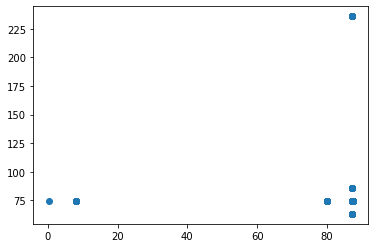

t+1 vs t-510


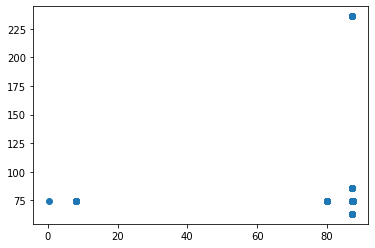

t+1 vs t-511


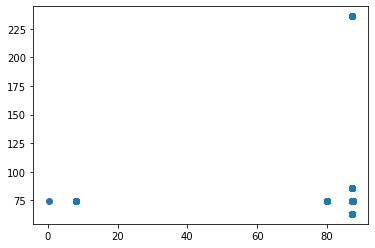

t+1 vs t-512


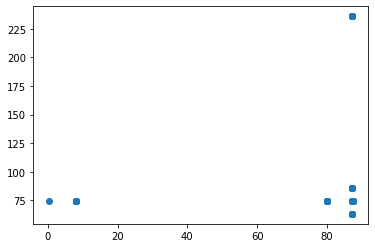

t+1 vs t-513


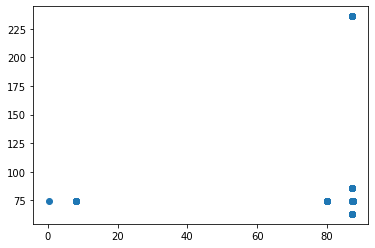

t+1 vs t-514


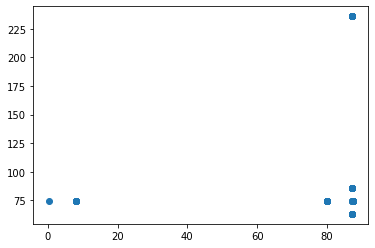

t+1 vs t-515


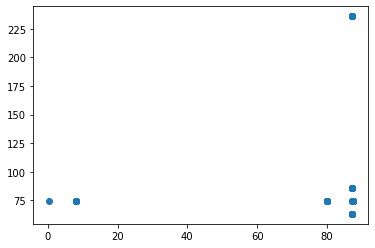

t+1 vs t-516


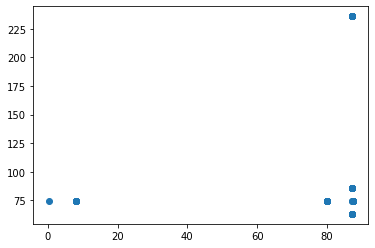

t+1 vs t-517


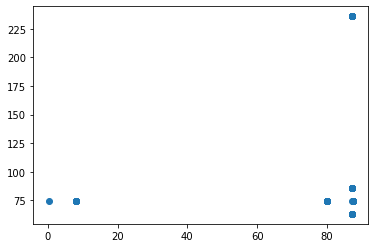

t+1 vs t-518


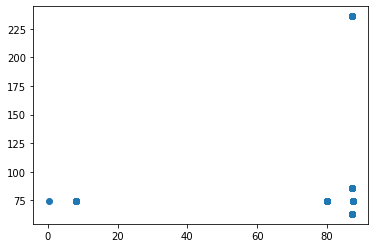

t+1 vs t-519


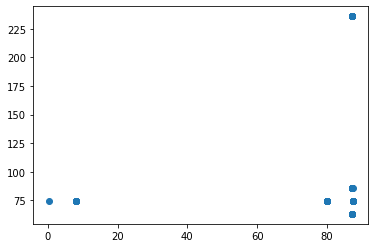

t+1 vs t-520


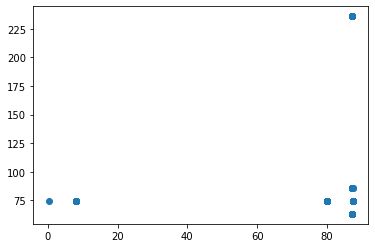

t+1 vs t-521


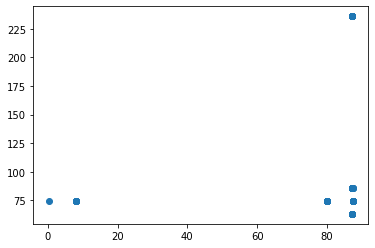

t+1 vs t-522


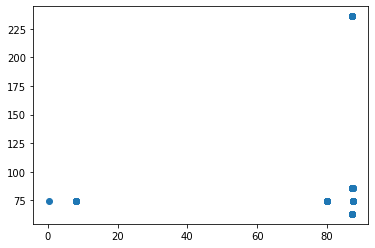

t+1 vs t-523


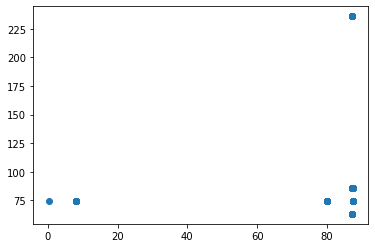

t+1 vs t-524


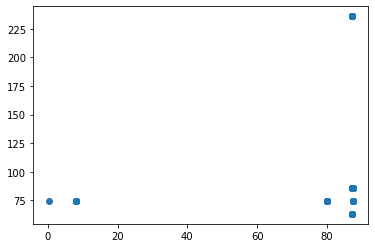

t+1 vs t-525


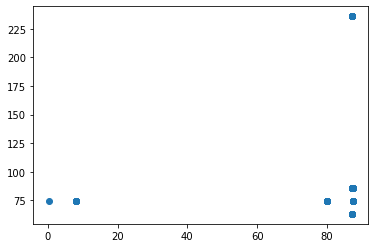

t+1 vs t-526


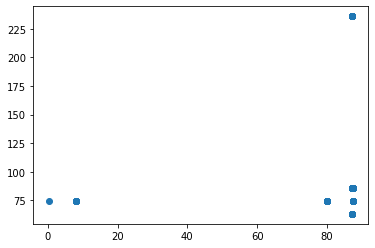

t+1 vs t-527


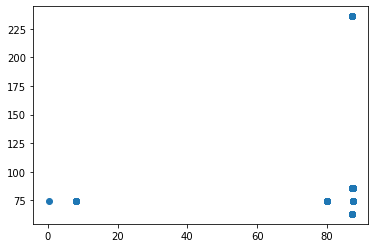

t+1 vs t-528


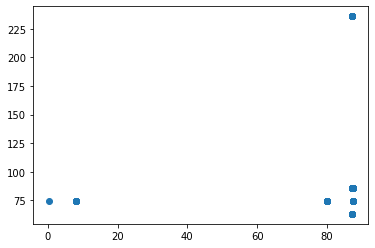

t+1 vs t-529


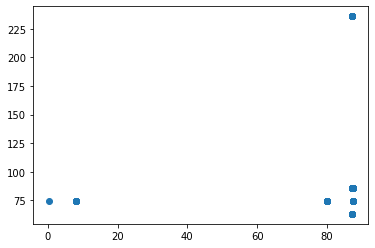

t+1 vs t-530


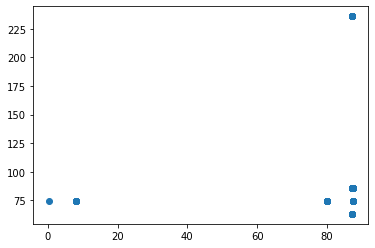

t+1 vs t-531


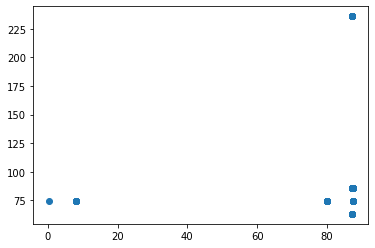

t+1 vs t-532


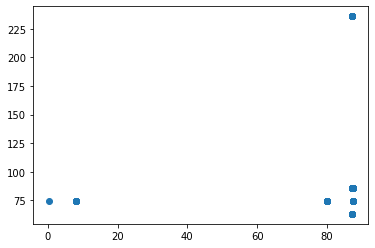

t+1 vs t-533


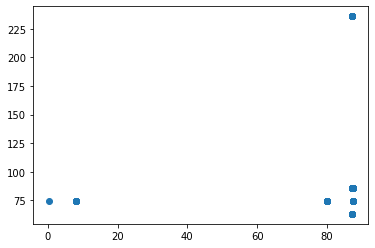

t+1 vs t-534


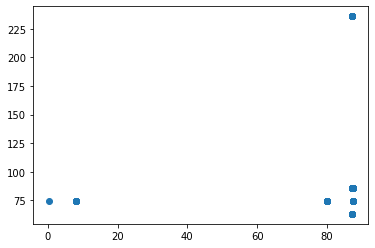

t+1 vs t-535


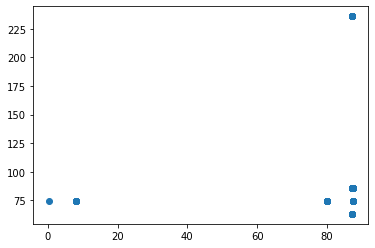

t+1 vs t-536


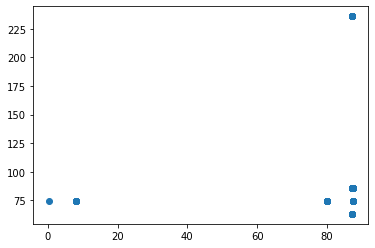

t+1 vs t-537


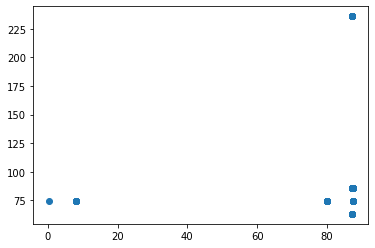

t+1 vs t-538


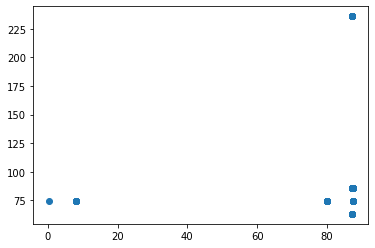

t+1 vs t-539


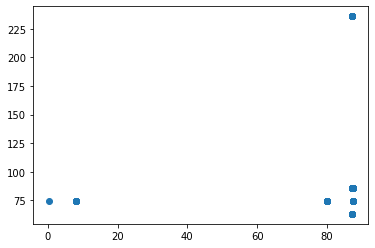

t+1 vs t-540


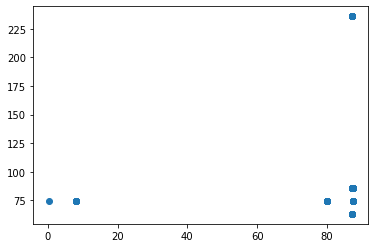

t+1 vs t-541


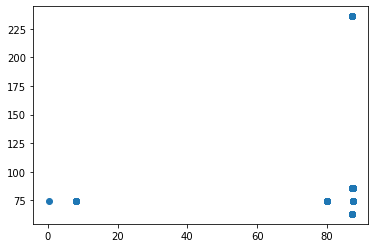

t+1 vs t-542


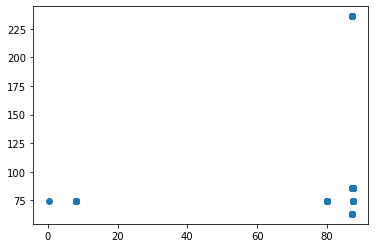

t+1 vs t-543


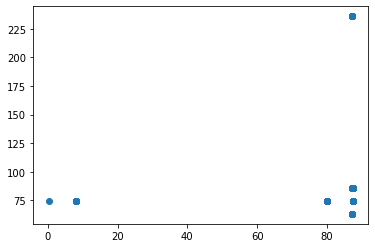

t+1 vs t-544


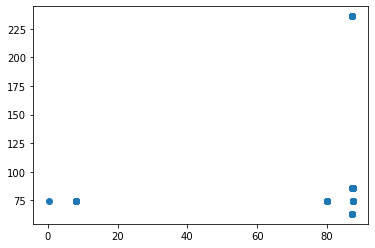

t+1 vs t-545


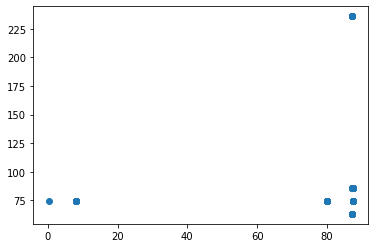

t+1 vs t-546


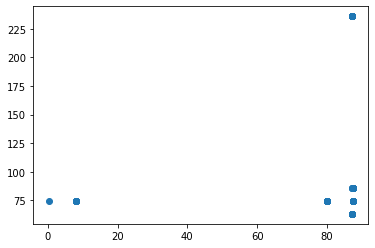

t+1 vs t-547


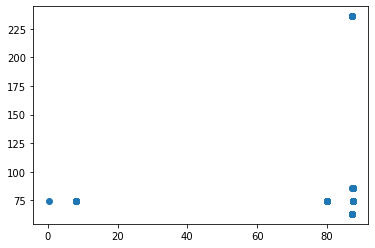

t+1 vs t-548


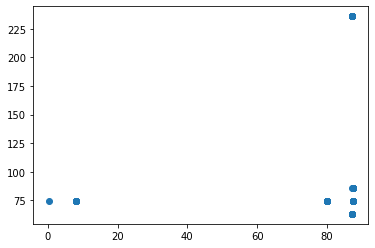

t+1 vs t-549


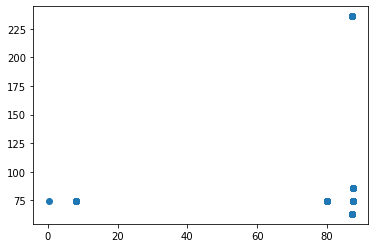

t+1 vs t-550


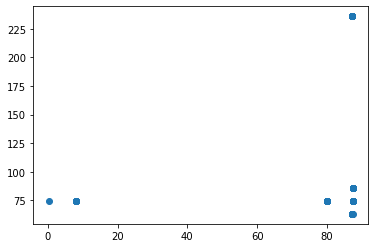

t+1 vs t-551


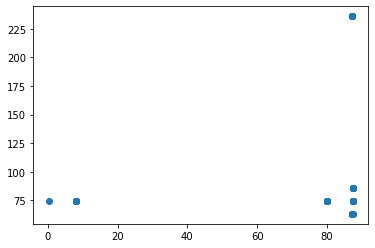

t+1 vs t-552


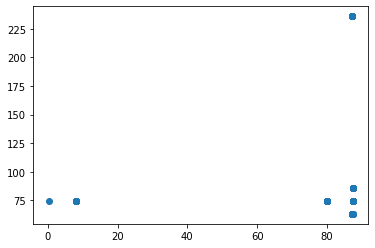

t+1 vs t-553


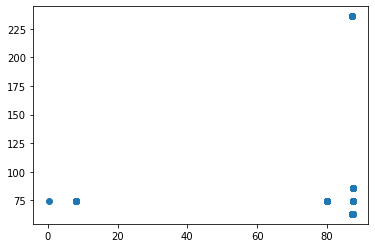

t+1 vs t-554


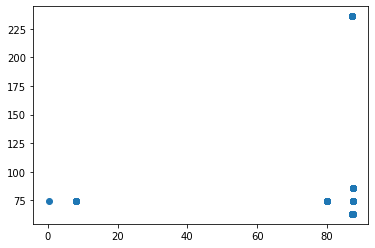

t+1 vs t-555


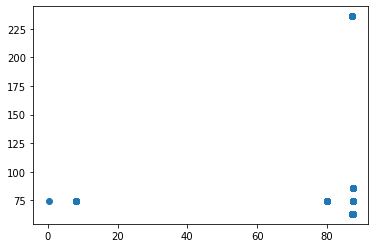

t+1 vs t-556


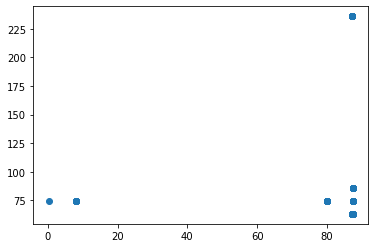

t+1 vs t-557


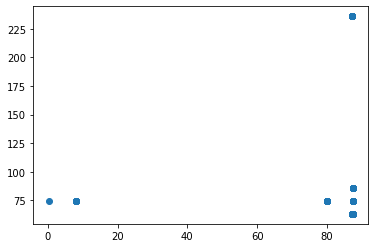

t+1 vs t-558


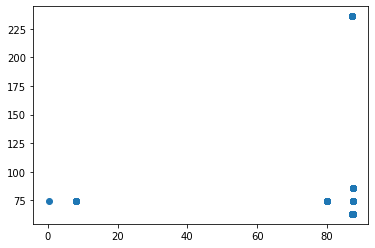

t+1 vs t-559


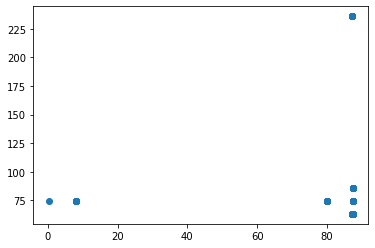

t+1 vs t-560


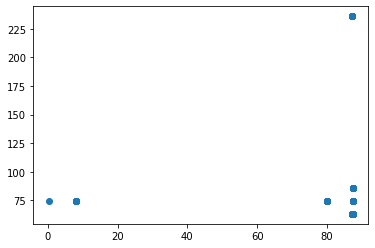

t+1 vs t-561


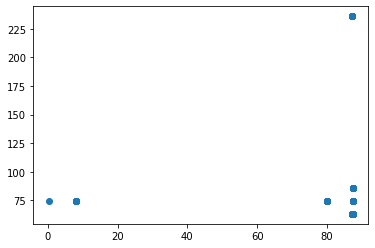

t+1 vs t-562


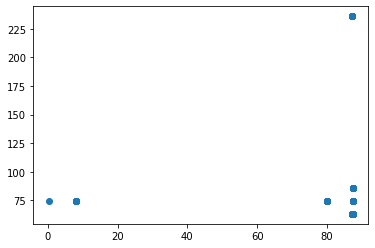

t+1 vs t-563


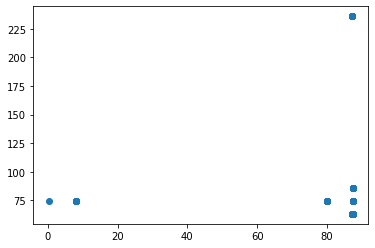

t+1 vs t-564


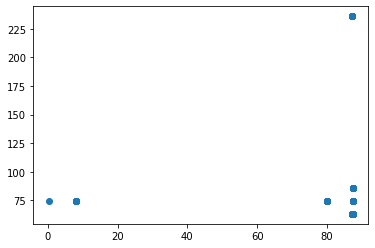

t+1 vs t-565


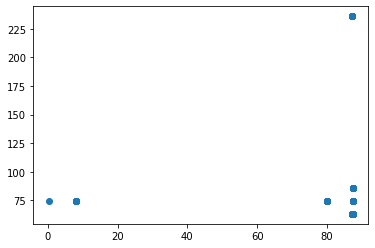

t+1 vs t-566


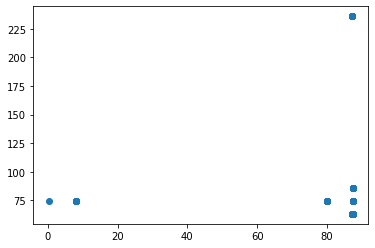

t+1 vs t-567


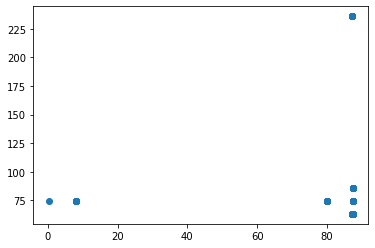

t+1 vs t-568


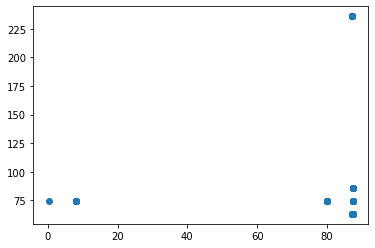

t+1 vs t-569


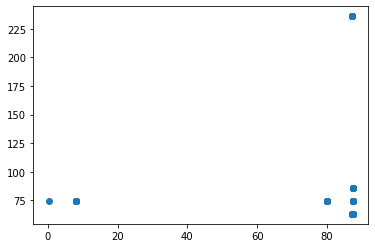

t+1 vs t-570


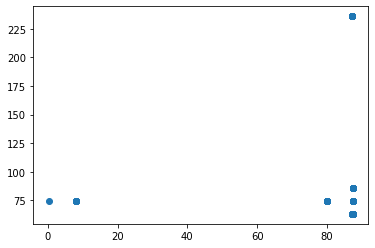

t+1 vs t-571


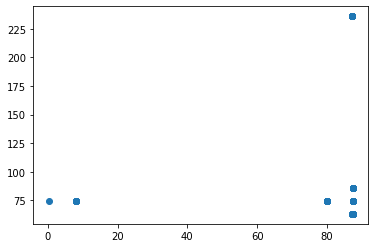

t+1 vs t-572


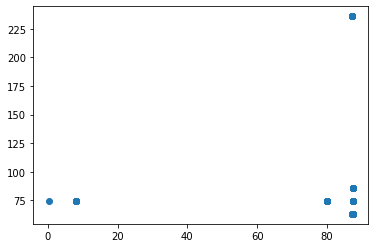

t+1 vs t-573


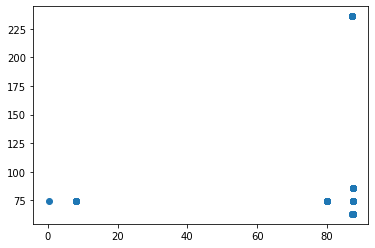

t+1 vs t-574


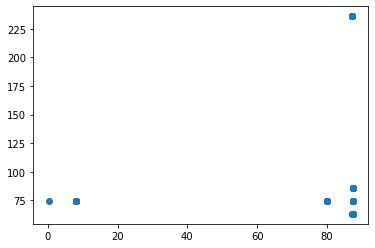

t+1 vs t-575


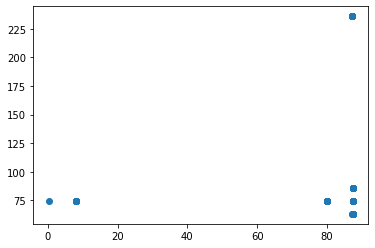

t+1 vs t-576


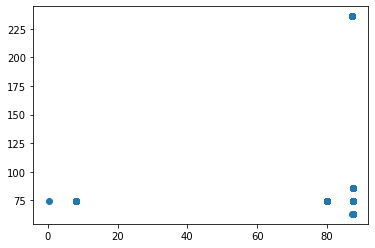

t+1 vs t-577


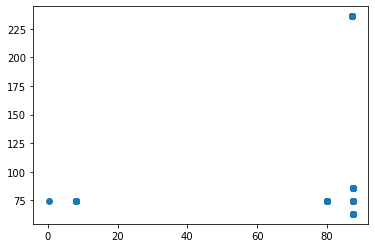

t+1 vs t-578


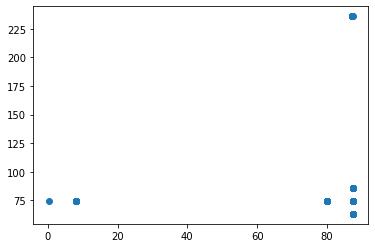

t+1 vs t-579


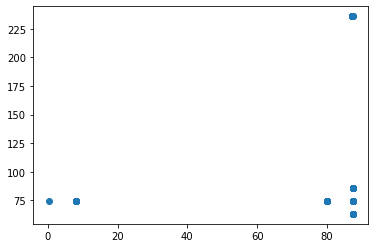

t+1 vs t-580


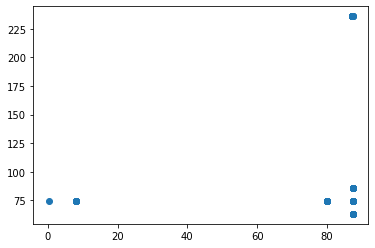

t+1 vs t-581


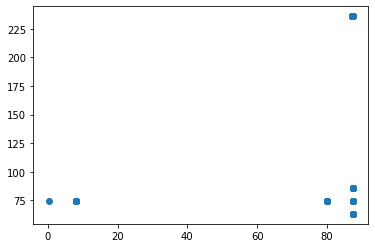

t+1 vs t-582


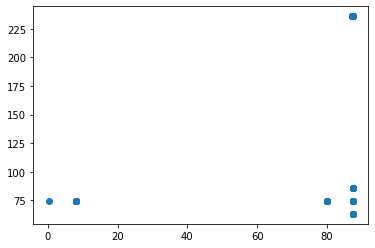

t+1 vs t-583


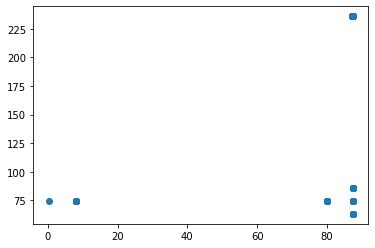

t+1 vs t-584


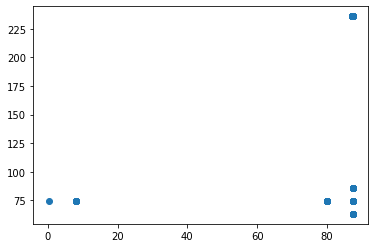

t+1 vs t-585


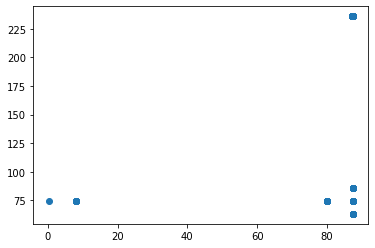

t+1 vs t-586


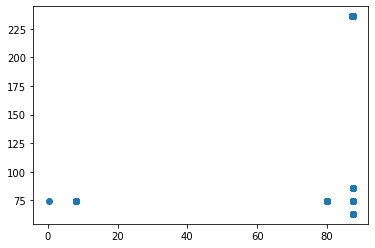

t+1 vs t-587


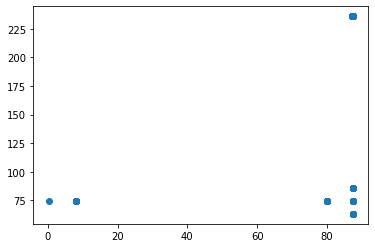

t+1 vs t-588


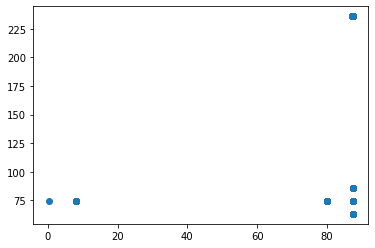

t+1 vs t-589


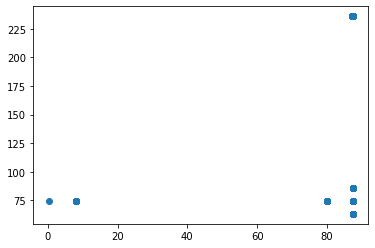

t+1 vs t-590


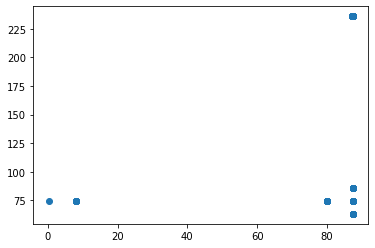

t+1 vs t-591


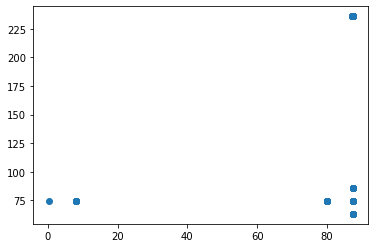

t+1 vs t-592


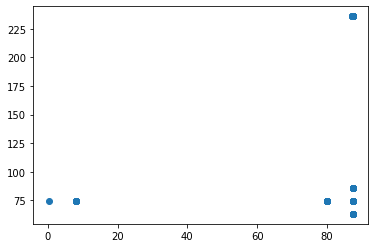

t+1 vs t-593


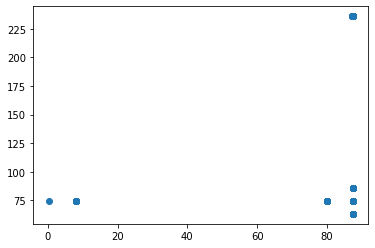

t+1 vs t-594


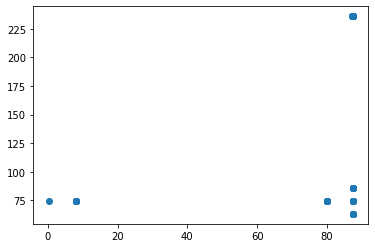

t+1 vs t-595


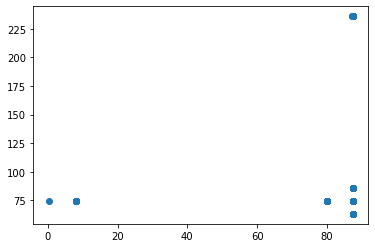

t+1 vs t-596


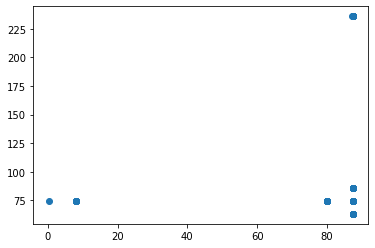

t+1 vs t-597


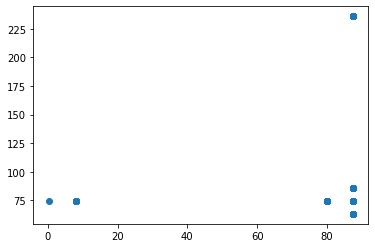

t+1 vs t-598


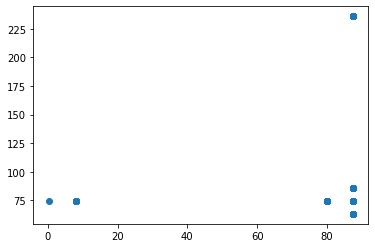

t+1 vs t-599


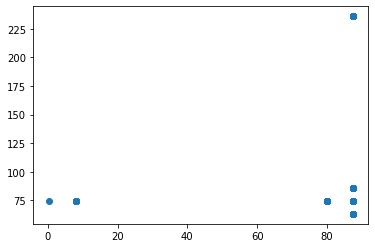

t+1 vs t-600


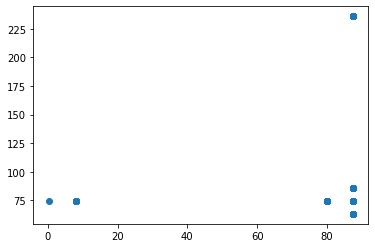

t+1 vs t-601


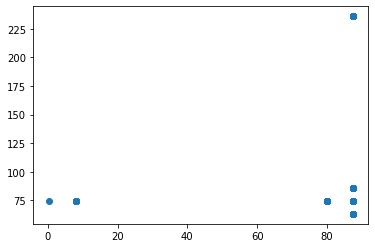

t+1 vs t-602


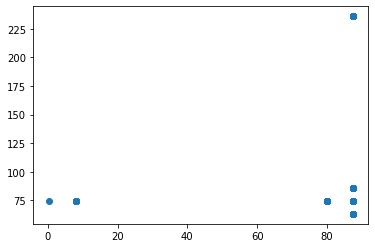

t+1 vs t-603


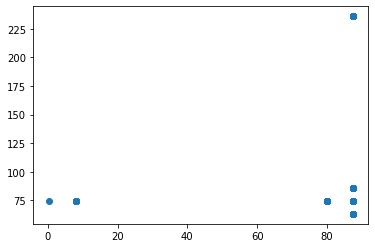

t+1 vs t-604


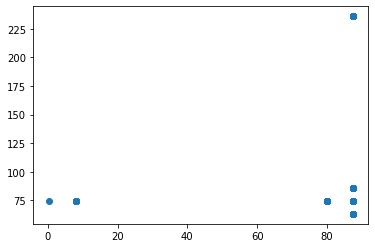

t+1 vs t-605


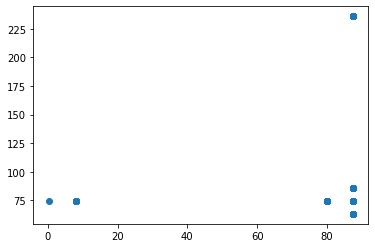

t+1 vs t-606


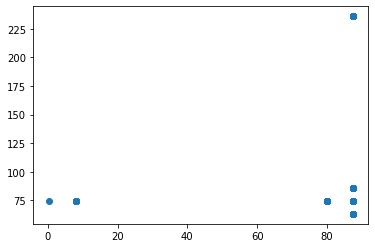

t+1 vs t-607


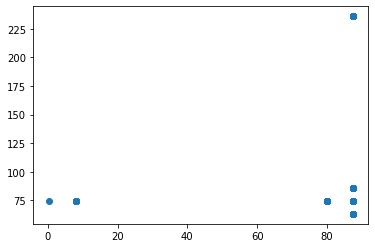

t+1 vs t-608


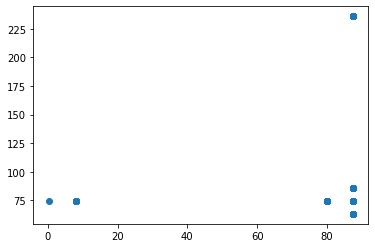

t+1 vs t-609


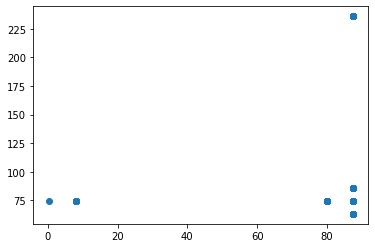

t+1 vs t-610


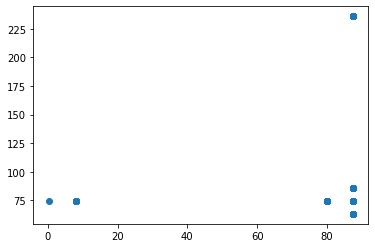

t+1 vs t-611


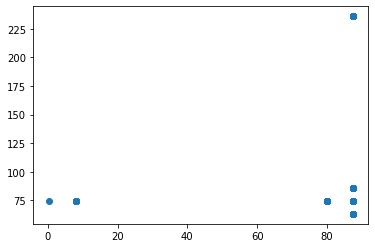

t+1 vs t-612


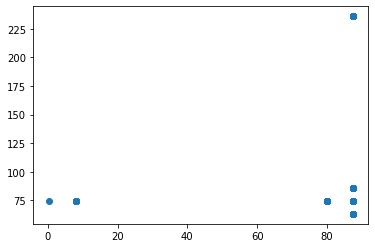

t+1 vs t-613


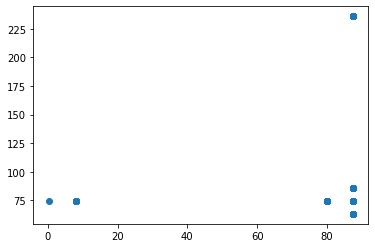

t+1 vs t-614


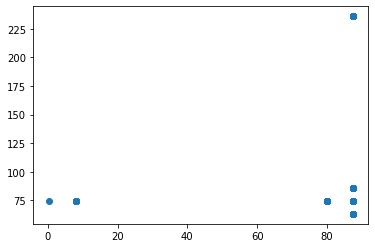

t+1 vs t-615


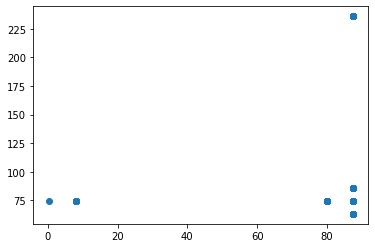

t+1 vs t-616


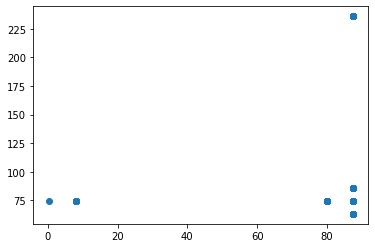

t+1 vs t-617


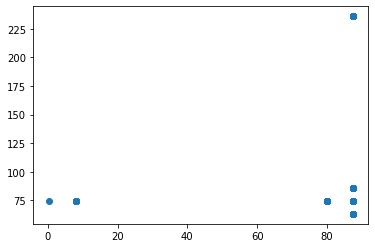

t+1 vs t-618


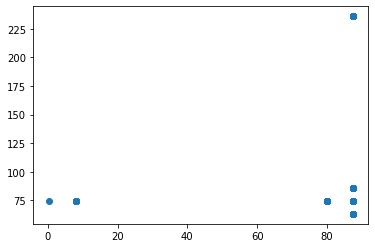

t+1 vs t-619


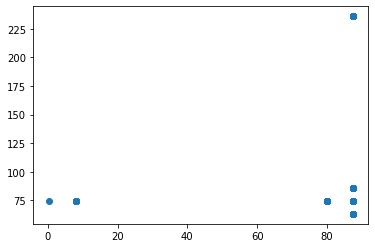

t+1 vs t-620


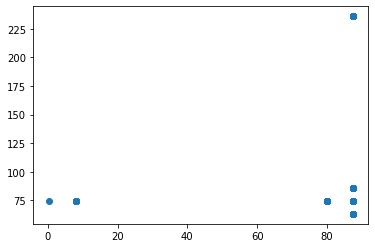

t+1 vs t-621


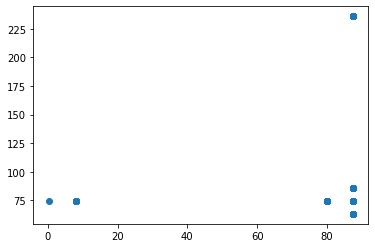

t+1 vs t-622


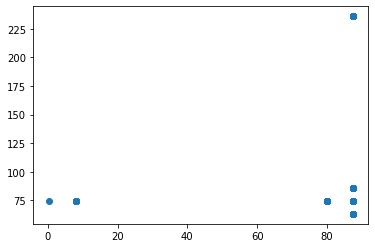

t+1 vs t-623


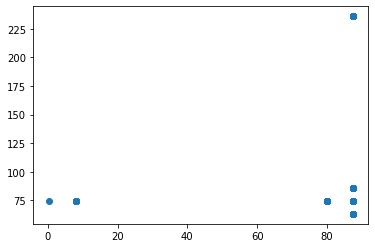

t+1 vs t-624


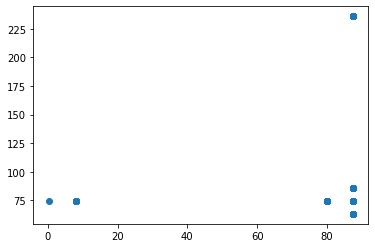

t+1 vs t-625


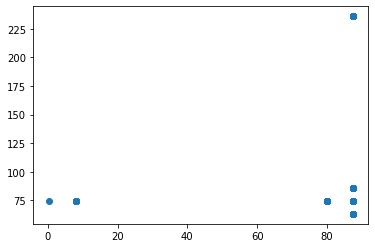

t+1 vs t-626


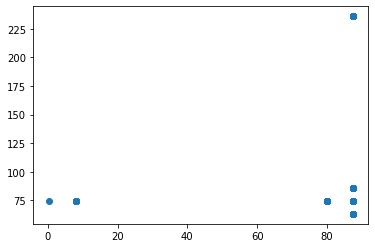

t+1 vs t-627


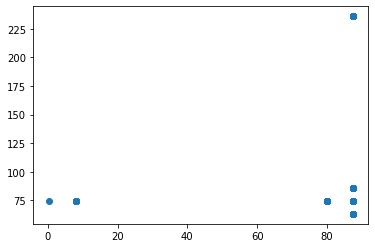

t+1 vs t-628


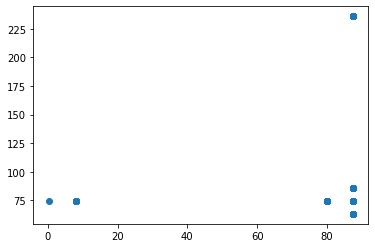

t+1 vs t-629


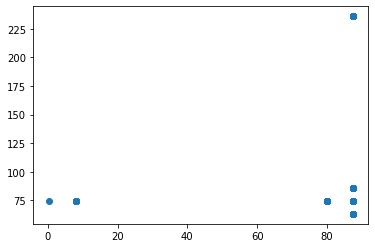

t+1 vs t-630


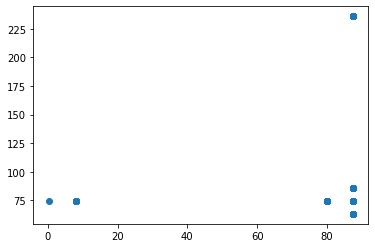

t+1 vs t-631


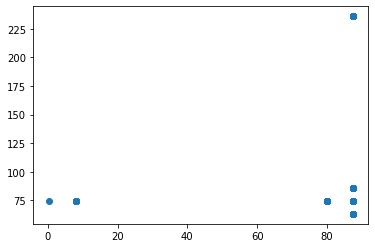

t+1 vs t-632


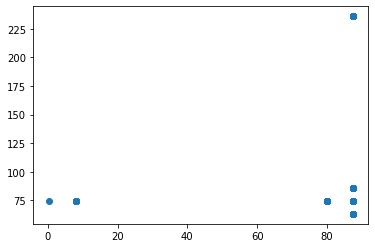

t+1 vs t-633


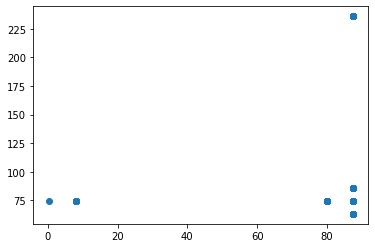

t+1 vs t-634


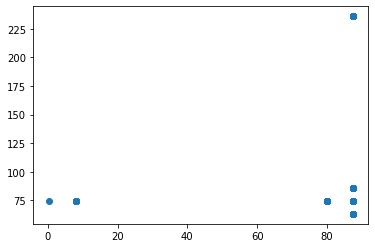

t+1 vs t-635


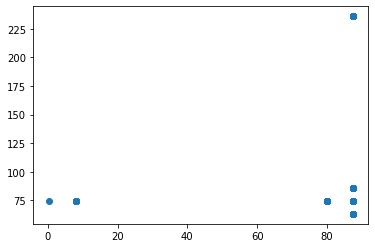

t+1 vs t-636


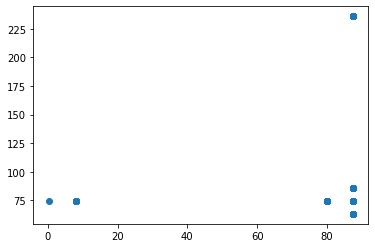

t+1 vs t-637


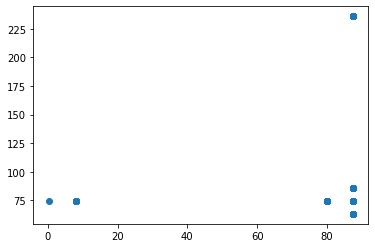

t+1 vs t-638


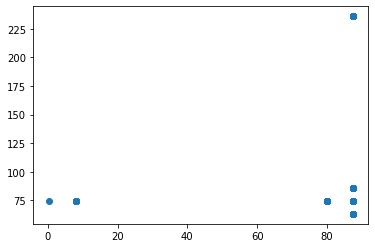

t+1 vs t-639


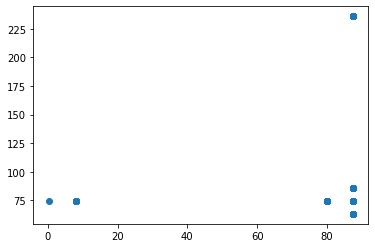

t+1 vs t-640


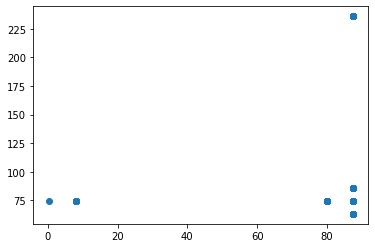

t+1 vs t-641


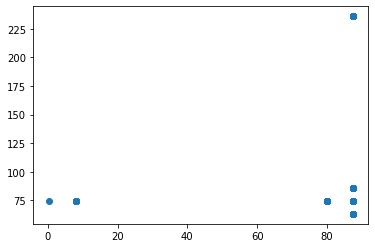

t+1 vs t-642


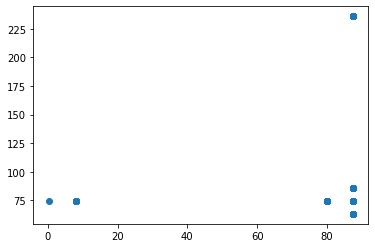

t+1 vs t-643


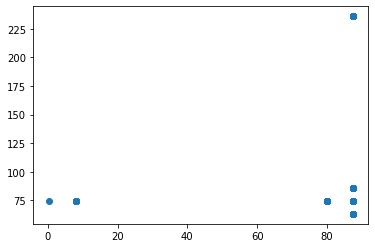

t+1 vs t-644


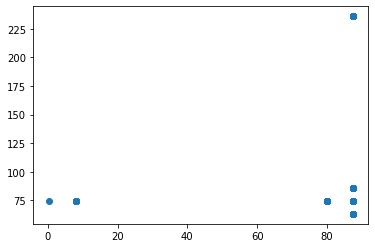

t+1 vs t-645


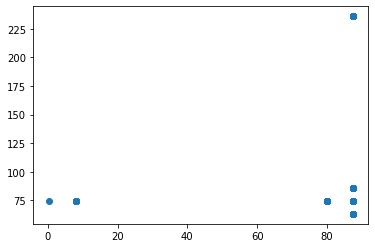

t+1 vs t-646


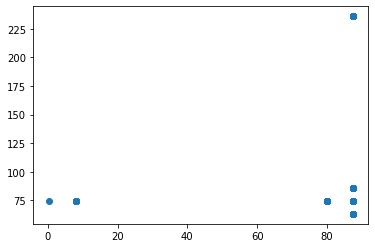

t+1 vs t-647


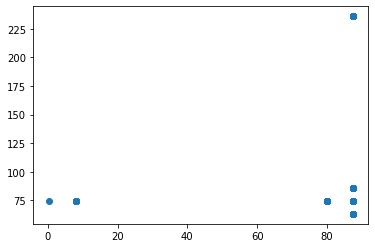

t+1 vs t-648


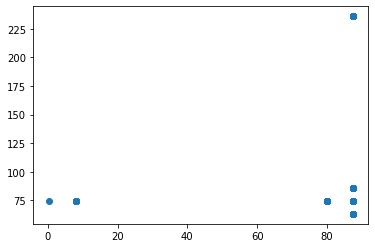

t+1 vs t-649


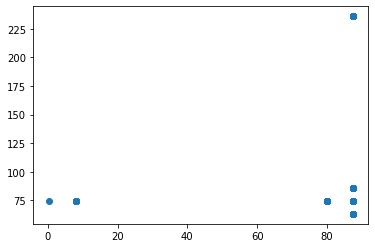

t+1 vs t-650


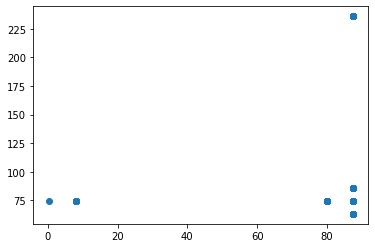

t+1 vs t-651


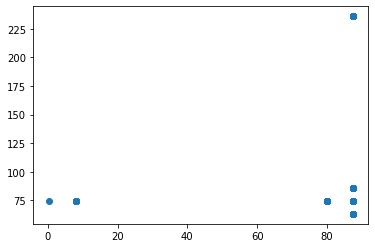

t+1 vs t-652


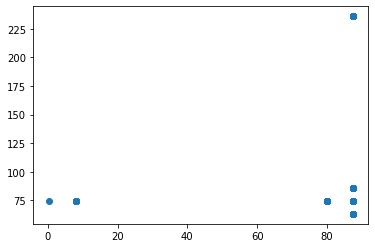

t+1 vs t-653


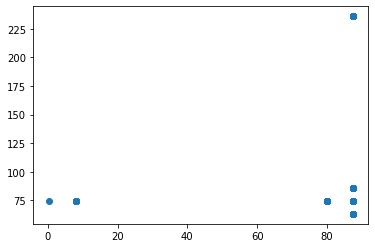

t+1 vs t-654


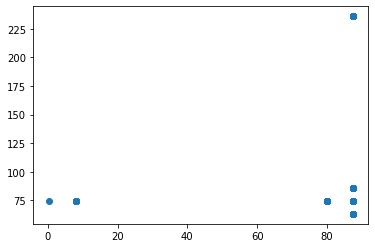

t+1 vs t-655


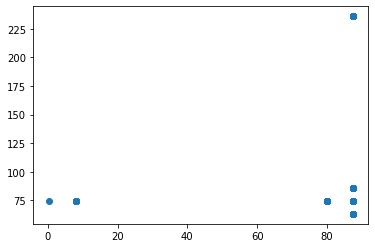

t+1 vs t-656


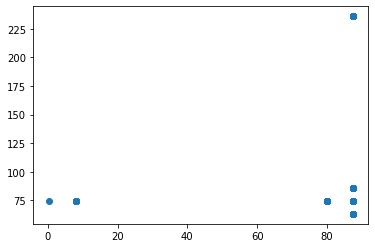

t+1 vs t-657


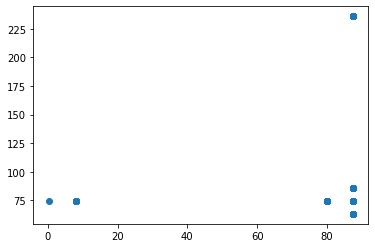

t+1 vs t-658


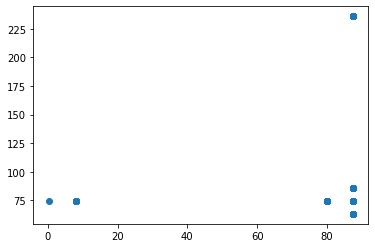

t+1 vs t-659


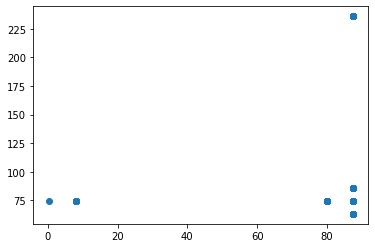

t+1 vs t-660


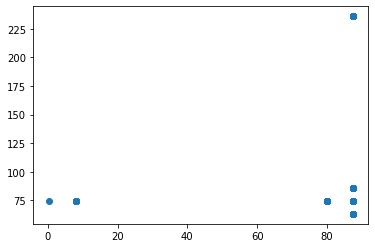

t+1 vs t-661


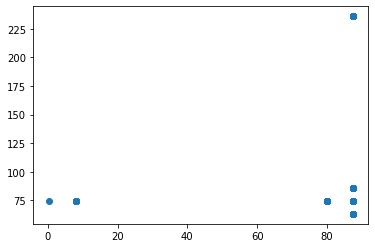

t+1 vs t-662


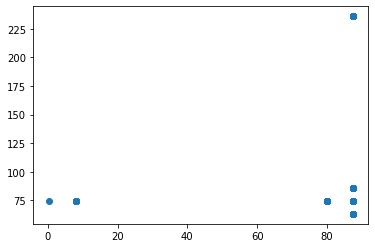

t+1 vs t-663


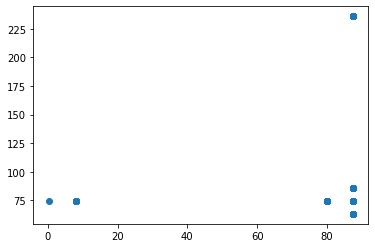

t+1 vs t-664


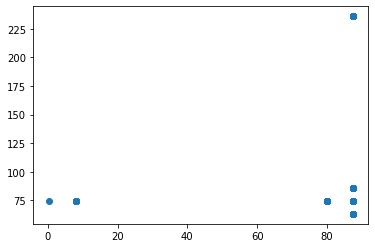

t+1 vs t-665


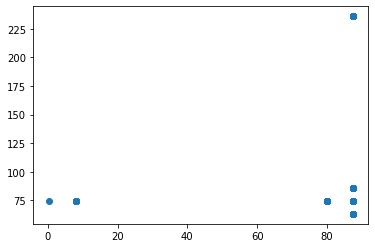

t+1 vs t-666


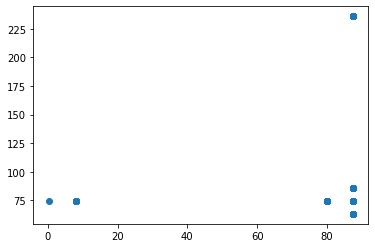

t+1 vs t-667


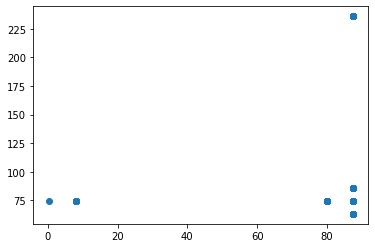

t+1 vs t-668


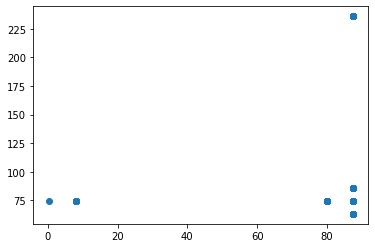

t+1 vs t-669


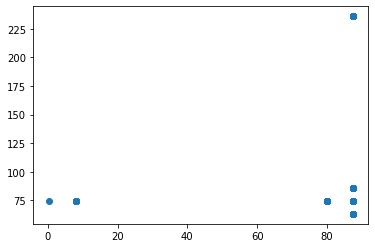

t+1 vs t-670


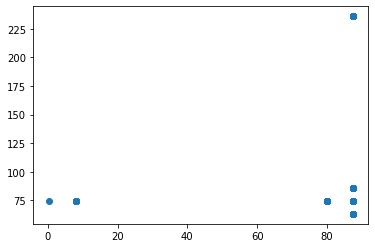

t+1 vs t-671


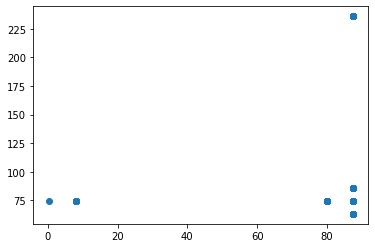

t+1 vs t-672


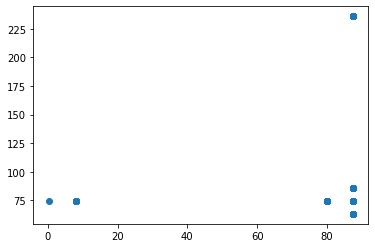

t+1 vs t-673


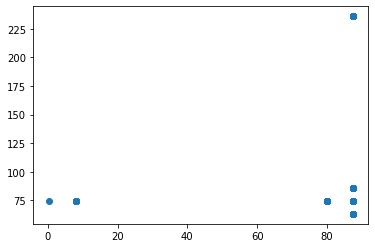

t+1 vs t-674


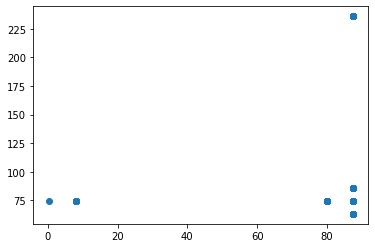

t+1 vs t-675


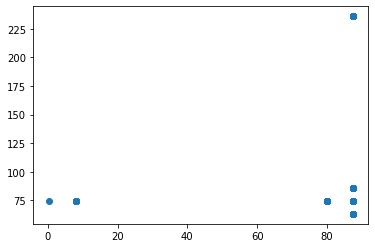

t+1 vs t-676


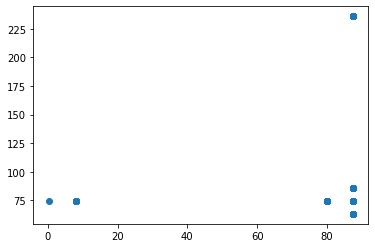

t+1 vs t-677


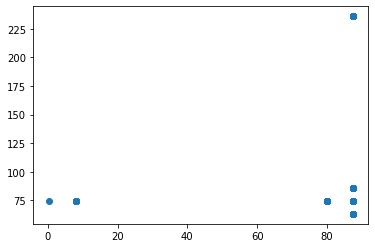

t+1 vs t-678


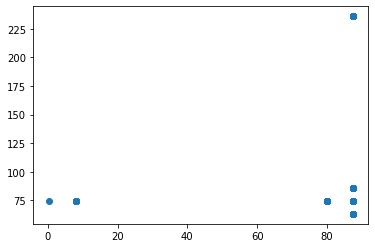

t+1 vs t-679


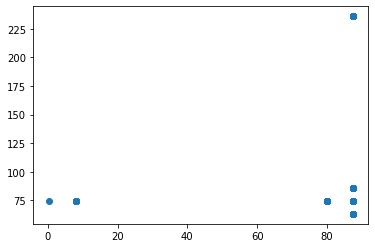

t+1 vs t-680


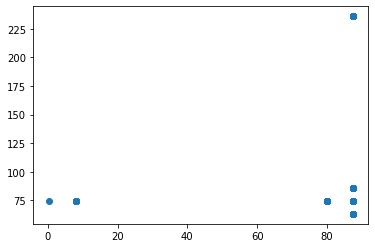

t+1 vs t-681


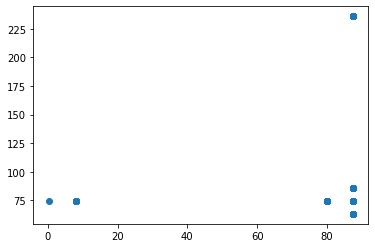

t+1 vs t-682


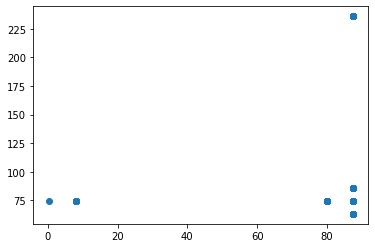

t+1 vs t-683


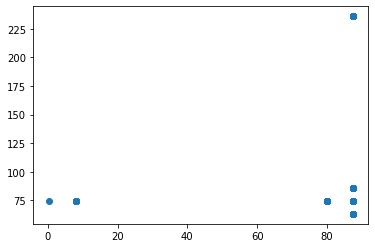

t+1 vs t-684


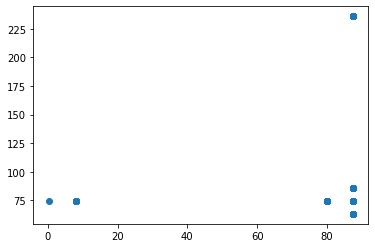

t+1 vs t-685


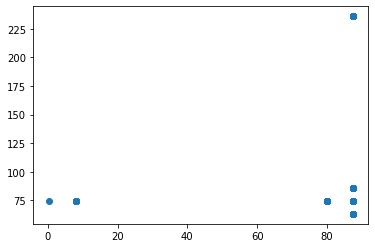

t+1 vs t-686


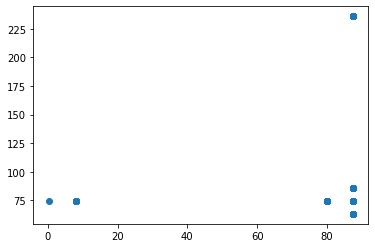

t+1 vs t-687


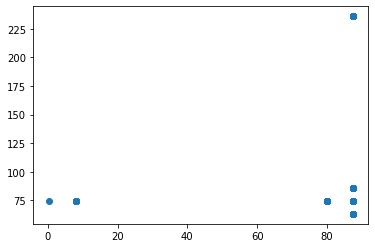

t+1 vs t-688


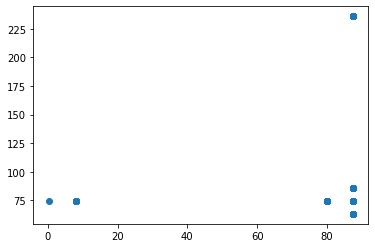

t+1 vs t-689


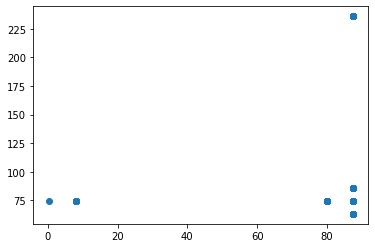

t+1 vs t-690


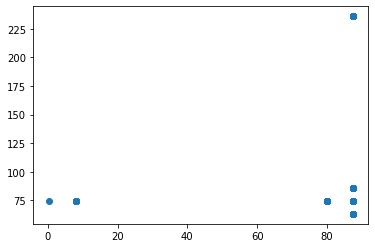

t+1 vs t-691


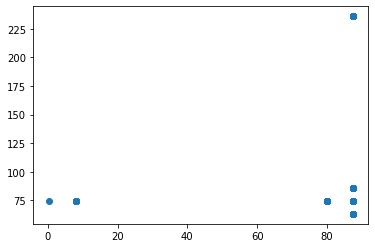

t+1 vs t-692


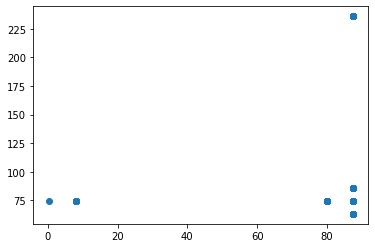

t+1 vs t-693


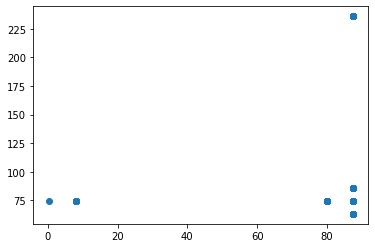

t+1 vs t-694


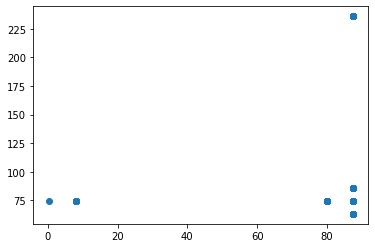

t+1 vs t-695


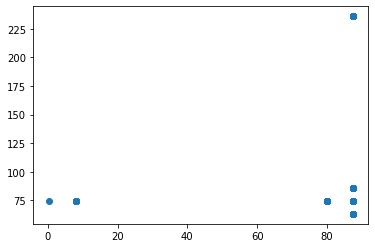

t+1 vs t-696


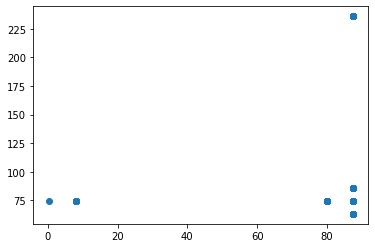

t+1 vs t-697


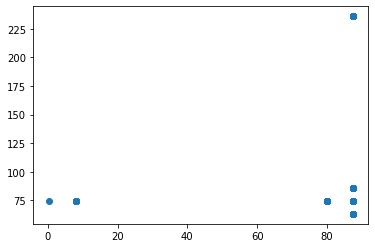

t+1 vs t-698


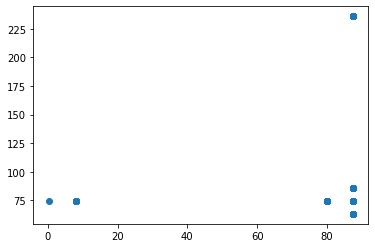

t+1 vs t-699


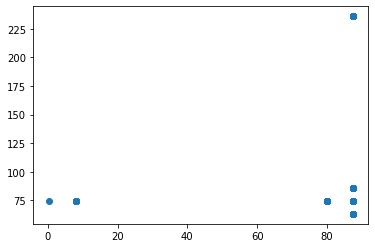

t+1 vs t-700


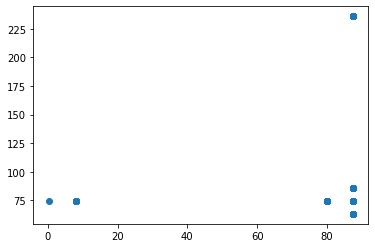

t+1 vs t-701


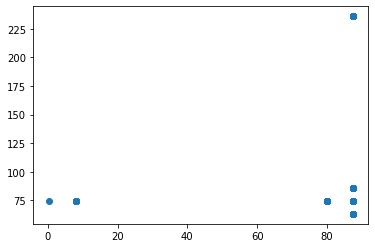

t+1 vs t-702


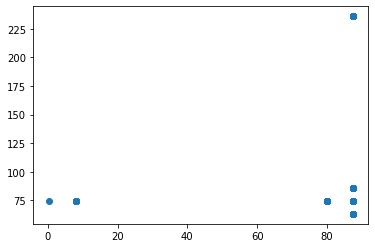

t+1 vs t-703


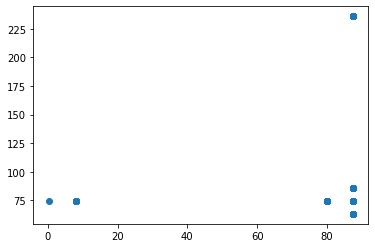

t+1 vs t-704


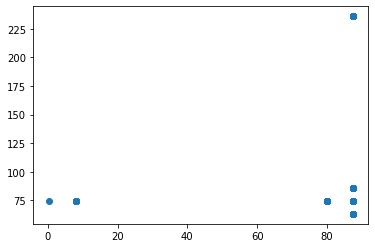

t+1 vs t-705


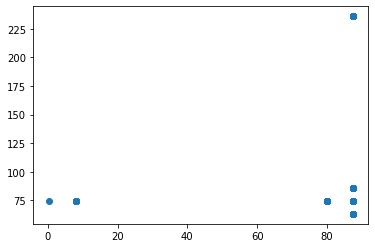

t+1 vs t-706


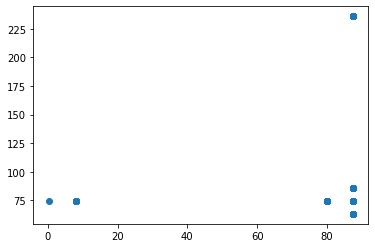

t+1 vs t-707


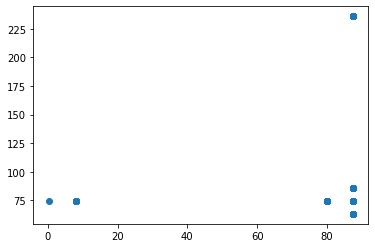

t+1 vs t-708


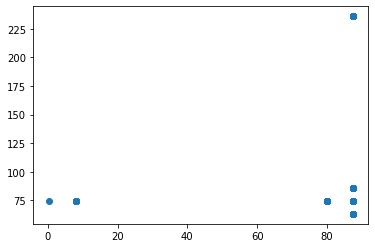

t+1 vs t-709


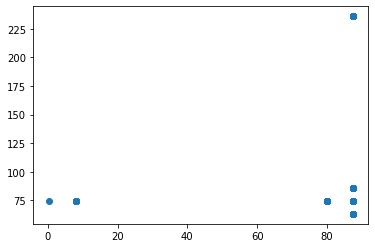

t+1 vs t-710


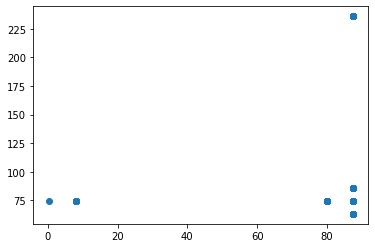

t+1 vs t-711


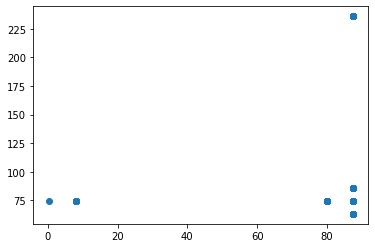

t+1 vs t-712


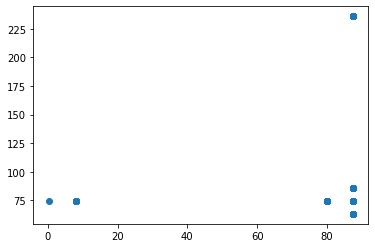

t+1 vs t-713


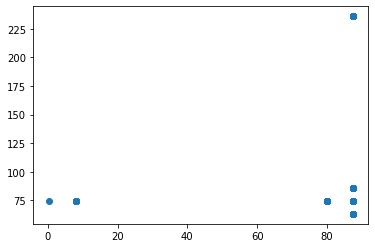

t+1 vs t-714


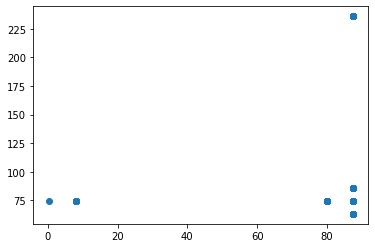

t+1 vs t-715


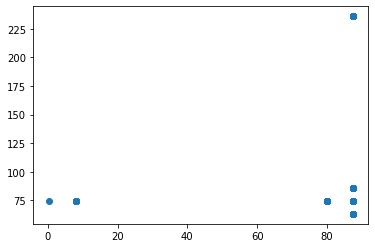

t+1 vs t-716


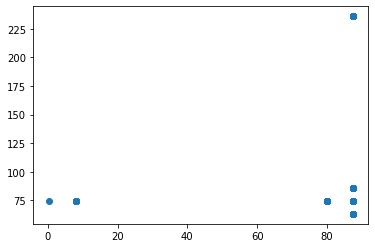

t+1 vs t-717


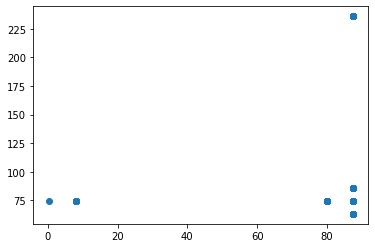

t+1 vs t-718


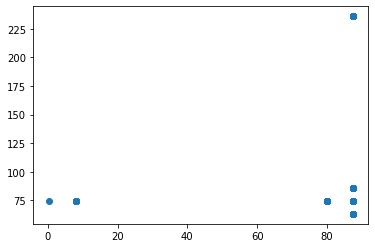

t+1 vs t-719


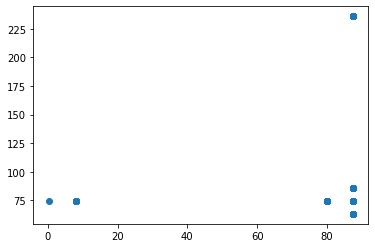

t+1 vs t-720


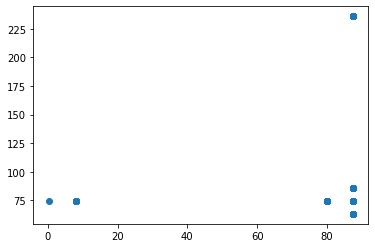

t+1 vs t-721


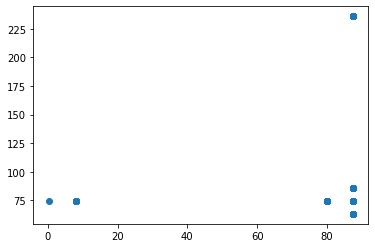

t+1 vs t-722


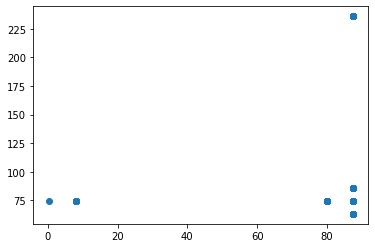

t+1 vs t-723


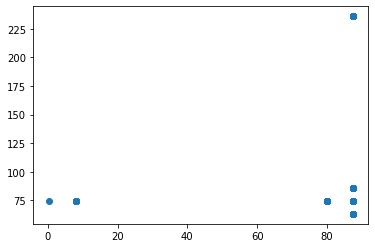

t+1 vs t-724


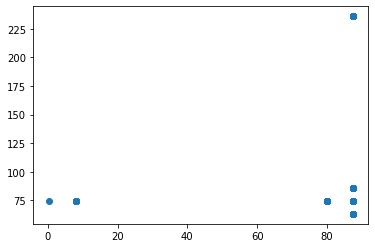

t+1 vs t-725


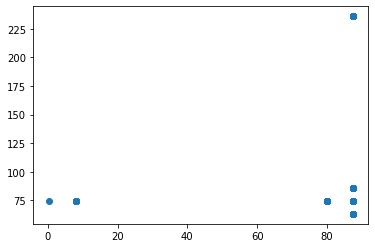

t+1 vs t-726


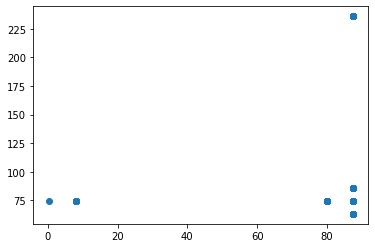

t+1 vs t-727


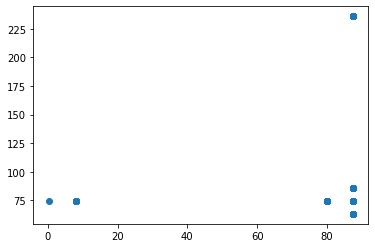

t+1 vs t-728


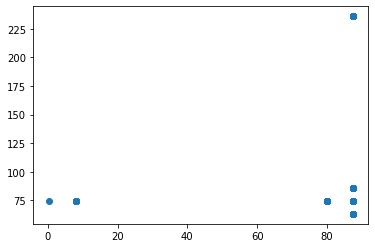

t+1 vs t-729


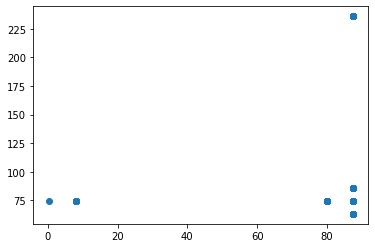

t+1 vs t-730


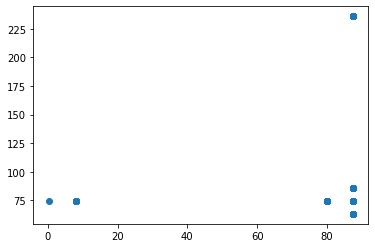

t+1 vs t-731


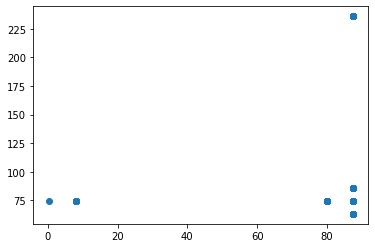

t+1 vs t-732


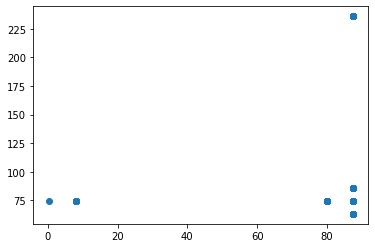

t+1 vs t-733


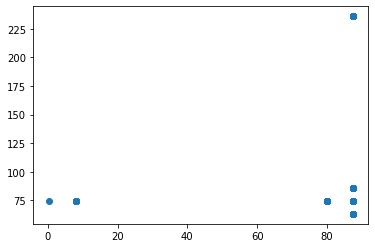

t+1 vs t-734


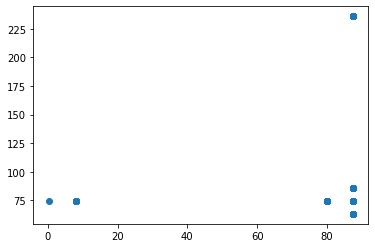

t+1 vs t-735


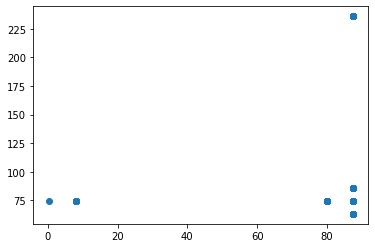

t+1 vs t-736


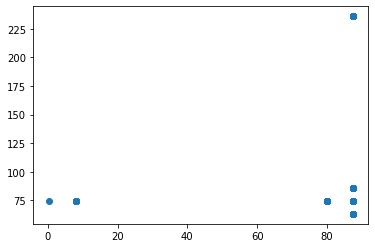

t+1 vs t-737


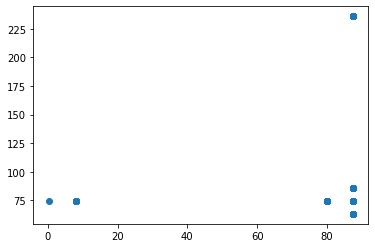

t+1 vs t-738


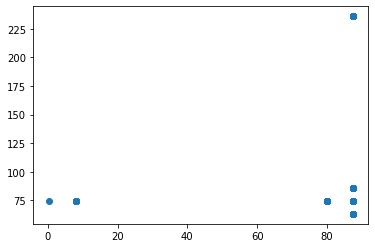

t+1 vs t-739


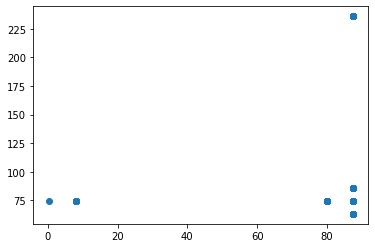

t+1 vs t-740


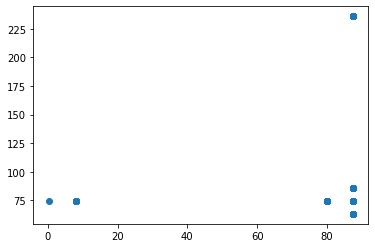

t+1 vs t-741


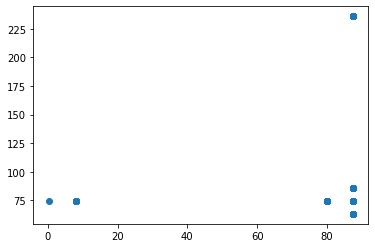

t+1 vs t-742


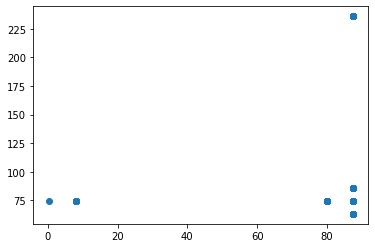

t+1 vs t-743


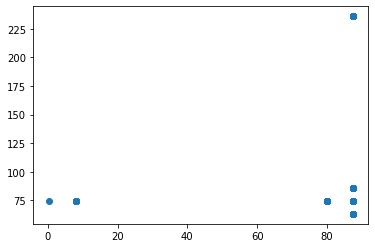

t+1 vs t-744


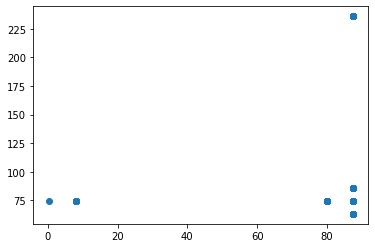

t+1 vs t-745


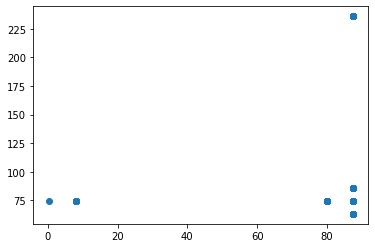

t+1 vs t-746


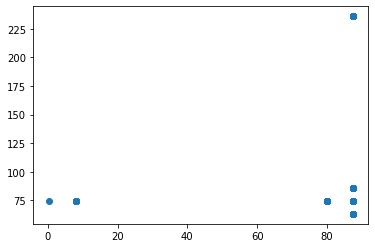

t+1 vs t-747


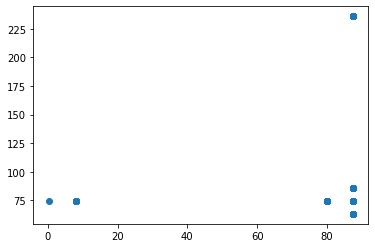

t+1 vs t-748


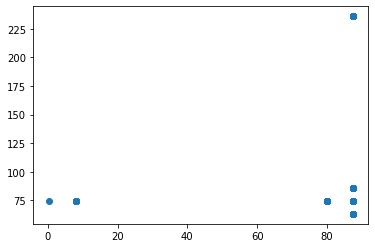

t+1 vs t-749


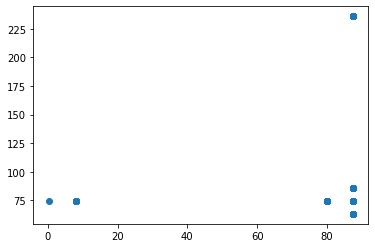

t+1 vs t-750


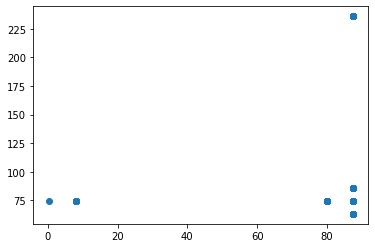

t+1 vs t-751


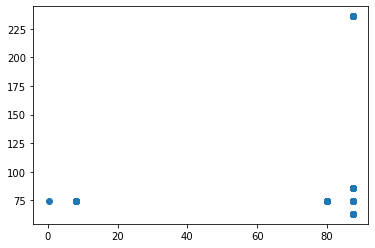

t+1 vs t-752


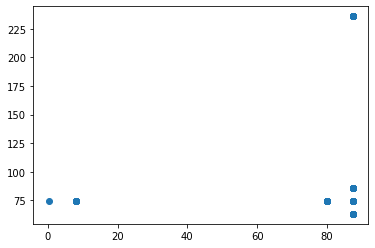

t+1 vs t-753


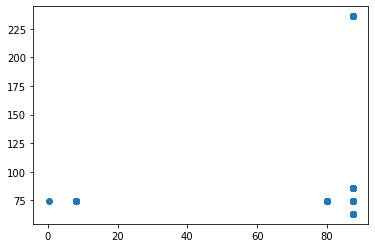

t+1 vs t-754


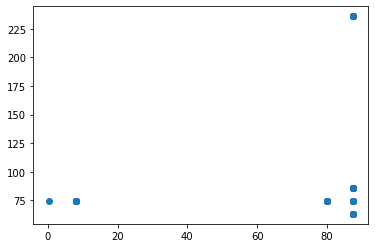

t+1 vs t-755


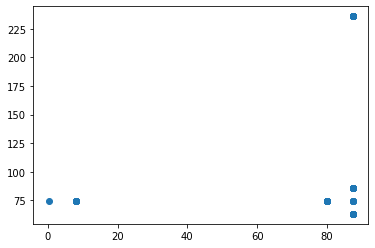

t+1 vs t-756


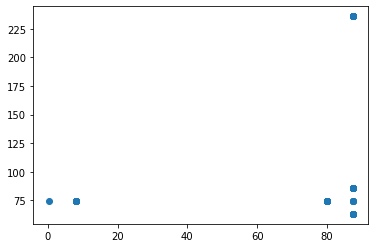

t+1 vs t-757


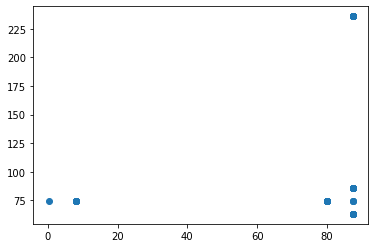

t+1 vs t-758


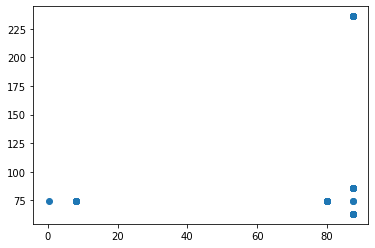

t+1 vs t-759


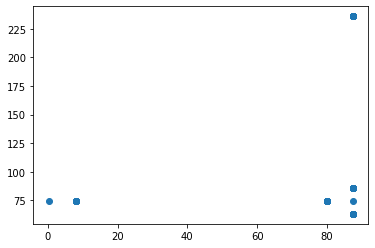

t+1 vs t-760


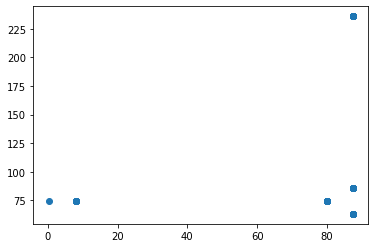

t+1 vs t-761


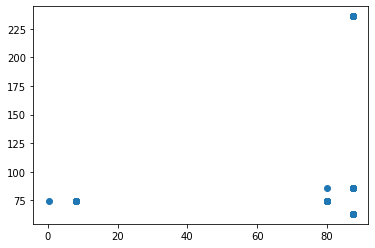

t+1 vs t-762


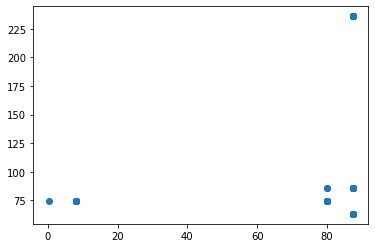

t+1 vs t-763


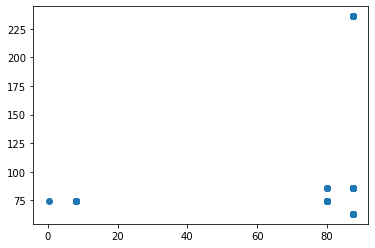

t+1 vs t-764


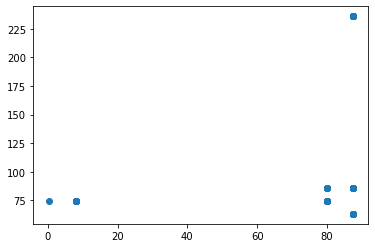

t+1 vs t-765


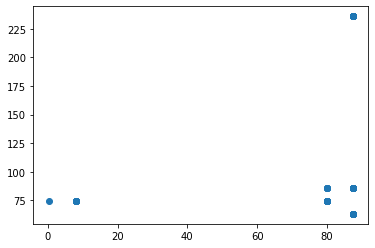

t+1 vs t-766


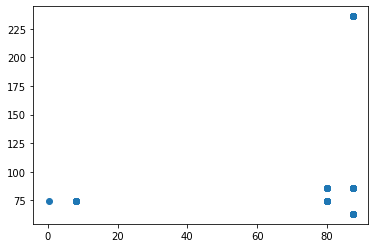

t+1 vs t-767


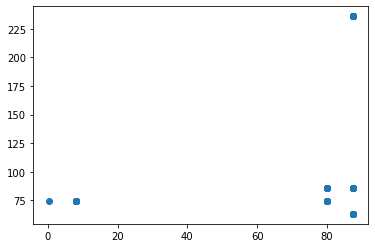

t+1 vs t-768


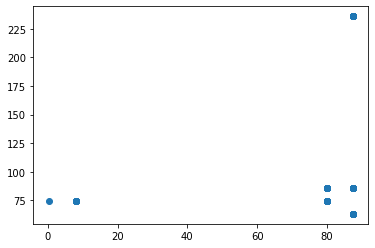

t+1 vs t-769


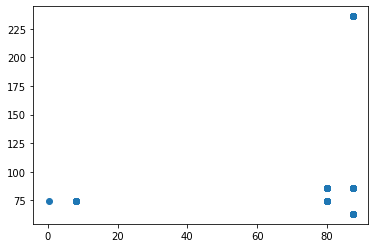

t+1 vs t-770


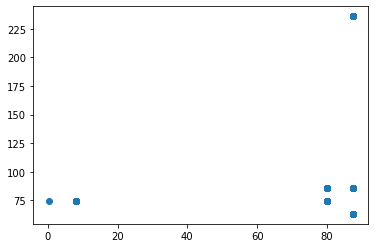

t+1 vs t-771


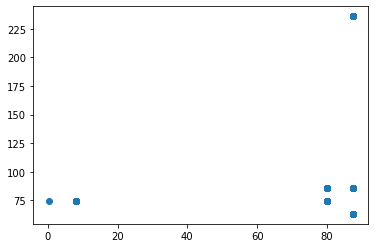

t+1 vs t-772


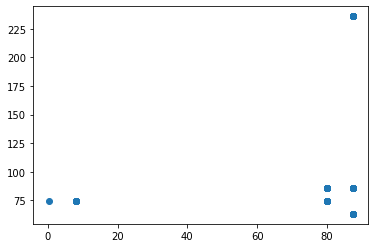

t+1 vs t-773


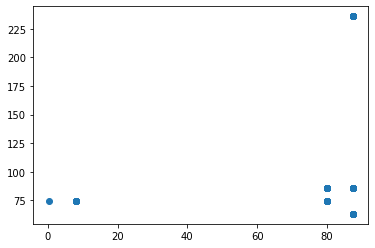

t+1 vs t-774


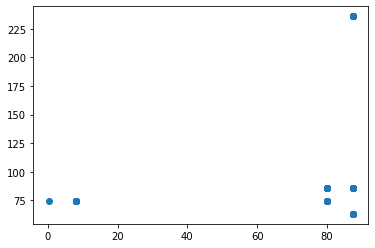

t+1 vs t-775


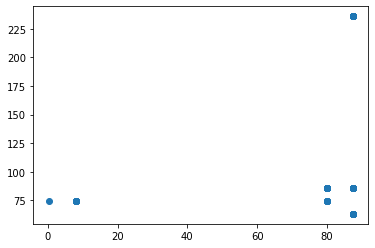

t+1 vs t-776


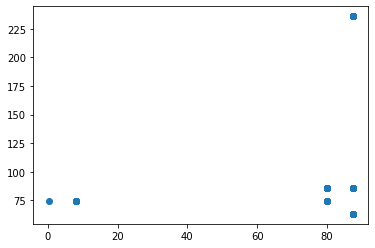

t+1 vs t-777


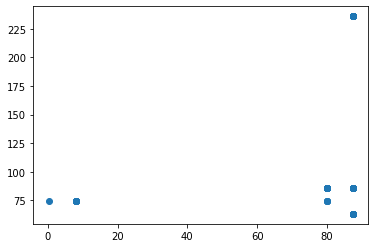

t+1 vs t-778


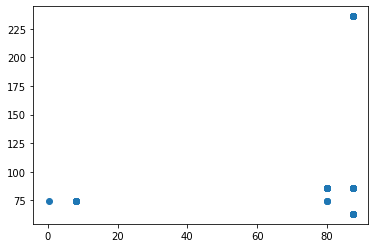

t+1 vs t-779


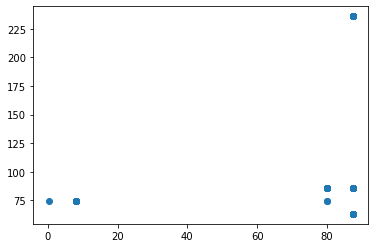

t+1 vs t-780


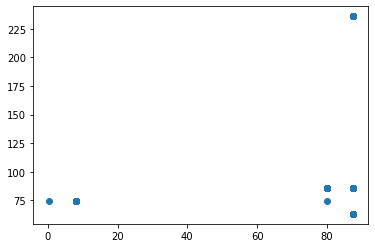

t+1 vs t-781


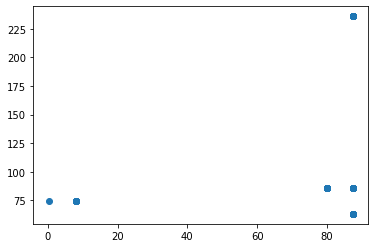

t+1 vs t-782


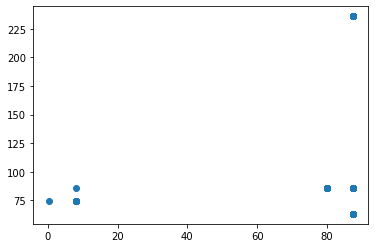

t+1 vs t-783


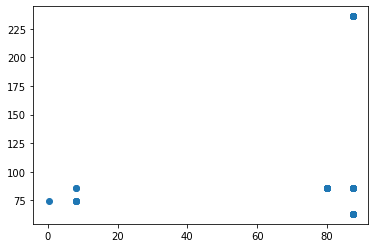

t+1 vs t-784


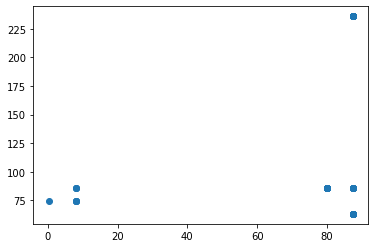

t+1 vs t-785


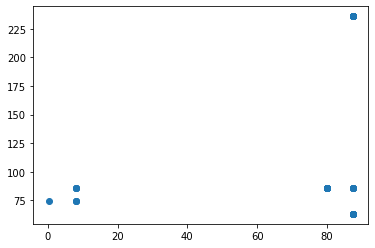

t+1 vs t-786


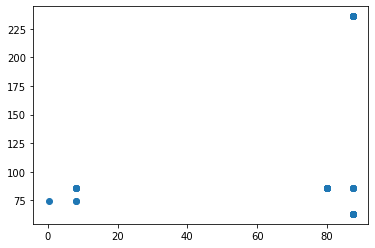

t+1 vs t-787


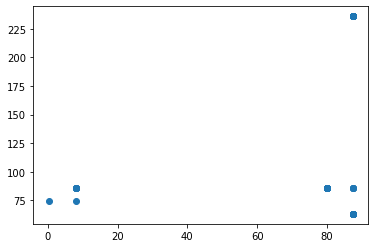

t+1 vs t-788


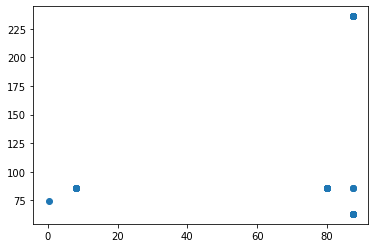

t+1 vs t-789


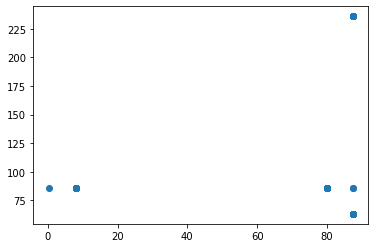

t+1 vs t-790


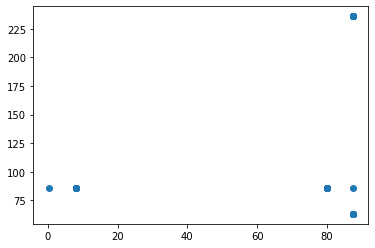

t+1 vs t-791


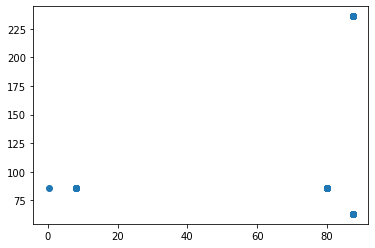

t+1 vs t-792


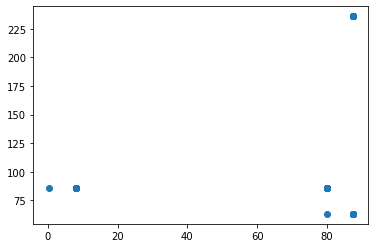

t+1 vs t-793


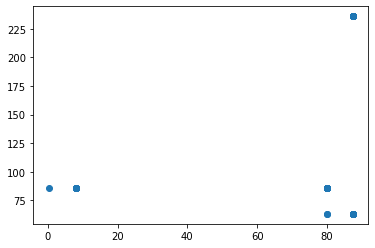

t+1 vs t-794


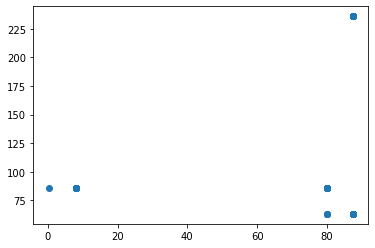

t+1 vs t-795


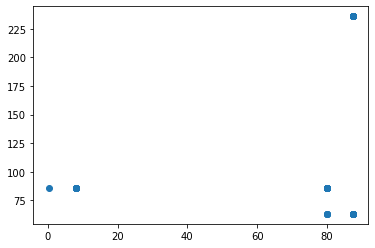

t+1 vs t-796


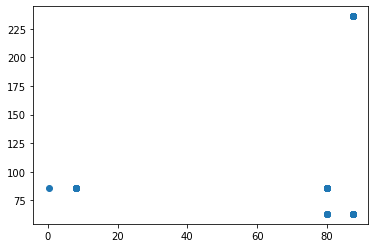

t+1 vs t-797


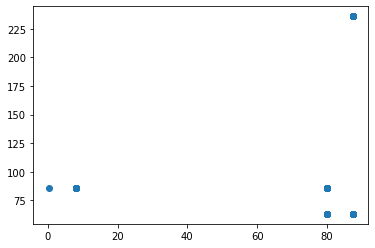

t+1 vs t-798


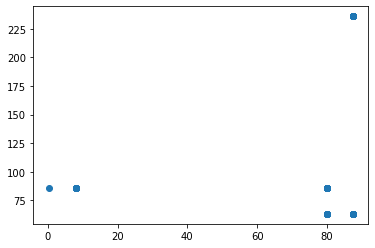

t+1 vs t-799


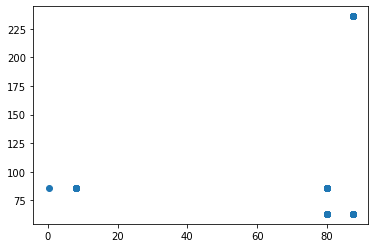

t+1 vs t-800


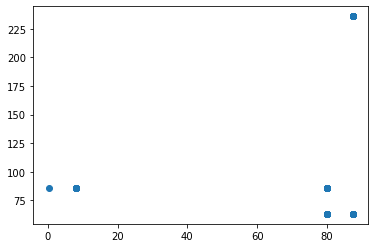

t+1 vs t-801


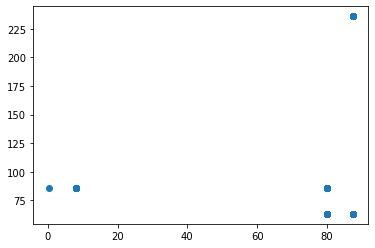

t+1 vs t-802


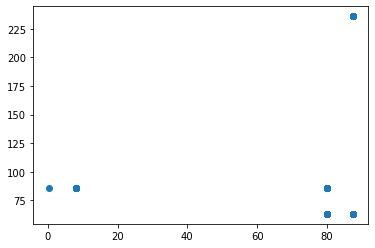

t+1 vs t-803


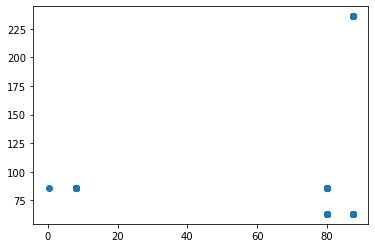

t+1 vs t-804


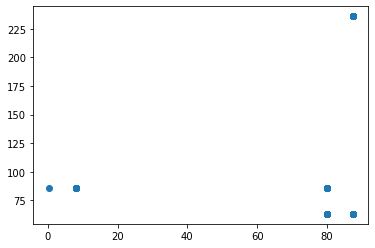

t+1 vs t-805


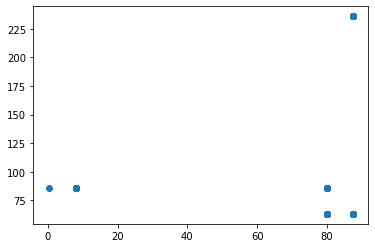

t+1 vs t-806


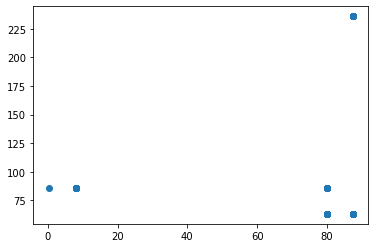

t+1 vs t-807


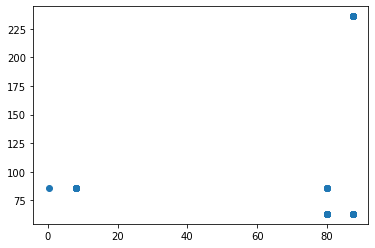

t+1 vs t-808


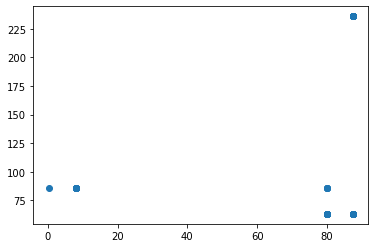

t+1 vs t-809


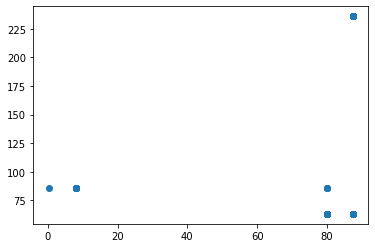

t+1 vs t-810


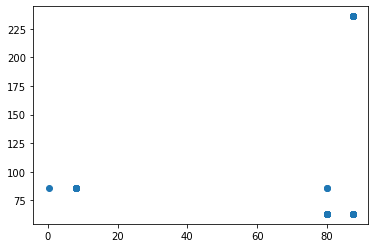

t+1 vs t-811


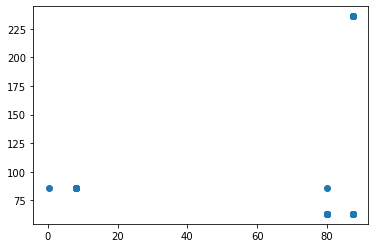

t+1 vs t-812


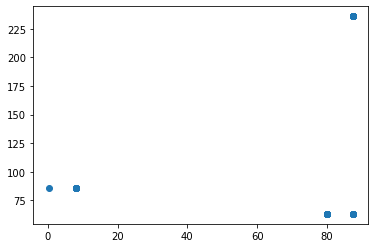

t+1 vs t-813


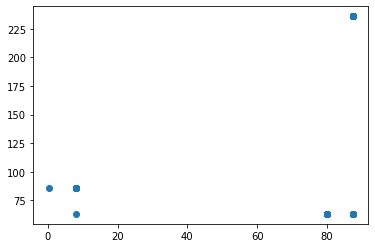

t+1 vs t-814


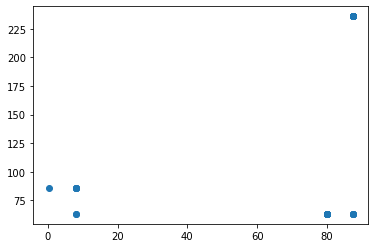

t+1 vs t-815


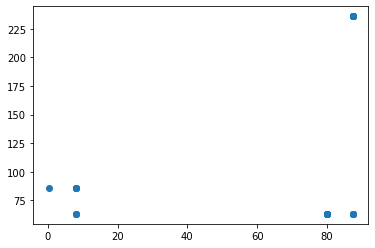

t+1 vs t-816


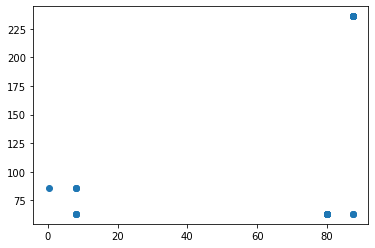

t+1 vs t-817


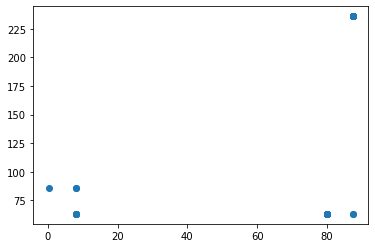

t+1 vs t-818


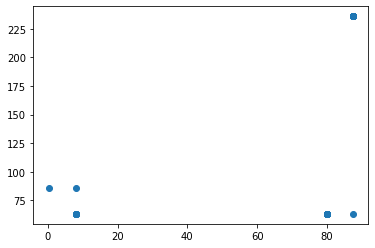

t+1 vs t-819


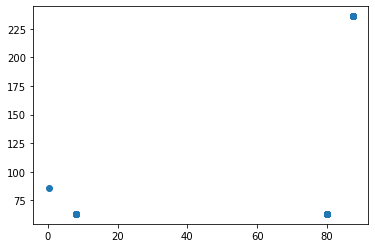

t+1 vs t-820


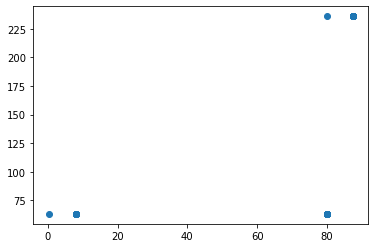

t+1 vs t-821


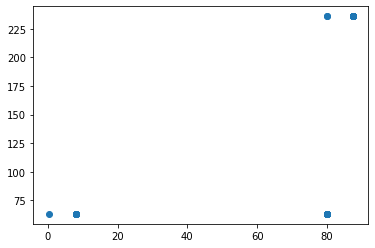

t+1 vs t-822


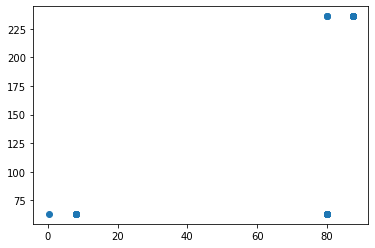

t+1 vs t-823


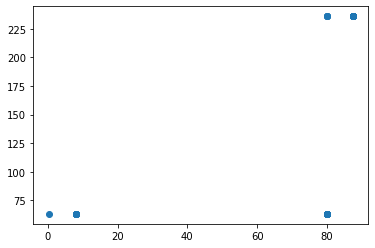

t+1 vs t-824


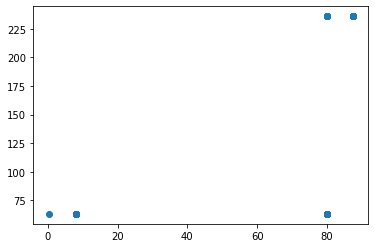

t+1 vs t-825


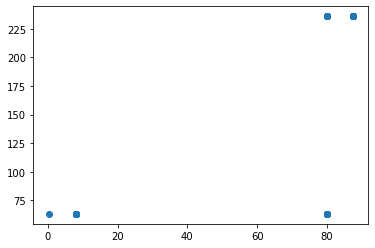

t+1 vs t-826


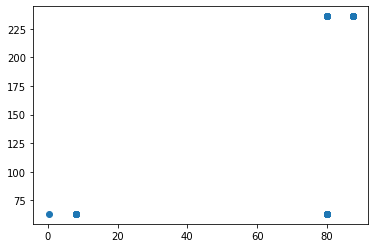

t+1 vs t-827


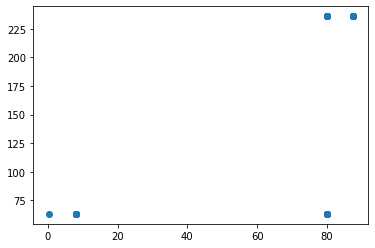

t+1 vs t-828


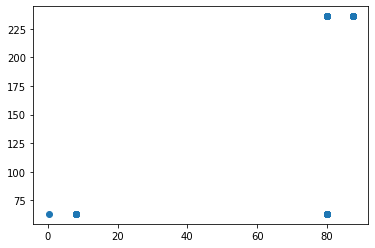

t+1 vs t-829


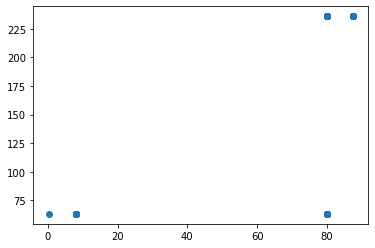

t+1 vs t-830


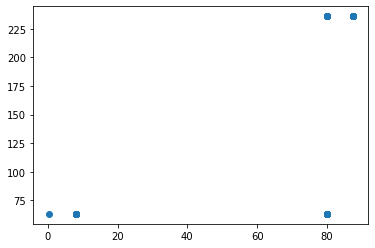

t+1 vs t-831


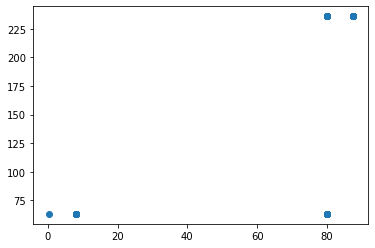

t+1 vs t-832


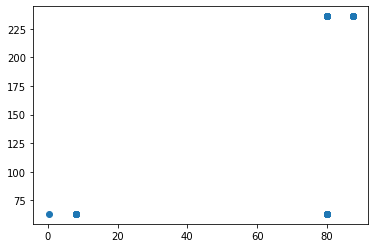

t+1 vs t-833


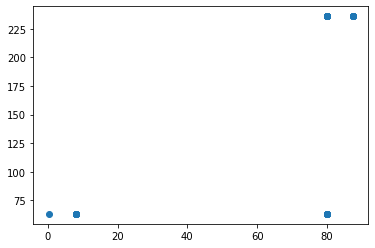

t+1 vs t-834


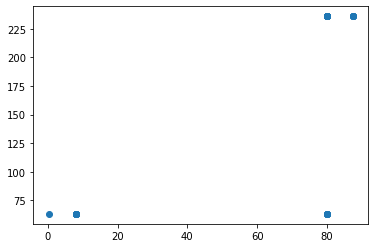

t+1 vs t-835


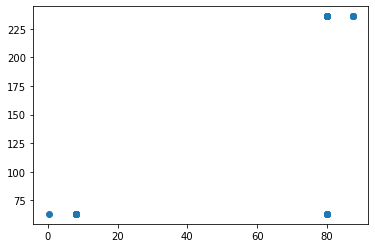

t+1 vs t-836


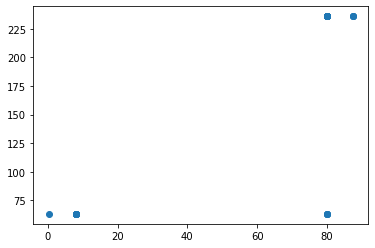

t+1 vs t-837


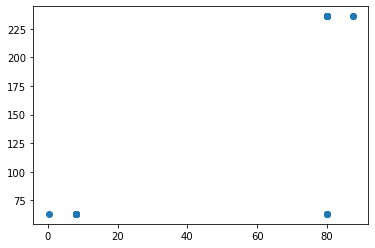

t+1 vs t-838


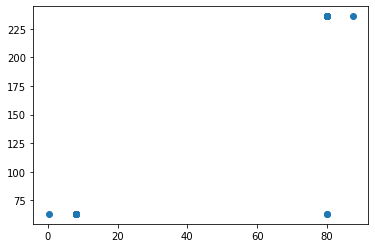

t+1 vs t-839


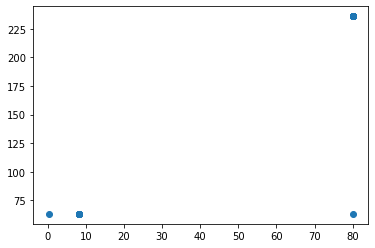

t+1 vs t-840


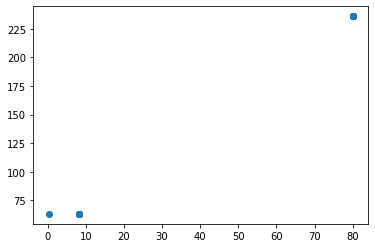

t+1 vs t-841


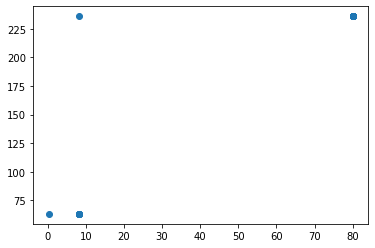

t+1 vs t-842


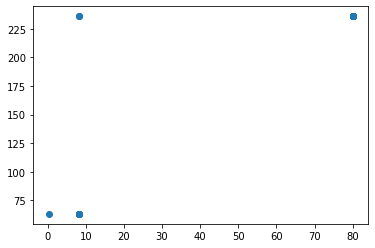

t+1 vs t-843


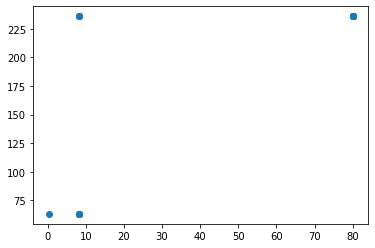

t+1 vs t-844


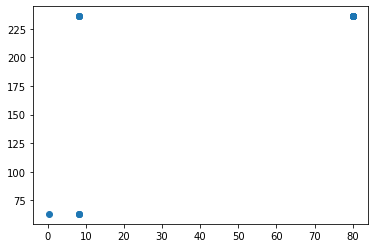

t+1 vs t-845


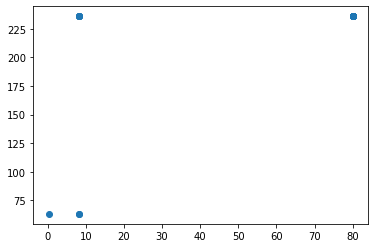

t+1 vs t-846


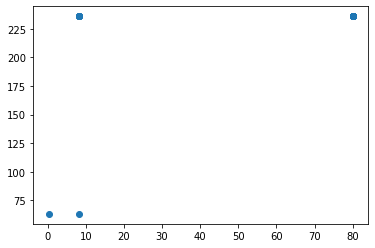

t+1 vs t-847


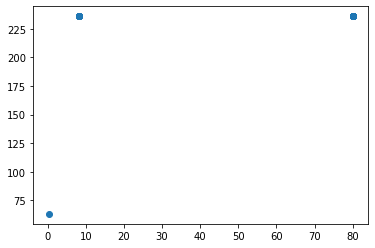

t+1 vs t-848


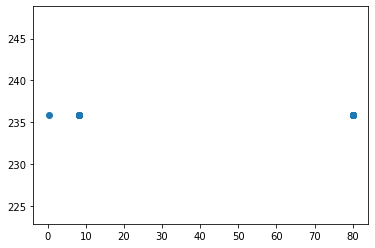

t+1 vs t-849


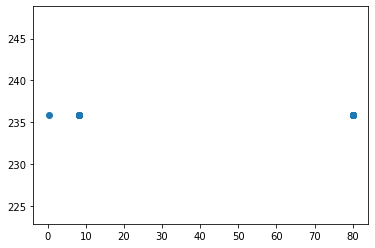

t+1 vs t-850


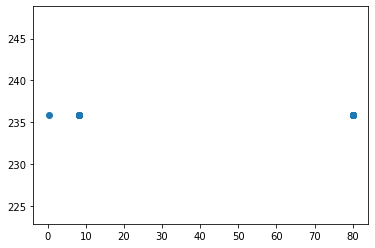

t+1 vs t-851


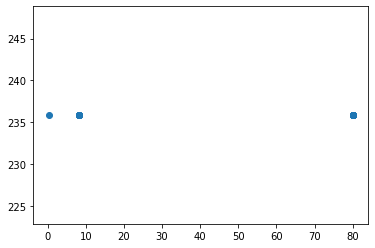

t+1 vs t-852


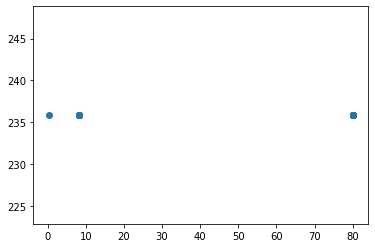

t+1 vs t-853


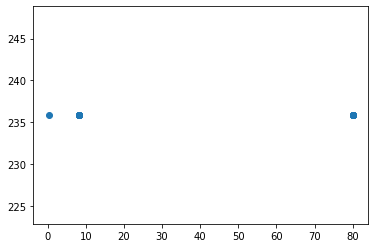

t+1 vs t-854


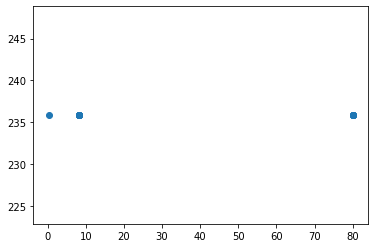

t+1 vs t-855


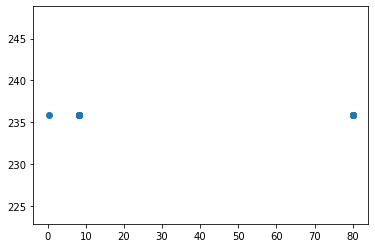

t+1 vs t-856


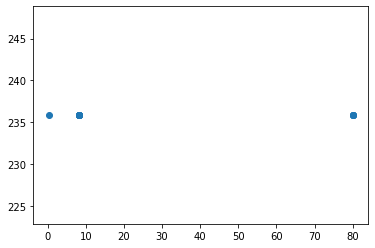

t+1 vs t-857


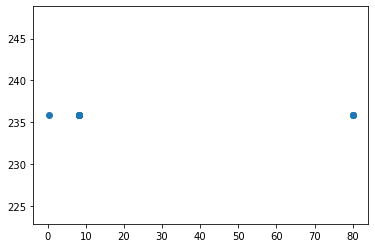

t+1 vs t-858


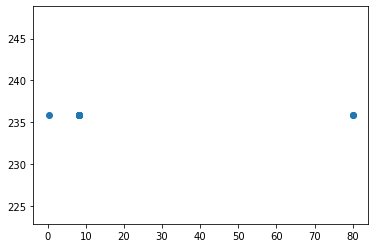

t+1 vs t-859


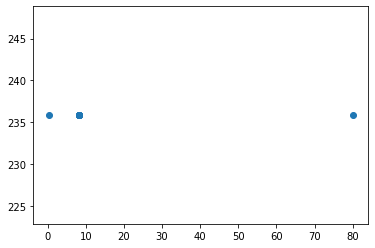

t+1 vs t-860


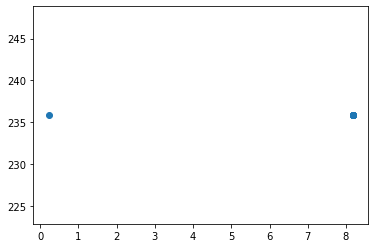

t+1 vs t-861


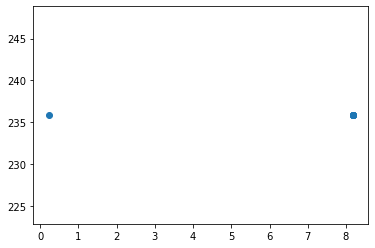

t+1 vs t-862


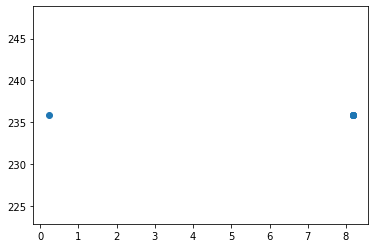

t+1 vs t-863


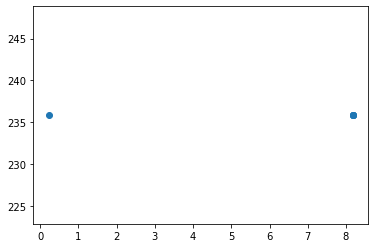

t+1 vs t-864


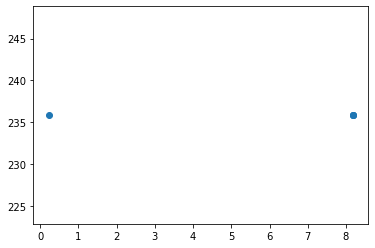

t+1 vs t-865


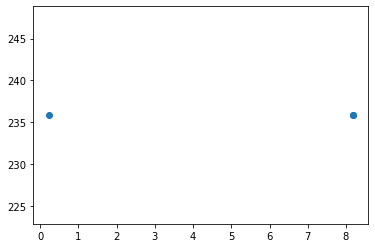

t+1 vs t-866


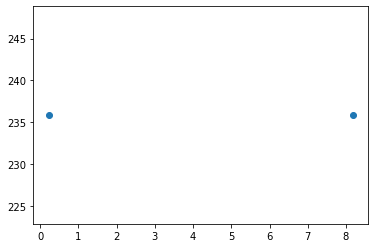

t+1 vs t-867


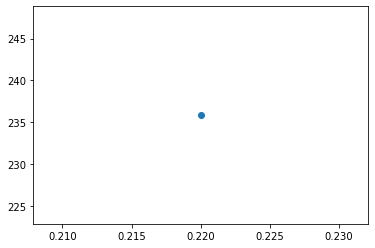

t+1 vs t-868


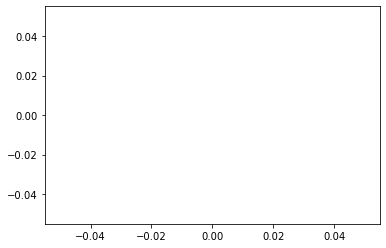

In [127]:
values = DataFrame(transacciones_219_importe_df.values)
lags = transacciones_219_importe_df.size
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [128]:
"""
Se aprecia un alto grado de correlacion (scatter plot en forma de diagonal) entre y(t+1) y sus 27 primeros lags.
"""

'\nSe aprecia un alto grado de correlacion (scatter plot en forma de diagonal) entre y(t+1) y sus 27 primeros lags.\n'

In [129]:
# 6. Time Series Autocorrelation Plots

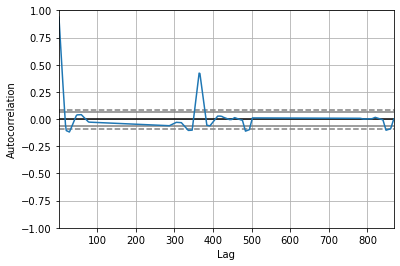

In [130]:
autocorrelation_plot(transacciones_219_importe_df)
pyplot.show()

In [132]:
"""
Como intuiamos. Vamos que hay fuerte correlacion entre y(t+1) y sus 1os lags anteriores y correlacion estadísiticamente
significativa hasta el lag 27 más o menos.
También vemos que hay correlación estadísticamente significativa entre y(t+1) y los lags 350 a 370 más o menos.

CONCLUSIÓN: esta serie temporal es modelizable.
"""

'\nComo intuiamos. Vamos que hay fuerte correlacion entre y(t+1) y sus 1os lags anteriores y correlacion estadísiticamente\nsignificativa hasta el lag 27 más o menos.\nTambién vemos que hay correlación estadísticamente significativa entre y(t+1) y los lags 350 a 370 más o menos.\n\nCONCLUSIÓN: esta serie temporal es modelizable.\n'

In [133]:
# HACEMOS EL DATAFRAME DEL DIA DE PAGO DEL SEGURO MEDICO

In [134]:
transacciones_219_df_dia = transacciones_219_df.copy()
transacciones_219_df_dia

IMPORTE
FECHA              
2018-02-06  -235.87
2018-02-26   -63.28
2018-03-26   -85.84
2018-04-26   -74.56
2018-05-23   -74.56
...             ...
2019-10-24   -87.45
2019-11-25   -87.45
2020-05-25   -80.04
2020-06-15    -8.18
2020-06-22    -0.22

[24 rows x 1 columns]

In [135]:
# hacemos una columna con la fecha a partir del índice
transacciones_219_df_dia['FECHA'] = transacciones_219_df_dia.index
transacciones_219_df_dia

IMPORTE      FECHA
FECHA                         
2018-02-06  -235.87 2018-02-06
2018-02-26   -63.28 2018-02-26
2018-03-26   -85.84 2018-03-26
2018-04-26   -74.56 2018-04-26
2018-05-23   -74.56 2018-05-23
...             ...        ...
2019-10-24   -87.45 2019-10-24
2019-11-25   -87.45 2019-11-25
2020-05-25   -80.04 2020-05-25
2020-06-15    -8.18 2020-06-15
2020-06-22    -0.22 2020-06-22

[24 rows x 2 columns]

In [136]:
# hacemos una columna con el dia a partir de la columna de la fecha
transacciones_219_df_dia['DIA'] = transacciones_219_df_dia['FECHA'].dt.day
transacciones_219_df_dia

IMPORTE      FECHA  DIA
FECHA                              
2018-02-06  -235.87 2018-02-06    6
2018-02-26   -63.28 2018-02-26   26
2018-03-26   -85.84 2018-03-26   26
2018-04-26   -74.56 2018-04-26   26
2018-05-23   -74.56 2018-05-23   23
...             ...        ...  ...
2019-10-24   -87.45 2019-10-24   24
2019-11-25   -87.45 2019-11-25   25
2020-05-25   -80.04 2020-05-25   25
2020-06-15    -8.18 2020-06-15   15
2020-06-22    -0.22 2020-06-22   22

[24 rows x 3 columns]

In [137]:
# !!! este calculo no ira en produccion
transacciones_219_df_dia['DIA'].describe()

count    24.000000
mean     23.000000
std       5.610549
min       6.000000
25%      23.000000
50%      25.000000
75%      26.000000
max      27.000000
Name: DIA, dtype: float64

In [139]:
# calculamos la moda - tomaremos la moda como el dia de cobro mas habitual
stat_mode_dist = statistics.mode(transacciones_219_df_dia['DIA'])
stat_mode_dist

25

In [140]:
"""
Vemos que el 50% de las transacciones ocurren entre el dia 23 y 26 de cada mes; como máximo el dia 27 y como minimo el 6.
mean = 23.00
std = 5.61
iqr_dist = 3

También vemos que esta distribucion no va a tener outliers puesto que max y min estan dentro del intervalo definido por los dos
siguientes calculos:
q3 + 1.5*iqr = 26 + 1.5*3 = 30.5 = 30
q1 - 1.5*iqr = 23 - 1.5*3 = 18.5 = 18
"""

'\nVemos que el 50% de las transacciones ocurren entre el dia 23 y 26 de cada mes; como máximo el dia 27 y como minimo el 6.\nmean = 23.00\nstd = 5.61\niqr_dist = 3\n\nTambién vemos que esta distribucion no va a tener outliers puesto que max y min estan dentro del intervalo definido por los dos\nsiguientes calculos:\nq3 + 1.5*iqr = 26 + 1.5*3 = 7\nq1 - 1.5*iqr = 23 - 1.5*3 = -1\n'

In [144]:
# extraemos el 1er cuartil
quartil1_dist = int(transacciones_219_df_dia.describe().loc['25%']['DIA'])
quartil1_dist

23

In [145]:
# extraemos el 3er cuartil
quartil3_dist = int(transacciones_219_df_dia.describe().loc['75%']['DIA'])
quartil3_dist

26

In [146]:
# calculamos el rango intercuartílico
iqr_dist = quartil3_dist - quartil1_dist
iqr_dist

3

In [147]:
# calculo de iqr: si NO pasan recibo a FIN DE MES
if stat_mode_dist < 28:    
    iqr = iqr_dist
# calculo de iqr: si SÍ pasan recibo a FIN DE MES
else:
    # si quartil3_dist - quartil1_dist es mayor a 4 dias
    if iqr_dist > 4:
        iqr = 4
    else:
        iqr = iqr_dist
iqr

3

In [153]:
# pedimos al usuario la fecha (en producción tomamos la fecha del sistema)
year = input('year: ')
month = input('month: ')
day = input('day: ')

year: 2019
month: 6
day: 20


In [154]:
# pasamos la fecha a string
current_date_str = year + '-' + month + '-' + day
current_date_str

'2019-6-20'

In [155]:
# pasamos la fecha al formato datetime
current_date_obj = datetime.strptime(current_date_str, '%Y-%m-%d')
current_date_obj

datetime.datetime(2019, 6, 20, 0, 0)

In [156]:
# pasamos iqr a formato datetime
iqr_obj = timedelta(days=iqr)
iqr_obj

datetime.timedelta(days=3)

In [157]:
# sumamos 1 mes a current_date_obj ya que vamos a calcular fecha e importe del recibo al mes siguiente al que se lo 
# pedimos 
target_date_obj = current_date_obj + DateOffset(months=1)
target_date_obj

Timestamp('2019-07-20 00:00:00')

In [158]:
# calculamos quartil3_obj en función de current_date_obj, quartil3_dist y si pasan el recibo a FIN de MES o NO
# si SÍ pasan recibo a FIN de MES
if stat_mode_dist >= 28:
    # quartil3_obj sera el ultimo dia del mes de target_date_obj
    quartil3 = calendar.monthrange(target_date_obj.year, target_date_obj.month)[1]
    quartil3_str = str(target_date_obj.year) + '-' + str(target_date_obj.month) + '-' + str(quartil3)
# si NO pasan recibo a FIN de MES    
else:
    quartil3_str = str(target_date_obj.year) + '-' + str(target_date_obj.month) + '-' + str(quartil3_dist)

quartil3_str

'2019-7-26'

In [159]:
q3_obj = datetime.strptime(quartil3_str, '%Y-%m-%d')
q3_obj

datetime.datetime(2019, 7, 26, 0, 0)

In [160]:
q1_obj = q3_obj - iqr_obj
q1_obj

datetime.datetime(2019, 7, 23, 0, 0)

In [161]:
# para que el pycharm no de problemas
stat_mode_str = ''

In [162]:
# calculamos la moda con año, mes y dia
if (quartil3_dist - stat_mode_dist) >= 0:
    # print('la moda esta en el mismo mes y año q quartil3_dist')
    stat_mode_str = str(q3_obj.year) + '-' + str(q3_obj.month) + '-' + str(stat_mode_dist)
elif (stat_mode_dist - quartil1_dist) >= 0:
    # print('la moda esta en el mismo mes y año q quartil1_dist')
    stat_mode_str = str(q1_obj.year) + '-' + str(q1_obj.month) + '-' + str(stat_mode_dist)
else:
    print('hay un fallo con el calculo de la moda')
print(stat_mode_str)

2019-7-25


In [163]:
# pasamos la moda a formato obj
stat_mode_obj = datetime.strptime(stat_mode_str, '%Y-%m-%d')
stat_mode_obj

datetime.datetime(2019, 7, 25, 0, 0)

In [164]:
limInfRecibo_obj = stat_mode_obj - dateutil.relativedelta.relativedelta(months=3)
limInfRecibo_obj

datetime.datetime(2019, 4, 25, 0, 0)

In [166]:
num_recibos = 0

# barro desde 2 meses antes que la moda hasta el dia antes de la moda
for d in range(int((stat_mode_obj - limInfRecibo_obj).days)):
    # ESTA LINEA NO SE EJECUTA EN PRODUCCIÓN
    fecha_str = str((limInfRecibo_obj + timedelta(days=d)).year) + \
                '-' + str((limInfRecibo_obj + timedelta(days=d)).month) + \
                '-' + str((limInfRecibo_obj + timedelta(days=d)).day)
    # ESTA LINEA NO SE EJECUTA EN PRODUCCIÓN
    print(fecha_str)
    if (limInfRecibo_obj + timedelta(days=d)) in transacciones_219_df_dia.index:
        # ESTA LINEA NO SE EJECUTA EN PRODUCCIÓN
        print(fecha_str + ": se pasa un recibo")
        num_recibos += 1       

print('num_recibos: ' + str(num_recibos))

2019-4-25
2019-4-25: se pasa un recibo
2019-4-26
2019-4-27
2019-4-28
2019-4-29
2019-4-30
2019-5-1
2019-5-2
2019-5-3
2019-5-4
2019-5-5
2019-5-6
2019-5-7
2019-5-8
2019-5-9
2019-5-10
2019-5-11
2019-5-12
2019-5-13
2019-5-14
2019-5-15
2019-5-16
2019-5-17
2019-5-18
2019-5-19
2019-5-20
2019-5-21
2019-5-22
2019-5-23
2019-5-23: se pasa un recibo
2019-5-24
2019-5-25
2019-5-26
2019-5-27
2019-5-28
2019-5-29
2019-5-30
2019-5-31
2019-6-1
2019-6-2
2019-6-3
2019-6-4
2019-6-5
2019-6-6
2019-6-7
2019-6-8
2019-6-9
2019-6-10
2019-6-11
2019-6-12
2019-6-13
2019-6-14
2019-6-15
2019-6-16
2019-6-17
2019-6-18
2019-6-19
2019-6-20
2019-6-21
2019-6-22
2019-6-23
2019-6-24
2019-6-25
2019-6-25: se pasa un recibo
2019-6-26
2019-6-27
2019-6-28
2019-6-29
2019-6-30
2019-7-1
2019-7-2
2019-7-3
2019-7-4
2019-7-5
2019-7-6
2019-7-7
2019-7-8
2019-7-9
2019-7-10
2019-7-11
2019-7-12
2019-7-13
2019-7-14
2019-7-15
2019-7-16
2019-7-17
2019-7-18
2019-7-19
2019-7-20
2019-7-21
2019-7-22
2019-7-23
2019-7-24
num_recibos: 3


In [167]:
# procedemos a estimar la predicción de la serie temporal

In [170]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [171]:
# Forecast IMPORTE With Prophet

In [172]:
# Fit Prophet Model

In [174]:
df = transacciones_219_importe_df.copy()
df

IMPORTE
2018-02-06   235.87
2018-02-07   235.87
2018-02-08   235.87
2018-02-09   235.87
2018-02-10   235.87
...             ...
2020-06-18     8.18
2020-06-19     8.18
2020-06-20     8.18
2020-06-21     8.18
2020-06-22     0.22

[868 rows x 1 columns]

In [175]:
df['FECHA'] = df.index
df

IMPORTE      FECHA
2018-02-06   235.87 2018-02-06
2018-02-07   235.87 2018-02-07
2018-02-08   235.87 2018-02-08
2018-02-09   235.87 2018-02-09
2018-02-10   235.87 2018-02-10
...             ...        ...
2020-06-18     8.18 2020-06-18
2020-06-19     8.18 2020-06-19
2020-06-20     8.18 2020-06-20
2020-06-21     8.18 2020-06-21
2020-06-22     0.22 2020-06-22

[868 rows x 2 columns]

In [176]:
df = df[['FECHA', 'IMPORTE']]
df

FECHA  IMPORTE
2018-02-06 2018-02-06   235.87
2018-02-07 2018-02-07   235.87
2018-02-08 2018-02-08   235.87
2018-02-09 2018-02-09   235.87
2018-02-10 2018-02-10   235.87
...               ...      ...
2020-06-18 2020-06-18     8.18
2020-06-19 2020-06-19     8.18
2020-06-20 2020-06-20     8.18
2020-06-21 2020-06-21     8.18
2020-06-22 2020-06-22     0.22

[868 rows x 2 columns]

In [177]:
df.reset_index(drop=True, inplace=True)
df

FECHA  IMPORTE
0   2018-02-06   235.87
1   2018-02-07   235.87
2   2018-02-08   235.87
3   2018-02-09   235.87
4   2018-02-10   235.87
..         ...      ...
863 2020-06-18     8.18
864 2020-06-19     8.18
865 2020-06-20     8.18
866 2020-06-21     8.18
867 2020-06-22     0.22

[868 rows x 2 columns]

In [178]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds'] = to_datetime(df['ds'])
df

ds       y
0   2018-02-06  235.87
1   2018-02-07  235.87
2   2018-02-08  235.87
3   2018-02-09  235.87
4   2018-02-10  235.87
..         ...     ...
863 2020-06-18    8.18
864 2020-06-19    8.18
865 2020-06-20    8.18
866 2020-06-21    8.18
867 2020-06-22    0.22

[868 rows x 2 columns]

In [181]:
# A continuación vamos a obtener un dataframe de train desde el 1er dia en que tenemos datos hasta el dia anterior a
# 'current_date_str'
# y un dataframe de test desde 'current_date_str' hasta el ultimo dia en que tenemos datos.

In [182]:
limite_superior_train, = (df.index[df['ds'] == current_date_str])
limite_superior_train

499

In [183]:
prophet_train_df = df.iloc[:limite_superior_train, :]
prophet_train_df

ds       y
0   2018-02-06  235.87
1   2018-02-07  235.87
2   2018-02-08  235.87
3   2018-02-09  235.87
4   2018-02-10  235.87
..         ...     ...
494 2019-06-15   87.31
495 2019-06-16   87.31
496 2019-06-17   87.31
497 2019-06-18   87.31
498 2019-06-19   87.31

[499 rows x 2 columns]

In [184]:
prophet_test_df = df.iloc[limite_superior_train:,:]
prophet_test_df

ds      y
499 2019-06-20  87.31
500 2019-06-21  87.31
501 2019-06-22  87.31
502 2019-06-23  87.31
503 2019-06-24  87.31
..         ...    ...
863 2020-06-18   8.18
864 2020-06-19   8.18
865 2020-06-20   8.18
866 2020-06-21   8.18
867 2020-06-22   0.22

[369 rows x 2 columns]

In [185]:
# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [186]:
# Make an In-Sample Forecast

In [187]:
# Make an In-Sample Forecast Vamos a hacer una predicción desde el 1er dia en que tenemos datos hasta el ultimo dia 
# del mes siguiente a current_date_str 

In [188]:
# esto no se ejecuta en produccion
current_date_obj

datetime.datetime(2019, 6, 20, 0, 0)

In [189]:
lim_sup_pred_obj = current_date_obj + dateutil.relativedelta.relativedelta(months=1)
lim_sup_pred_obj

datetime.datetime(2019, 7, 20, 0, 0)

In [190]:
# calculo el ultimo dia del mes obj para hacer la predicción del mes entero posterior a la fecha de petición
lim_sup_pred_str = str(lim_sup_pred_obj.year) + '-' + str(lim_sup_pred_obj.month) + '-' + \
                   str(calendar.monthrange(lim_sup_pred_obj.year, lim_sup_pred_obj.month)[1])

lim_sup_pred_str

'2019-7-31'

In [191]:
lim_sup_pred_obj = datetime.strptime(lim_sup_pred_str, '%Y-%m-%d')
lim_sup_pred_obj

datetime.datetime(2019, 7, 31, 0, 0)

In [193]:
idx = date_range(start=transacciones_219_importe_df.index.min(), end=lim_sup_pred_obj)
idx

DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15',
               ...
               '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
               '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', length=541, freq='D')

In [194]:
prophet_pred_df = DataFrame(idx)
prophet_pred_df

0
0   2018-02-06
1   2018-02-07
2   2018-02-08
3   2018-02-09
4   2018-02-10
..         ...
536 2019-07-27
537 2019-07-28
538 2019-07-29
539 2019-07-30
540 2019-07-31

[541 rows x 1 columns]

In [195]:
prophet_pred_df.columns = ['ds']
prophet_pred_df

ds
0   2018-02-06
1   2018-02-07
2   2018-02-08
3   2018-02-09
4   2018-02-10
..         ...
536 2019-07-27
537 2019-07-28
538 2019-07-29
539 2019-07-30
540 2019-07-31

[541 rows x 1 columns]

In [196]:
# esto no ira en produccion
prophet_pred_df.dtypes

ds    datetime64[ns]
dtype: object

In [197]:
# esto no ira en produccion
# por si acaso convierto la columna ds a tipo datetime aunque ya lo era como vimos en celda anterior y veremos en celda
# siguiente
prophet_pred_df['ds'] = to_datetime(prophet_pred_df['ds'])
prophet_pred_df

ds
0   2018-02-06
1   2018-02-07
2   2018-02-08
3   2018-02-09
4   2018-02-10
..         ...
536 2019-07-27
537 2019-07-28
538 2019-07-29
539 2019-07-30
540 2019-07-31

[541 rows x 1 columns]

In [198]:
# esto no ira en produccion
prophet_pred_df.dtypes

ds    datetime64[ns]
dtype: object

In [199]:
# use the model to make a forecast
forecast_df = model.predict(prophet_pred_df)

In [200]:
# esto no ira en produccion
forecast_df.shape

(541, 16)

In [201]:
# esto no ira en producción
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds        yhat  yhat_lower  yhat_upper
0   2018-02-06  125.282928   75.185220  181.311528
1   2018-02-07  124.902350   73.969012  179.183256
2   2018-02-08  126.958817   74.640154  181.002377
3   2018-02-09  126.580209   74.182411  182.168960
4   2018-02-10  126.200043   73.120296  175.470436
..         ...         ...         ...         ...
536 2019-07-27  106.338062   53.805004  161.088243
537 2019-07-28  106.450626   55.181841  162.265776
538 2019-07-29  102.314005   48.710514  156.930077
539 2019-07-30  104.039252   50.292504  155.891391
540 2019-07-31  104.151679   51.849651  158.275611

[541 rows x 4 columns]


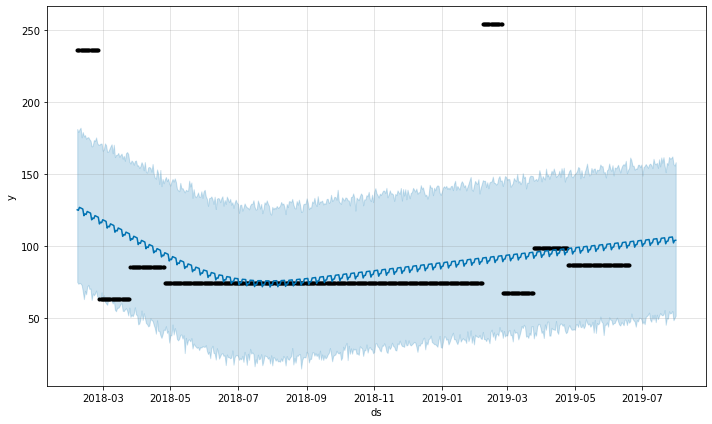

In [202]:
# esto no ira en producción
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [203]:
prediccion_recibo, = forecast_df.loc[forecast_df['ds'] == stat_mode_obj]['yhat']
prediccion_recibo

106.1108276383566

In [210]:
# if para decidir si genero aviso utilizando la prediccion de prophet
aviso = False

if num_recibos > 0:
    print("Te van a pasar el próximo recibo del gas natural aproximadamente el: " + stat_mode_str)
    print("El valor estimado del importe del recibo es de: " + str(5*round(prediccion_recibo/5)) + ' eur')
    aviso = True
else:
    aviso = False

print('Aviso: ' + str(aviso))

Te van a pasar el próximo recibo del gas natural aproximadamente el: 2019-7-25
El valor estimado del importe del recibo es de: 105 eur
Aviso: True


In [205]:
!python -V

Python 3.8.10


In [206]:
!pip3 list

Package                            Version
---------------------------------- -------------------
absl-py                            0.12.0
aiohttp                            3.7.4
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.10.0
anyio                              2.2.0
AnyQt                              0.0.13
argh                               0.26.2
argon2-cffi                        20.1.0
arviz                              0.11.2
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
async-timeout                      3.0.1
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.6
Babel                              2

keyrings.alt                       4.0.2
kiwisolver                         1.3.1
korean-lunar-calendar              0.2.1
lazy-object-proxy                  1.6.0
libarchive-c                       2.9
llvmlite                           0.36.0
locket                             0.2.1
lockfile                           0.12.2
LunarCalendar                      0.0.9
lxml                               4.6.3
Mako                               1.1.4
Markdown                           3.3.4
MarkupSafe                         2.0.1
matplotlib                         3.3.4
mccabe                             0.6.1
menuinst                           1.4.16
mistune                            0.8.4
mkl-fft                            1.3.0
mkl-random                         1.2.1
mkl-service                        2.3.0
mock                               4.0.3
more-itertools                     8.7.0
mpl-scatter-density                0.7
mpmath                             1.2.1
msgpack          

In [207]:
!pip3 freeze

absl-py @ file:///C:/ci/absl-py_1615411229697/work
aiohttp @ file:///C:/ci/aiohttp_1614361024229/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1621348054992/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
AnyQt @ file:///home/conda/feedstock_root/build_artifacts/anyqt_1620306236038/work
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
arviz @ file:///tmp/build/80754af9/arviz_1614019183254/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astor==0.8.1
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1


rope @ file:///tmp/build/80754af9/rope_1602264064449/work
rsa @ file:///tmp/build/80754af9/rsa_1614366226499/work
Rtree @ file:///C:/ci/rtree_1618421009405/work
ruamel-yaml-conda @ file:///C:/ci/ruamel_yaml_1616016967756/work
scikit-image==0.18.1
scikit-learn @ file:///C:/ci/scikit-learn_1621370563523/work
scipy==1.4.1
seaborn @ file:///tmp/build/80754af9/seaborn_1608578541026/work
Send2Trash @ file:///tmp/build/80754af9/send2trash_1607525499227/work
serverfiles==0.3.0
setuptools-git==1.2
simplegeneric==0.8.1
singledispatch @ file:///tmp/build/80754af9/singledispatch_1614366001199/work
sip==4.19.13
six @ file:///C:/ci/six_1605187374963/work
sniffio @ file:///C:/ci/sniffio_1614030707456/work
snowballstemmer @ file:///tmp/build/80754af9/snowballstemmer_1611258885636/work
sortedcollections @ file:///tmp/build/80754af9/sortedcollections_1611172717284/work
sortedcontainers @ file:///tmp/build/80754af9/sortedcontainers_1606865132123/work
soupsieve @ file:///tmp/build/80754af9/soupsieve_1616

In [208]:
!pip3 freeze > requirements_20210625_219_gas_natural_prophet_ide.txt